In [1]:
conda install -c conda-forge mplsoccer

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [2]:
import pandas as pd
from mplsoccer.pitch import Pitch
from pandas import json_normalize
import requests

In [3]:
# Load the competition file from StatsBomb open data folder in GitHub

competitions = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json')
competitions = competitions.json()

In [4]:
# Let's take a look at all the competitions we can choose from with competition_id and season_id

for competition in competitions:
    print(competition['country_name'], competition['competition_name'], competition['season_name'], competition['competition_id'], competition['season_id'])

Germany 1. Bundesliga 2015/2016 9 27
Europe Champions League 2018/2019 16 4
Europe Champions League 2017/2018 16 1
Europe Champions League 2016/2017 16 2
Europe Champions League 2015/2016 16 27
Europe Champions League 2014/2015 16 26
Europe Champions League 2013/2014 16 25
Europe Champions League 2012/2013 16 24
Europe Champions League 2011/2012 16 23
Europe Champions League 2010/2011 16 22
Europe Champions League 2009/2010 16 21
Europe Champions League 2008/2009 16 41
Europe Champions League 2006/2007 16 39
Europe Champions League 2004/2005 16 37
Europe Champions League 2003/2004 16 44
Europe Champions League 1999/2000 16 76
Europe Champions League 1972/1973 16 277
Europe Champions League 1971/1972 16 71
Europe Champions League 1970/1971 16 276
Spain Copa del Rey 1983/1984 87 84
Spain Copa del Rey 1982/1983 87 268
Spain Copa del Rey 1977/1978 87 279
England FA Women's Super League 2020/2021 37 90
England FA Women's Super League 2019/2020 37 42
England FA Women's Super League 2018/2019

In [5]:
# Let's take a look at the most recent FIFA World Cup (2022)

competition_id = 43
season_id = 106

In [6]:
# Load the list of all matches for the 2022 FIFA World Cup

matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/43/106.json')
matches = matches.json()

In [7]:
# Let's look at all the games from the 2022 FIFA World Cup with their scores and match_id's in order they were played

sorted_matches = sorted(matches, key=lambda match: match['match_id'])

for match in sorted_matches:
    print(match['competition_stage']['name'] + "..." + match['home_team']['home_team_name'], match['away_team']['away_team_name']+\
          " " + str(match['home_score']) + ":" + str(match['away_score'])  + " (match_id is " +str(match['match_id']) + ")")

Group Stage...Denmark Tunisia 0:0 (match_id is 3857254)
Group Stage...Japan Spain 2:1 (match_id is 3857255)
Group Stage...Serbia Switzerland 2:3 (match_id is 3857256)
Group Stage...Australia Denmark 1:0 (match_id is 3857257)
Group Stage...Brazil Serbia 2:0 (match_id is 3857258)
Group Stage...Cameroon Serbia 3:3 (match_id is 3857259)
Group Stage...Saudi Arabia Mexico 1:2 (match_id is 3857260)
Group Stage...Wales England 0:3 (match_id is 3857261)
Group Stage...South Korea Portugal 2:1 (match_id is 3857262)
Group Stage...Spain Germany 1:1 (match_id is 3857263)
Group Stage...Poland Argentina 0:2 (match_id is 3857264)
Group Stage...Mexico Poland 0:0 (match_id is 3857265)
Group Stage...France Denmark 2:1 (match_id is 3857266)
Group Stage...Ecuador Senegal 1:2 (match_id is 3857267)
Group Stage...Belgium Canada 1:0 (match_id is 3857268)
Group Stage...Brazil Switzerland 1:0 (match_id is 3857269)
Group Stage...Portugal Uruguay 2:0 (match_id is 3857270)
Group Stage...England Iran 6:2 (match_id is

In [8]:
# Let's take a deeper look at the 2022 FIFA World Cup Winners, the Argentinians

WC_Winners = 'Argentina'

In [9]:
# Let's look at all of the Argentina matches and their scores, as well as match_id's

sorted_matches = sorted(matches, key=lambda match: match['match_id'])

for match in sorted_matches:
    if match['home_team']['home_team_name'] == WC_Winners or match['away_team']['away_team_name'] == WC_Winners:
        print(match['competition_stage']['name'] + "..." + match['home_team']['home_team_name'], match['away_team']['away_team_name']+\
          " " + str(match['home_score']) + ":" + str(match['away_score'])  + " (match_id is " +str(match['match_id']) + ")")

Group Stage...Poland Argentina 0:2 (match_id is 3857264)
Group Stage...Argentina Mexico 2:0 (match_id is 3857289)
Group Stage...Argentina Saudi Arabia 1:2 (match_id is 3857300)
Round of 16...Argentina Australia 2:1 (match_id is 3869151)
Quarter-finals...Netherlands Argentina 2:2 (match_id is 3869321)
Semi-finals...Argentina Croatia 3:0 (match_id is 3869519)
Final...Argentina France 3:3 (match_id is 3869685)


In [10]:
# Now let's look at the WC Final

match_id = 3869685

In [11]:
# Let's load the events data and take a look 
#    ...the events data was not available from StatsBombs GitHub repository, but I was able to find the same data on Kaggle

import json

# Specify the path to your JSON file
events = r"C:\Anaconda\PROJECTS\2022 FIFA WC Final Analysis\Events\3869685.json\3869685.json"

# Load the JSON data from the file
with open(events, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [12]:
# Let's transform our JSON data into a Pandas dataframe to make it easier to analysis

events = json_normalize(data, sep = "_")

In [13]:
# Let's check our new events data table

pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

events.head(5)

id  index  period     timestamp  minute  \
0  0584ee21-e3dd-4d9f-95a0-5b5e84be25c3      1       1  00:00:00.000       0   
1  b32679f8-942e-4122-96a2-015caf75e628      2       1  00:00:00.000       0   
2  954f6855-de22-46a2-8d09-6fe94eec2b9b      3       1  00:00:00.000       0   
3  6404a8e8-afaf-489d-b65e-173a237ffed5      4       1  00:00:00.000       0   
4  f651a6c4-55e3-4e0f-a178-59414ba83d6a      5       1  00:00:00.578       0   

   second  possession  duration  type_id    type_name  possession_team_id  \
0       0           1  0.000000       35  Starting XI                 779   
1       0           1  0.000000       35  Starting XI                 779   
2       0           1  0.000000       18   Half Start                 779   
3       0           1  0.000000       18   Half Start                 779   
4       0           2  0.975702       30         Pass                 771   

  possession_team_name  play_pattern_id play_pattern_name  team_id  team_name  \
0            Argentina                1      Regular Play      779  Argentina   
1            Argentina                1      Regular Play      771     France   
2            Argentina                1      Regular Play      771     France   
3            Argentina                1      Regular Play      779  Argentina   
4               France                9     From Kick Off      771     France   

   tactics_formation                                     tactics_lineup  \
0              433.0  [{'player': {'id': 6909, 'name': 'Damián Emili...   
1             4231.0  [{'player': {'id': 3099, 'name': 'Hugo Lloris'...   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   

                           related_events      location  player_id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [6404a8e8-afaf-489d-b65e-173a237ffed5]           NaN        NaN   
3  [954f6855-de22-46a2-8d09-6fe94eec2b9b]           NaN        NaN   
4  [97b5dc82-547a-4f93-a632-a2a8daf5ac98]  [61.0, 40.1]     5487.0   

         player_name  position_id              position_name  \
0                NaN          NaN                        NaN   
1                NaN          NaN                        NaN   
2                NaN          NaN                        NaN   
3                NaN          NaN                        NaN   
4  Antoine Griezmann         19.0  Center Attacking Midfield   

   pass_recipient_id        pass_recipient_name  pass_length  pass_angle  \
0                NaN                        NaN          NaN         NaN   
1                NaN                        NaN          NaN         NaN   
2                NaN                        NaN          NaN         NaN   
3                NaN                        NaN          NaN         NaN   
4            10481.0  Aurélien Djani Tchouaméni    13.364505    2.907503   

   pass_height_id pass_height_name pass_end_location  pass_type_id  \
0             NaN              NaN               NaN           NaN   
1             NaN              NaN               NaN           NaN   
2             NaN              NaN               NaN           NaN   
3             NaN              NaN               NaN           NaN   
4             1.0      Ground Pass      [48.0, 43.2]          65.0   

  pass_type_name  pass_body_part_id pass_body_part_name carry_end_location  \
0            NaN                NaN                 NaN                NaN   
1            NaN                NaN                 NaN                NaN   
2            NaN                NaN                 NaN                NaN   
3            NaN                NaN                 NaN                NaN   
4       Kick Off               38.0           Left Foot                NaN   

  

In [14]:
# Let's check out descriptive statistics of the events data

events.describe()

index       period       minute       second   possession  \
count  4407.000000  4407.000000  4407.000000  4407.000000  4407.000000   
mean   2204.000000     1.924438    59.908555    28.492852   117.222827   
std    1272.335648     0.963218    34.061632    16.972311    74.555376   
min       1.000000     1.000000     0.000000     0.000000     1.000000   
25%    1102.500000     1.000000    34.000000    14.000000    50.000000   
50%    2204.000000     2.000000    58.000000    28.000000   107.000000   
75%    3305.500000     2.000000    91.000000    43.000000   186.000000   
max    4407.000000     5.000000   125.000000    59.000000   255.000000   

          duration      type_id  possession_team_id  play_pattern_id  \
count  3293.000000  4407.000000         4407.000000      4407.000000   
mean      1.204945    32.150896          775.442024         3.171999   
std       1.257340    12.059606            3.975953         2.343302   
min       0.000000     2.000000          771.000000         1.000000   
25%       0.315170    30.000000          771.000000         1.000000   
50%       0.992169    30.000000          779.000000         3.000000   
75%       1.635399    42.000000          779.000000         4.000000   
max      15.062394    43.000000          779.000000         9.000000   

           team_id  tactics_formation     player_id  position_id  \
count  4407.000000           9.000000   4378.000000  4378.000000   
mean    775.305877        1683.000000  13059.269301    10.777296   
std       3.988740        1911.321402  11338.950968     7.041213   
min     771.000000         352.000000   2972.000000     1.000000   
25%     771.000000         433.000000   4445.000000     5.000000   
50%     779.000000         442.000000   7797.000000    10.000000   
75%     779.000000        4231.000000  20572.000000    17.000000   
max     779.000000        4231.000000  38718.000000    24.000000   

       pass_recipient_id  pass_length   pass_angle  pass_height_id  \
count        1114.000000  1263.000000  1263.000000     1263.000000   
mean        12974.961400    21.089441     0.121427        1.529691   
std         11463.390293    14.827353     1.532547        0.803438   
min          2972.000000     1.746425    -3.130840        1.000000   
25%          4445.000000    11.334013    -0.993266        1.000000   
50%          7797.000000    16.703592     0.089848        1.000000   
75%         20572.000000    25.708456     1.366705        2.000000   
max         38718.000000    99.651596     3.141593        3.000000   

       pass_type_id  pass_body_part_id  pass_outcome_id  \
count    286.000000        1183.000000       269.000000   
mean      64.930070          39.659341        18.178439   
std        1.918151           4.004409        23.028327   
min       61.000000          37.000000         9.000000   
25%       63.000000          38.000000         9.000000   
50%       66.000000          40.000000         9.000000   
75%       66.000000          40.000000         9.000000   
max       67.000000          70.000000        77.000000   

       ball_receipt_outcome_id  clearance_body_part_id  pass_technique_id  \
count                    120.0               45.000000            16.0000   
mean                       9.0               39.311111           105.5625   
std                        0.0                6.801812             1.7500   
min                        9.0               37.000000           104.0000   
25%                        9.0               37.000000           104.0000   
50%                        9.0               37.000000           105.0000   
75%                        9.0               40.000000           108.0000   
max                        9.0               70.000000           108.0000   

       duel_type_id  interception_outcome_id  dribble_outcome_id  \
count     98.000000                28.000000           54.000000   
mean      10.581633                10.642857            8.481481   
std        0.495827    

In [15]:
# Let's see how many times each EVENT occured throughout the match (BOTH TEAMS TOTAL)

events['type_name'].value_counts()

# OFFENSIVE STATS NEED TO BE FILTERED BY 'POSSESSION_TEAM_NAME'

# DEFENSIVE STATS NEED TO BE FILTERED BY 'TEAM_NAME'

type_name
Pass               1263
Ball Receipt*      1114
Carry               940
Pressure            361
Ball Recovery       115
Duel                 98
Dribble              54
Block                50
Foul Committed       48
Clearance            45
Foul Won             44
Goal Keeper          44
Shot                 38
Miscontrol           35
Dispossessed         34
Dribbled Past        31
Interception         28
Substitution         13
Half Start           10
Half End             10
Injury Stoppage       9
50/50                 8
Tactical Shift        7
Starting XI           2
Bad Behaviour         2
Offside               1
Shield                1
Player On             1
Player Off            1
Name: count, dtype: int64

In [16]:
# Now that we've seen all of the overall EVENTS, let's dive deeper into each team's EVENTS

# Argentina EVENT counts

argentina = events.loc[events['possession_team_name'] == 'Argentina']
argentina['type_name'].value_counts()

# note that we are filtered by 'possession_team_name'...therefore 'pressures' = times Argentina was pressured by France

#some of these values are incorrect because they have 'possession_team_name' instead of team name 

# OFFENSIVE STATS NEED TO BE FILTERED BY 'POSSESSION_TEAM_NAME'

# DEFENSIVE STATS NEED TO BE FILTERED BY 'TEAM_NAME'

#THIS IS A ROUGH ESTIMATE OF WHAT THE STATS WILL LOOK LIKE FOR ARGENTINA, I DIVE INTO EACH STAT FURTHER BELOW DURING THE
#  EDA PROCESS AND HAVE NOTICED THAT THESE NUMBERS ARE NOT ALWAYS CORRECT (MOST ARE INCORRECT IN FACT BECAUSE OF TEAM NAME)

type_name
Pass               704
Ball Receipt*      625
Carry              527
Pressure           211
Ball Recovery       64
Duel                52
Block               28
Dribble             27
Goal Keeper         25
Shot                24
Foul Committed      22
Foul Won            21
Dispossessed        21
Clearance           20
Interception        18
Miscontrol          14
Dribbled Past       12
Substitution         6
Injury Stoppage      6
50/50                6
Tactical Shift       3
Bad Behaviour        2
Starting XI          2
Half Start           2
Half End             2
Offside              1
Shield               1
Player On            1
Name: count, dtype: int64

In [17]:
# Let's filter to only show passes by Argentina
# Want to see who passed to who, what type of pass it was, and the location of the passes

# Let's filter to only show passes by Argentina
# Let's filter to only show passes by Argentina
argentina_passes = argentina.loc[(argentina['type_name'] == 'Pass') & 
                                 (argentina['possession_team_name'] == 'Argentina') &
                                 (argentina['team_name'] == 'Argentina')]

# Select the columns of interest
argentina_passes = argentina_passes[['player_id', 'player_name', 'possession_team_name','location', 'pass_height_name', 'pass_type_name', 'pass_outcome_name', 'pass_recipient_id', 'team_name', 'pass_recipient_name', 'pass_end_location']]

# Replace NaN values in 'pass_outcome_name' with 'Successful'
argentina_passes['pass_outcome_name'] = argentina_passes['pass_outcome_name'].fillna('Successful')
argentina_passes['pass_outcome_name'].value_counts()

# THIS SHOWS THAT 654 TOTAL PASSES....546 WERE COMPLETED

pass_outcome_name
Successful      546
Incomplete       89
Out              11
Unknown           5
Pass Offside      3
Name: count, dtype: int64

In [18]:
# Let's find out who passed to whom and how many times for Argentina

argentina_passes_players = argentina_passes[['player_name', 'pass_recipient_name']]
argentina_passes_between_players = argentina_passes['player_name'] +' ' + "--->" +' '+ argentina_passes['pass_recipient_name']

argentina_passes_between_players.value_counts().head(20)

Nicolás Hernán Otamendi ---> Cristian Gabriel Romero                 17
Enzo Fernandez ---> Rodrigo Javier De Paul                           16
Rodrigo Javier De Paul ---> Lionel Andrés Messi Cuccittini           16
Nahuel Molina Lucero ---> Rodrigo Javier De Paul                     15
Cristian Gabriel Romero ---> Enzo Fernandez                          15
Nicolás Hernán Otamendi ---> Nicolás Alejandro Tagliafico            15
Nicolás Alejandro Tagliafico ---> Alexis Mac Allister                14
Nicolás Hernán Otamendi ---> Enzo Fernandez                          14
Nahuel Molina Lucero ---> Lionel Andrés Messi Cuccittini             13
Cristian Gabriel Romero ---> Nicolás Hernán Otamendi                 12
Alexis Mac Allister ---> Enzo Fernandez                              12
Enzo Fernandez ---> Lionel Andrés Messi Cuccittini                   11
Enzo Fernandez ---> Alexis Mac Allister                              11
Lionel Andrés Messi Cuccittini ---> Rodrigo Javier De Paul      

In [19]:
# Let's filter to only show SHOTS by Argentina
# Want to see who SHOT, what technique of SHOT it was, and the location of the SHOT, and it if was saved or not

argentina_shots = argentina.loc[argentina['type_name'] == 'Shot']
argentina_shots = argentina_shots[['period', 'timestamp','minute','second','player_name', 'shot_end_location', 'shot_first_time', 'shot_statsbomb_xg','shot_technique_name','shot_body_part_name','shot_type_name','shot_outcome_name']]
argentina_shots

period     timestamp  minute  second                      player_name  \
191        1  00:04:40.798       4      40              Alexis Mac Allister   
339        1  00:07:36.537       7      36           Rodrigo Javier De Paul   
601        1  00:16:15.886      16      15  Ángel Fabián Di María Hernández   
770        1  00:22:24.114      22      24   Lionel Andrés Messi Cuccittini   
978        1  00:31:35.181      31      35              Alexis Mac Allister   
1177       1  00:35:22.647      35      22  Ángel Fabián Di María Hernández   
1915       2  00:03:49.971      48      49           Rodrigo Javier De Paul   
2203       2  00:13:21.380      58      21                   Julián Álvarez   
2234       2  00:14:51.755      59      51   Lionel Andrés Messi Cuccittini   
2690       2  00:26:31.216      71      31                   Enzo Fernandez   
3036       2  00:38:23.690      83      23                   Enzo Fernandez   
3388       2  00:51:37.226      96      37   Lionel Andrés Messi Cuccittini   
3525       3  00:02:05.384      92       5              Alexis Mac Allister   
3929       3  00:14:28.023     104      28          Lautaro Javier Martínez   
3933       3  00:14:30.401     104      30            Gonzalo Ariel Montiel   
3969       3  00:15:41.223     105      41          Lautaro Javier Martínez   
4041       4  00:01:55.723     106      55   Lionel Andrés Messi Cuccittini   
4066       4  00:02:57.018     107      57          Lautaro Javier Martínez   
4069       4  00:02:58.079     107      58   Lionel Andrés Messi Cuccittini   
4356       4  00:17:59.834     122      59          Lautaro Javier Martínez   
4390       5  00:01:02.191     121       2   Lionel Andrés Messi Cuccittini   
4394       5  00:02:27.184     122      27      Paulo Bruno Exequiel Dybala   
4398       5  00:04:16.722     124      16           Leandro Daniel Paredes   
4403       5  00:05:57.883     125      57            Gonzalo Ariel Montiel   

       shot_end_location shot_first_time  shot_statsbomb_xg  \
191   [117.3, 38.3, 0.8]             NaN           0.024542   
339        [108.1, 40.4]             NaN           0.062813   
601   [120.0, 39.6, 7.5]            True           0.106801   
770   [120.0, 41.8, 0.2]             NaN           0.783500   
978        [112.3, 80.0]            True           0.010578   
1177  [120.0, 41.7, 0.5]            True           0.303409   
1915  [117.6, 41.6, 1.3]            True           0.040216   
2203  [119.4, 35.8, 0.2]             NaN           0.059534   
2234  [120.0, 45.5, 1.5]             NaN           0.115560   
2690  [117.8, 40.4, 1.7]             NaN           0.041590   
3036       [101.8, 38.1]             NaN           0.030160   
3388  [117.6, 39.3, 2.3]             NaN           0.043032   
3525  [120.0, 28.0, 0.3]            True           0.019259   
3929       [110.6, 44.2]             NaN           0.232606   
3933       [112.7, 41.0]            True           0.020604   
3969  [120.0, 34.9, 0.6]             NaN           0.140292   
4041  [119.0, 43.9, 0.2]            True           0.024785   
4066  [118.7, 44.1, 1.8]             NaN           0.104072   
4069  [120.0, 40.9, 0.3]            True           0.488404   
4356  [120.0, 46.5, 1.5]             NaN           0.106550   
4390  [120.0, 38.3, 0.2]             NaN           0.783500   
4394  [120.0, 40.4, 0.2]             NaN           0.783500   
4398  [120.0, 37.6, 0.2]             NaN           0.783500   
4403  [120.0, 37.9, 0.2]             NaN           0.783500   

     shot_technique_name shot_body_part_name shot_type_name shot_outcome_name  
191               Normal          Right Foot      Open Play             Saved  
339               Normal          Right Foot      Open Play           Blocked  
601               Normal          Right Foot      Open Play             Off T  
770               Normal           Left Foot        Penalty              Goal  
978          Half Volley          Right Foot      Open

In [20]:
# Lets calculate the Expected goals for all shots for both teams - ARGENTINA
    # Output includes xG per shot type, average xG for ALL shots (including penalties),
        # and TOTAL xG for ALL shots (including penalties and extra time)

# Filter Argentina's shots
argentina_shots = argentina[argentina['type_name'] == 'Shot']

# Select the relevant columns
argentina_shots = argentina_shots[['shot_statsbomb_xg', 'shot_type_name', 'period']]

# Group the data by 'shot_type_name' and calculate the mean of 'shot_statsbomb_xg' for each group
average_xg_by_shot_type = argentina_shots.groupby('shot_type_name')['shot_statsbomb_xg'].mean()

# Calculate the total expected goals
total_xg = argentina_shots['shot_statsbomb_xg'].sum()

# Calculate the average expected goal for all types of shots
average_xg_all_types = argentina_shots['shot_statsbomb_xg'].mean()

# Create a DataFrame to combine the average, total xG, and average for all types
result_df = average_xg_by_shot_type.reset_index()
total_xg_row = pd.DataFrame({'shot_type_name': 'Total', 'shot_statsbomb_xg': total_xg}, index=[len(result_df)])
average_xg_all_types_row = pd.DataFrame({'shot_type_name': 'Average All Shots', 'shot_statsbomb_xg': average_xg_all_types},
                                        index=[len(result_df) + 1])
result_df = pd.concat([result_df, average_xg_all_types_row, total_xg_row], ignore_index=True)

# Calculate and append expected goals for each period
for period in range(1, 6):
    period_xg = argentina_shots[argentina_shots['period'] == period]['shot_statsbomb_xg'].sum()
    period_row = pd.DataFrame({'shot_type_name': f'Period {period}', 'shot_statsbomb_xg': period_xg}, index=[len(result_df)])
    result_df = pd.concat([result_df, period_row], ignore_index=True)

# Calculate and append expected goals for periods 1-4 (regulation)
xG_in_regulation = argentina_shots[argentina_shots['period'].isin([1, 2, 3, 4])]['shot_statsbomb_xg'].sum()
xG_regulation_row = pd.DataFrame({'shot_type_name': 'xG in Regulation', 'shot_statsbomb_xg': xG_in_regulation}, index=[len(result_df)])
result_df = pd.concat([result_df, xG_regulation_row], ignore_index=True)

result_df

shot_type_name  shot_statsbomb_xg
0          Open Play           0.103937
1            Penalty           0.783500
2  Average All Shots           0.245513
3              Total           5.892306
4           Period 1           1.291643
5           Period 2           0.330091
6           Period 3           0.412762
7           Period 4           0.723811
8           Period 5           3.134000
9   xG in Regulation           2.758306

In [21]:
# France EVENT counts

france = events.loc[events['possession_team_name'] == 'France']
france['type_name'].value_counts()

#some of these values are incorrect because they have 'possession_team_name' instead of team name 

# OFFENSIVE STATS NEED TO BE FILTERED BY 'POSSESSION_TEAM_NAME'

# DEFENSIVE STATS NEED TO BE FILTERED BY 'TEAM_NAME'

type_name
Pass               559
Ball Receipt*      489
Carry              413
Pressure           150
Ball Recovery       51
Duel                46
Dribble             27
Foul Committed      26
Clearance           25
Foul Won            23
Block               22
Miscontrol          21
Goal Keeper         19
Dribbled Past       19
Shot                14
Dispossessed        13
Interception        10
Half End             8
Half Start           8
Substitution         7
Tactical Shift       4
Injury Stoppage      3
50/50                2
Player Off           1
Name: count, dtype: int64

In [22]:
# Let's filter to only show passes by France
# Want to see who passed to who, what type of pass it was, and the location of the passes

# Let's filter to only show passes by France
# Let's filter to only show passes by France
france_passes = france.loc[(france['type_name'] == 'Pass') & 
                                 (france['possession_team_name'] == 'France') &
                                 (france['team_name'] == 'France')]

# Select the columns of interest
france_passes = france_passes[['player_id', 'player_name', 'possession_team_name','location', 'pass_height_name', 'pass_type_name', 'pass_outcome_name', 'pass_recipient_id', 'team_name', 'pass_recipient_name', 'pass_end_location']]

# Replace NaN values in 'pass_outcome_name' with 'Successful'
france_passes['pass_outcome_name'] = france_passes['pass_outcome_name'].fillna('Successful')
france_passes['pass_outcome_name'].value_counts()

# THIS SHOWS THAT 520 TOTAL PASSES....420 WERE COMPLETED

pass_outcome_name
Successful      420
Incomplete       88
Out               5
Unknown           4
Pass Offside      3
Name: count, dtype: int64

In [23]:
# Let's find out who passed to whom and how many times for France

france_passes_players = france_passes[['player_name', 'pass_recipient_name']]
france_passes_between_players = france_passes['player_name']+' ' + "--->" +' '+ france_passes['pass_recipient_name']

france_passes_between_players.value_counts().head(20)

Jules Koundé ---> Raphaël Varane                                  16
Raphaël Varane ---> Dayotchanculle Upamecano                      16
Dayotchanculle Upamecano ---> Raphaël Varane                      14
Raphaël Varane ---> Jules Koundé                                  12
Theo Bernard François Hernández ---> Kylian Mbappé Lottin         12
Dayotchanculle Upamecano ---> Theo Bernard François Hernández     10
Aurélien Djani Tchouaméni ---> Adrien Rabiot                       9
Aurélien Djani Tchouaméni ---> Jules Koundé                        9
Theo Bernard François Hernández ---> Dayotchanculle Upamecano      8
Adrien Rabiot ---> Kylian Mbappé Lottin                            8
Adrien Rabiot ---> Aurélien Djani Tchouaméni                       8
Aurélien Djani Tchouaméni ---> Dayotchanculle Upamecano            8
Aurélien Djani Tchouaméni ---> Theo Bernard François Hernández     8
Raphaël Varane ---> Aurélien Djani Tchouaméni                      7
Eduardo Camavinga ---> Dayotchancu

In [24]:
# Let's filter to only show SHOTS by FRANCE
# Want to see who SHOT, what technique of SHOT it was, and the location of the SHOT, and it if was saved or not

france_shots = france.loc[france['type_name'] == 'Shot']
france_shots = france_shots[['period', 'timestamp','minute','second','player_name', 'shot_end_location', 'shot_first_time', 'shot_statsbomb_xg','shot_technique_name','shot_body_part_name','shot_type_name','shot_outcome_name']]
france_shots

period     timestamp  minute  second                player_name  \
2516       2  00:22:15.084      67      15          Randal Kolo Muani   
2657       2  00:25:09.207      70       9       Kylian Mbappé Lottin   
2927       2  00:34:24.975      79      24       Kylian Mbappé Lottin   
2986       2  00:35:59.025      80      59       Kylian Mbappé Lottin   
3256       2  00:47:57.862      92      57       Kylian Mbappé Lottin   
3282       2  00:48:45.484      93      45              Adrien Rabiot   
3801       3  00:09:54.465      99      54            Youssouf Fofana   
4198       4  00:10:38.948     115      38       Kylian Mbappé Lottin   
4202       4  00:12:05.189     117       5       Kylian Mbappé Lottin   
4336       4  00:17:44.376     122      44          Randal Kolo Muani   
4388       5  00:00:13.386     120      13       Kylian Mbappé Lottin   
4392       5  00:01:42.023     121      42             Kingsley Coman   
4396       5  00:03:29.289     123      29  Aurélien Djani Tchouaméni   
4401       5  00:05:09.782     125       9          Randal Kolo Muani   

       shot_end_location shot_first_time  shot_statsbomb_xg  \
2516  [120.0, 31.5, 1.1]             NaN           0.096184   
2657  [120.0, 38.8, 4.5]             NaN           0.050644   
2927  [120.0, 37.3, 0.3]             NaN           0.783500   
2986  [120.0, 41.5, 0.3]            True           0.101703   
3256       [100.7, 33.5]             NaN           0.032449   
3282  [118.0, 36.6, 0.2]            True           0.093335   
3801       [103.3, 40.4]             NaN           0.023032   
4198       [104.5, 29.1]             NaN           0.030757   
4202  [120.0, 36.7, 1.1]             NaN           0.783500   
4336  [109.7, 44.1, 0.5]            True           0.277514   
4388  [120.0, 37.6, 1.3]             NaN           0.783500   
4392  [118.8, 38.2, 0.9]             NaN           0.783500   
4396  [120.0, 35.6, 0.2]             NaN           0.783500   
4401  [120.0, 39.3, 1.6]             NaN           0.783500   

     shot_technique_name shot_body_part_name shot_type_name shot_outcome_name  
2516              Normal                Head      Open Play             Off T  
2657              Normal          Right Foot      Open Play             Off T  
2927              Normal          Right Foot        Penalty              Goal  
2986              Volley          Right Foot      Open Play              Goal  
3256              Normal          Right Foot      Open Play           Blocked  
3282              Normal           Left Foot      Open Play             Saved  
3801              Normal          Right Foot      Open Play           Blocked  
4198              Normal          Right Foot      Open Play           Blocked  
4202              Normal          Right Foot        Penalty              Goal  
4336         Half Volley          Right Foot      Open Play             Saved  
4388              Normal          Right Foot        Penalty              Goal  
4392              Normal          Right Foot        Penalty             Saved  
4396              Normal          Right Foot        Penalty             Off T  
4401              Normal          Right Foot        Penalty              Goal

In [25]:
# Lets calculate the Expected goals for all shots for both teams - FRANCE
    # Output includes xG per shot type, average xG for ALL shots (including penalties),
        # and TOTAL xG for ALL shots (including penalties and extra time)

# Filter France's shots
france_shots = france[france['type_name'] == 'Shot']

# Select the relevant columns
france_shots = france_shots[['shot_statsbomb_xg', 'shot_type_name', 'period']]

# Group the data by 'shot_type_name' and calculate the mean of 'shot_statsbomb_xg' for each group
average_xg_by_shot_type = france_shots.groupby('shot_type_name')['shot_statsbomb_xg'].mean()

# Calculate the total expected goals
total_xg = france_shots['shot_statsbomb_xg'].sum()

# Calculate the average expected goal for all types of shots
average_xg_all_types = france_shots['shot_statsbomb_xg'].mean()

# Create a DataFrame to combine the average, total xG, and average for all types
result_df = average_xg_by_shot_type.reset_index()
total_xg_row = pd.DataFrame({'shot_type_name': 'Total', 'shot_statsbomb_xg': total_xg}, index=[len(result_df)])
average_xg_all_types_row = pd.DataFrame({'shot_type_name': 'Average All Shots', 'shot_statsbomb_xg': average_xg_all_types},
                                        index=[len(result_df) + 1])
result_df = pd.concat([result_df, average_xg_all_types_row, total_xg_row], ignore_index=True)

# Calculate and append expected goals for each period
for period in range(1, 6):
    period_xg = france_shots[france_shots['period'] == period]['shot_statsbomb_xg'].sum()
    period_row = pd.DataFrame({'shot_type_name': f'Period {period}', 'shot_statsbomb_xg': period_xg}, index=[len(result_df)])
    result_df = pd.concat([result_df, period_row], ignore_index=True)

# Calculate and append expected goals for periods 1-4 (regulation)
xG_in_regulation = france_shots[france_shots['period'].isin([1, 2, 3, 4])]['shot_statsbomb_xg'].sum()
xG_regulation_row = pd.DataFrame({'shot_type_name': 'xG in Regulation', 'shot_statsbomb_xg': xG_in_regulation}, index=[len(result_df)])
result_df = pd.concat([result_df, xG_regulation_row], ignore_index=True)

result_df

shot_type_name  shot_statsbomb_xg
0          Open Play           0.088202
1            Penalty           0.783500
2  Average All Shots           0.386187
3              Total           5.406618
4           Period 1           0.000000
5           Period 2           1.157815
6           Period 3           0.023032
7           Period 4           1.091771
8           Period 5           3.134000
9   xG in Regulation           2.272618

In [26]:
# Let's analyze the goalkeepers stats from each shot - BOTH TEAMS GOALIES

goalie_saves = events.loc[events['type_name'] == 'Goal Keeper']
goalie_saves = goalie_saves[['period', 'timestamp','minute','second','player_name', 'team_name'
                                                 , 'goalkeeper_position_name'
                                                 , 'goalkeeper_technique_name'
                                                 ,'goalkeeper_body_part_name','goalkeeper_outcome_name'
                                                 ,'goalkeeper_type_name']]
goalie_saves

period     timestamp  minute  second               player_name  \
192        1  00:04:41.747       4      41               Hugo Lloris   
341        1  00:07:37.013       7      37               Hugo Lloris   
464        1  00:13:10.734      13      10  Damián Emiliano Martínez   
602        1  00:16:16.759      16      16               Hugo Lloris   
771        1  00:22:24.740      22      24               Hugo Lloris   
979        1  00:31:38.465      31      38               Hugo Lloris   
1178       1  00:35:23.113      35      23               Hugo Lloris   
1802       2  00:00:46.284      45      46               Hugo Lloris   
1916       2  00:03:50.839      48      50               Hugo Lloris   
2014       2  00:06:06.383      51       6  Damián Emiliano Martínez   
2204       2  00:13:21.806      58      21               Hugo Lloris   
2235       2  00:14:52.473      59      52               Hugo Lloris   
2313       2  00:17:25.396      62      25               Hugo Lloris   
2517       2  00:22:15.887      67      15  Damián Emiliano Martínez   
2658       2  00:25:10.117      70      10  Damián Emiliano Martínez   
2691       2  00:26:32.316      71      32               Hugo Lloris   
2928       2  00:34:25.336      79      25  Damián Emiliano Martínez   
2987       2  00:35:59.895      80      59  Damián Emiliano Martínez   
3038       2  00:38:24.174      83      24               Hugo Lloris   
3258       2  00:47:58.345      92      58  Damián Emiliano Martínez   
3260       2  00:48:31.133      93      31  Damián Emiliano Martínez   
3283       2  00:48:46.054      93      46  Damián Emiliano Martínez   
3389       2  00:51:37.886      96      37               Hugo Lloris   
3526       3  00:02:06.251      92       6               Hugo Lloris   
3803       3  00:09:54.910      99      54  Damián Emiliano Martínez   
3931       3  00:14:28.340     104      28               Hugo Lloris   
3935       3  00:14:31.114     104      31               Hugo Lloris   
3970       3  00:15:42.284     105      42               Hugo Lloris   
4038       4  00:01:33.858     106      33               Hugo Lloris   
4042       4  00:01:56.657     106      56               Hugo Lloris   
4067       4  00:02:57.294     107      57               Hugo Lloris   
4070       4  00:02:58.409     107      58               Hugo Lloris   
4200       4  00:10:39.116     115      39  Damián Emiliano Martínez   
4203       4  00:12:05.595     117       5  Damián Emiliano Martínez   
4337       4  00:17:44.589     122      44  Damián Emiliano Martínez   
4357       4  00:18:00.748     123       0               Hugo Lloris   
4389       5  00:00:13.826     120      13  Damián Emiliano Martínez   
4391       5  00:01:03.035     121       3               Hugo Lloris   
4393       5  00:01:42.386     121      42  Damián Emiliano Martínez   
4395       5  00:02:27.702     122      27               Hugo Lloris   
4397       5  00:03:29.669     123      29  Damián Emiliano Martínez   
4399       5  00:04:17.293     124      17               Hugo Lloris   
4402       5  00:05:10.130     125      10  Damián Emiliano Martínez   
4404       5  00:05:58.379     125      58               Hugo Lloris   

      team_name goalkeeper_position_name goalkeeper_technique_name  \
192      France                      Set                  Standing   
341      France                      Set                       NaN   
464   Argentina                      NaN                       NaN   
602      France                      Set                       NaN   
771      France                      Set                    Diving   
979      France                      Set                       NaN   
1178     France                      Set                    Diving   
1802     France                      NaN                       NaN   
1916     France                      Set                  Standing   
2014  Argentina                      NaN                       Na

In [27]:
# Let's look at successfull Argentina goalie saves

argentina_saves = events.loc[events['type_name'] == 'Goal Keeper']
argentina_saves = events.loc[events['team_name'] == 'Argentina']

argentina_saves['goalkeeper_type_name'].value_counts() #3 successfull saves

goalkeeper_type_name
Shot Faced          6
Penalty Conceded    4
Shot Saved          2
Keeper Sweeper      1
Collected           1
Goal Conceded       1
Punch               1
Penalty Saved       1
Name: count, dtype: int64

In [28]:
# Let's look at successfull France goalie saves

france_saves = events.loc[events['type_name'] == 'Goal Keeper']
france_saves = events.loc[events['team_name'] == 'France']

france_saves['goalkeeper_type_name'].value_counts() #7 successful saves

goalkeeper_type_name
Shot Faced          10
Shot Saved           7
Penalty Conceded     5
Keeper Sweeper       3
Goal Conceded        2
Name: count, dtype: int64

In [29]:
# Let's take a look at total tackles OVERALL

tackles = events.loc[events['duel_type_name'] == 'Tackle']
tackles = tackles[['period', 'timestamp','minute','second','possession_team_name','type_name','duel_type_name'
                                                 ,'player_name','team_name'
                                                 ,'duel_outcome_name']]
tackles

period     timestamp  minute  second possession_team_name type_name  \
155        1  00:04:08.181       4       8            Argentina      Duel   
199        1  00:04:53.230       4      53               France      Duel   
329        1  00:07:27.325       7      27            Argentina      Duel   
348        1  00:08:29.673       8      29            Argentina      Duel   
449        1  00:12:54.471      12      54               France      Duel   
517        1  00:14:34.981      14      34            Argentina      Duel   
756        1  00:20:44.020      20      44            Argentina      Duel   
877        1  00:28:30.388      28      30            Argentina      Duel   
951        1  00:31:03.887      31       3            Argentina      Duel   
987        1  00:32:11.465      32      11            Argentina      Duel   
1049       1  00:33:06.307      33       6            Argentina      Duel   
1200       1  00:37:17.179      37      17            Argentina      Duel   
1268       1  00:38:27.064      38      27               France      Duel   
1275       1  00:38:33.993      38      33               France      Duel   
1410       1  00:42:31.160      42      31            Argentina      Duel   
1419       1  00:42:35.920      42      35            Argentina      Duel   
1455       1  00:43:24.147      43      24               France      Duel   
1520       1  00:44:48.503      44      48               France      Duel   
1639       1  00:48:41.525      48      41               France      Duel   
1666       1  00:49:13.308      49      13               France      Duel   
1691       1  00:49:43.262      49      43            Argentina      Duel   
1890       2  00:03:34.476      48      34            Argentina      Duel   
1894       2  00:03:35.106      48      35            Argentina      Duel   
1899       2  00:03:37.403      48      37            Argentina      Duel   
2012       2  00:05:36.811      50      36            Argentina      Duel   
2027       2  00:06:25.060      51      25            Argentina      Duel   
2156       2  00:11:52.015      56      52               France      Duel   
2181       2  00:12:24.495      57      24            Argentina      Duel   
2392       2  00:19:32.456      64      32            Argentina      Duel   
2461       2  00:21:11.389      66      11            Argentina      Duel   
2466       2  00:21:13.576      66      13            Argentina      Duel   
2575       2  00:23:40.681      68      40               France      Duel   
2668       2  00:26:05.171      71       5            Argentina      Duel   
2747       2  00:27:51.412      72      51               France      Duel   
2903       2  00:32:38.982      77      38            Argentina      Duel   
2973       2  00:35:47.425      80      47               France      Duel   
3052       2  00:38:34.439      83      34               France      Duel   
3252       2  00:47:51.468      92      51               France      Duel   
3301       2  00:49:09.952      94       9            Argentina      Duel   
3321       2  00:50:07.249      95       7               France      Duel   
3546       3  00:02:50.647      92      50               France      Duel   
3612       3  00:04:15.470      94      15            Argentina      Duel   
3721       3  00:07:49.349      97      49               France      Duel   
3743       3  00:08:27.541      98      27            Argentina      Duel   
3753       3  00:08:35.306      98      35            Argentina      Duel   
3779       3  00:08:56.230      98      56            Argentina      Duel   
3788       3  00:09:07.361      99       7            Argentina      Duel   
3962       3  00:15:35.837     105      35            Argentina      Duel   
4000       4  00:00:26.499     105      26            Argentina      Duel   
4117       4  00:06:34.613     111      34            Argentina      Duel   
4154       4  00:08:05.065     113       5            Argentina      Duel   
41

In [30]:
# Let's look at successfull Argentina Tackles

argentina_tackles = events.loc[events['duel_type_name'] == 'Tackle']
argentina_tackles = events.loc[events['team_name'] == 'Argentina']

argentina_tackles['duel_outcome_name'].value_counts() #26 total

duel_outcome_name
Won                8
Success In Play    7
Lost Out           6
Lost In Play       5
Name: count, dtype: int64

In [31]:
# Let's look at successfull France Tackles

france_tackles = events.loc[events['duel_type_name'] == 'Tackle']
france_tackles = events.loc[events['team_name'] == 'France']

france_tackles['duel_outcome_name'].value_counts() #31 total

duel_outcome_name
Lost In Play       11
Won                 9
Success In Play     7
Lost Out            4
Name: count, dtype: int64

In [32]:
# Let's take a look at total interceptions OVERALL

interceptions = events.loc[events['type_name'] == 'Interception']
interceptions = interceptions[['period', 'timestamp','minute','second','possession_team_name','type_name',
                                                 'player_name','team_name'
                                                ,'interception_outcome_name']]
interceptions

period     timestamp  minute  second possession_team_name     type_name  \
134        1  00:03:50.012       3      50            Argentina  Interception   
223        1  00:05:14.923       5      14               France  Interception   
325        1  00:07:26.358       7      26            Argentina  Interception   
375        1  00:11:17.221      11      17            Argentina  Interception   
419        1  00:11:58.009      11      58            Argentina  Interception   
485        1  00:13:40.284      13      40            Argentina  Interception   
592        1  00:16:08.427      16       8               France  Interception   
815        1  00:24:53.492      24      53               France  Interception   
819        1  00:24:54.524      24      54               France  Interception   
850        1  00:25:30.319      25      30            Argentina  Interception   
923        1  00:30:32.654      30      32            Argentina  Interception   
1054       1  00:33:11.028      33      11            Argentina  Interception   
1696       1  00:50:12.460      50      12            Argentina  Interception   
1808       2  00:01:28.089      46      28            Argentina  Interception   
1875       2  00:03:26.050      48      26            Argentina  Interception   
1886       2  00:03:33.077      48      33            Argentina  Interception   
1904       2  00:03:41.847      48      41            Argentina  Interception   
1943       2  00:04:11.366      49      11               France  Interception   
1970       2  00:04:41.806      49      41               France  Interception   
2096       2  00:09:06.426      54       6            Argentina  Interception   
2558       2  00:23:33.860      68      33               France  Interception   
2588       2  00:23:59.261      68      59               France  Interception   
2763       2  00:28:07.840      73       7               France  Interception   
2810       2  00:30:27.772      75      27            Argentina  Interception   
3006       2  00:37:42.007      82      42            Argentina  Interception   
3351       2  00:50:43.569      95      43               France  Interception   
4280       4  00:16:10.593     121      10            Argentina  Interception   
4320       4  00:16:52.621     121      52            Argentina  Interception   

                          player_name  team_name interception_outcome_name  
134         Aurélien Djani Tchouaméni     France           Success In Play  
223      Nicolás Alejandro Tagliafico  Argentina              Lost In Play  
325                 Antoine Griezmann     France                       Won  
375                 Antoine Griezmann     France              Lost In Play  
419         Aurélien Djani Tchouaméni     France              Lost In Play  
485                     Adrien Rabiot     France              Lost In Play  
592            Rodrigo Javier De Paul  Argentina           Success In Play  
815         Aurélien Djani Tchouaméni     France                       Won  
819                    Julián Álvarez  Argentina                  Lost Out  
850                     Adrien Rabiot     France           Success In Play  
923                    Enzo Fernandez  Argentina                       Won  
1054          Nicolás Hernán Otamendi  Argentina              Lost In Play  
1696                   Raphaël Varane     France                  Lost Out  
1808        Aurélien Djani Tchouaméni     France           Success In Play  
1875     Nicolás Alejandro Tagliafico  Argentina                       Won  
1886  Ángel Fabián Di María Hernández  Argentina                       Won  
1904          Cristian Gabriel Romero  Argentina                       Won  
1943  Ángel Fabián Di María Hernández  Argentina           Success In Play  
1970             Nahuel Molina Lucero  Argentina                  Lost Out  
2096           Rodrigo Javier De Paul  Argentina                       Won  
2558                     Jules Koundé  

In [33]:
# Let's look at successfull Argentina Interceptions

argentina_interceptions = events.loc[events['type_name'] == 'Interception']
argentina_interceptions = events.loc[events['team_name'] == 'Argentina']

argentina_interceptions['interception_outcome_name'].value_counts() #13 total

interception_outcome_name
Won                6
Lost In Play       3
Success In Play    2
Lost Out           2
Name: count, dtype: int64

In [34]:
# Let's look at successfull France Interceptions

france_interceptions = events.loc[events['type_name'] == 'Interception']
france_interceptions = events.loc[events['team_name'] == 'France']

france_interceptions['interception_outcome_name'].value_counts() #15 total

interception_outcome_name
Success In Play    4
Won                4
Lost Out           4
Lost In Play       3
Name: count, dtype: int64

In [35]:
# Let's look at 50/50s OVERALL

fifty_fifty = events.loc[events['type_name'] == '50/50']
fifty_fifty = fifty_fifty[['period', 'timestamp','minute','second','possession_team_name','type_name',
                                                 'player_name','team_name'
                                                 ,'50_50_outcome_name']]
fifty_fifty

period     timestamp  minute  second possession_team_name type_name  \
1710       1  00:50:40.612      50      40            Argentina     50/50   
1711       1  00:50:40.612      50      40            Argentina     50/50   
1712       1  00:50:41.946      50      41            Argentina     50/50   
1713       1  00:50:41.946      50      41            Argentina     50/50   
1997       2  00:05:26.483      50      26            Argentina     50/50   
1998       2  00:05:26.483      50      26            Argentina     50/50   
3201       2  00:45:13.611      90      13               France     50/50   
3202       2  00:45:13.611      90      13               France     50/50   

                          player_name  team_name     50_50_outcome_name  
1710  Ángel Fabián Di María Hernández  Argentina                   Lost  
1711                    Adrien Rabiot     France        Success To Team  
1712  Ángel Fabián Di María Hernández  Argentina                   Lost  
1713                Antoine Griezmann     France                    Won  
1997                Randal Kolo Muani     France  Success To Opposition  
1998     Nicolás Alejandro Tagliafico  Argentina                   Lost  
3201              Alexis Mac Allister  Argentina                   Lost  
3202                   Kingsley Coman     France  Success To Opposition

In [36]:
# Let's look at completed passes per team - ARGENTINA

argentina_passes['pass_outcome_name'].value_counts(dropna=False)

# total attempted passes is 654...total COMPLETED PASSES = 546

pass_outcome_name
Successful      546
Incomplete       89
Out              11
Unknown           5
Pass Offside      3
Name: count, dtype: int64

In [37]:
# Let's look at completed passes per team - FRANCE

france_passes['pass_outcome_name'].value_counts(dropna=False)

# total attempted passes is 520...total COMPLETED PASSES = 420

pass_outcome_name
Successful      420
Incomplete       88
Out               5
Unknown           4
Pass Offside      3
Name: count, dtype: int64

In [38]:
# Lets looks at possession % by TOTAL PASSES
# Possession % is calculated by ---> team possession % = team’s total passes / both teams’ total passes

# ARGENTINA POSSESSION % = (654 / 1174)*100 = 55.71%
# FRANCE POSSESSION % = (520 / 1174)*100 = 44.29

# One major issue with this calculation is that it ignores the time/percentage when players are 'on the ball'.
    # This is a rough estimate of possession % by using total passes and...
        # ...is subject to discrepancies with actual time of possesion

In [39]:
# Lets look at total carries per team - ARGENTINA CARRIES

argentina_passes = events[(events['type_name'] == 'Carry') & (events['possession_team_name'] == 'Argentina')]
argentina_passes['type_name'].value_counts()

type_name
Carry    527
Name: count, dtype: int64

In [40]:
# Lets look at total carries per team - FRANCE CARRIES

france_passes = events[(events['type_name'] == 'Carry') & (events['possession_team_name'] == 'France')]
france_passes['type_name'].value_counts()

type_name
Carry    413
Name: count, dtype: int64

In [41]:
# Lets look at possession % by TOTAL CARRIES
# Possession % is calculated by ---> team possession % = team's total carries / both teams' total carries

# ARGENTINA POSSESSION % = (527 / 940)*100 = 56.06%
# FRANCE POSSESSION % = (413 / 940)*100 = 43.94%

# The 'Carry' stat is defined as "a player controls the ball at their feet while moving or standing still"

In [42]:
# Lets compare POSSESSION CALCULATIONS BETTWEN TOTAL PASSES AND TOTAL CARRIES

# Possession % is calculated by ---> team possession % = team’s total passes / both teams’ total passes

# ARGENTINA POSSESSION % = (654 / 1174)*100 = 55.71%
# FRANCE POSSESSION % = (520 / 1174)*100 = 44.29

# One major issue with this calculation is that it ignores the time/percentage when players are 'on the ball'.
    # This is a rough estimate of possession % by using total passes and...
        # ...is subject to discrepancies with actual time of possesion
        
        
        
# Possession % is calculated by ---> team possession % = team's total carries / both teams' total carries

# ARGENTINA POSSESSION % = (527 / 940)*100 = 56.06%
# FRANCE POSSESSION % = (413 / 940)*100 = 43.94%

# The 'Carry' stat is defined as "a player controls the ball at their feet while moving or standing still"


# Overall, the calculations are pretty similar to one another with only a +/- 0.32 percentage point differential

In [43]:
# Let's look at fouls committed per team - ARGENTINA

argentina_fouls = events[(events['type_name'] == 'Foul Committed') & (events['team_name'] == 'Argentina')]
argentina_fouls['foul_committed_type_name'].value_counts(dropna=False)

# Argentina committed 26 fouls and 3 handballs = 29 total fouls
# of these fouls...how many were cards?

foul_committed_type_name
NaN         26
Handball     3
Name: count, dtype: int64

In [44]:
# ARGENTINA committed 26 fouls and 3 handballs 
# of these fouls...how many were cards?

argentina_fouls = events[(events['type_name'] == 'Foul Committed') & (events['team_name'] == 'Argentina')]
argentina_fouls['foul_committed_card_name'].value_counts(dropna=False)

# Argentina had 4 yellow cards out of 29 total fouls

foul_committed_card_name
NaN            25
Yellow Card     4
Name: count, dtype: int64

In [45]:
# Let's look at fouls committed per team - FRANCE

france_fouls = events[(events['type_name'] == 'Foul Committed') & (events['team_name'] == 'France')]
france_fouls['foul_committed_type_name'].value_counts(dropna=False)

# France committed 19 total fouls
# of these fouls...how many were cards?

foul_committed_type_name
NaN     18
Dive     1
Name: count, dtype: int64

In [46]:
# FRANCE committed 19 total fouls
# of these fouls...how many were cards?

france_fouls = events[(events['type_name'] == 'Foul Committed') & (events['team_name'] == 'France')]
france_fouls['foul_committed_card_name'].value_counts(dropna=False)

# France had 2 yellow cards out of 19 total fouls
# missing Giroud's yellow card in the 95th minute (France should have 3 cards)

foul_committed_card_name
NaN            17
Yellow Card     2
Name: count, dtype: int64

In [47]:
# Let's look at total clearances per team - ARGENTINA

argentina_clearances = events[(events['type_name'] == 'Clearance') & (events['team_name'] == 'Argentina')]
clearance_counts = argentina_clearances['clearance_body_part_name'].value_counts()

# Calculate the total clearances
total_clearances = clearance_counts.sum()

# Create a DataFrame to combine the individual clearance counts and the total count
result_df = clearance_counts.reset_index()
result_df.columns = ['clearance_body_part_name', 'Count']
total_clearances_row = pd.DataFrame({'clearance_body_part_name': 'Total Clearances', 'Count': total_clearances}, index=[len(result_df)])
result_df = pd.concat([result_df, total_clearances_row], ignore_index=True)

result_df

clearance_body_part_name  Count
0                     Head     17
1               Right Foot      6
2                Left Foot      3
3         Total Clearances     26

In [48]:
# Let's look at total clearances per team - FRANCE

france_clearances = events[(events['type_name'] == 'Clearance') & (events['team_name'] == 'France')]
clearance_counts = france_clearances['clearance_body_part_name'].value_counts()

# Calculate the total clearances
total_clearances = clearance_counts.sum()

# Create a DataFrame to combine the individual clearance counts and the total count
result_df = clearance_counts.reset_index()
result_df.columns = ['clearance_body_part_name', 'Count']
total_clearances_row = pd.DataFrame({'clearance_body_part_name': 'Total Clearances', 'Count': total_clearances}, index=[len(result_df)])
result_df = pd.concat([result_df, total_clearances_row], ignore_index=True)

result_df

clearance_body_part_name  Count
0                     Head      8
1                Left Foot      5
2               Right Foot      4
3                    Other      2
4         Total Clearances     19

In [49]:
# Lets look at total defensive pressures per team - ARGENTINA
    #'Pressure' stat is defined as "applying pressure to an opposing player who's receiving, carrying or releasing the ball"
    
argentina_pressure = events[(events['type_name'] == 'Pressure') & (events['team_name'] == 'Argentina')]
pressure_counts = argentina_pressure['player_name'].value_counts()

# Calculate the total pressures
total_pressures = pressure_counts.sum()

# Create a DataFrame to combine the individual pressure counts and the total count
result_df = pressure_counts.reset_index()
result_df.columns = ['player_name', 'Count']
total_pressures_row = pd.DataFrame({'player_name': 'Total Pressures', 'Count': total_pressures}, index=[len(result_df)])
result_df = pd.concat([result_df, total_pressures_row], ignore_index=True)

result_df

player_name  Count
0                    Enzo Fernandez     30
1                    Julián Álvarez     27
2      Nicolás Alejandro Tagliafico     19
3    Lionel Andrés Messi Cuccittini     17
4           Cristian Gabriel Romero     13
5              Nahuel Molina Lucero     12
6            Rodrigo Javier De Paul     11
7               Marcos Javier Acuña     10
8               Alexis Mac Allister      7
9   Ángel Fabián Di María Hernández      5
10            Gonzalo Ariel Montiel      5
11           Leandro Daniel Paredes      5
12          Nicolás Hernán Otamendi      4
13          Lautaro Javier Martínez      2
14                  Total Pressures    167

In [50]:
# Lets look at total defensive pressures per team - FRANCE
    #'Pressure' stat is defined as "applying pressure to an opposing player who's receiving, carrying or releasing the ball"
    
france_pressure = events[(events['type_name'] == 'Pressure') & (events['team_name'] == 'France')]
pressure_counts = france_pressure['player_name'].value_counts()

# Calculate the total pressures
total_pressures = pressure_counts.sum()

# Create a DataFrame to combine the individual pressure counts and the total count
result_df = pressure_counts.reset_index()
result_df.columns = ['player_name', 'Count']
total_pressures_row = pd.DataFrame({'player_name': 'Total Pressures', 'Count': total_pressures}, index=[len(result_df)])
result_df = pd.concat([result_df, total_pressures_row], ignore_index=True)

result_df

player_name  Count
0                 Randal Kolo Muani     29
1                     Adrien Rabiot     20
2                      Jules Koundé     20
3                     Marcus Thuram     20
4                    Kingsley Coman     17
5         Aurélien Djani Tchouaméni     14
6                 Antoine Griezmann     13
7          Dayotchanculle Upamecano     11
8                 Eduardo Camavinga     10
9              Kylian Mbappé Lottin      9
10                  Ousmane Dembélé      7
11                   Olivier Giroud      7
12  Theo Bernard François Hernández      6
13                   Raphaël Varane      5
14                  Youssouf Fofana      5
15                  Ibrahima Konaté      1
16                  Total Pressures    194

In [51]:
# Lets look at count of times defense was dribbled past per team - ARGENTINA
    #'Dribbled Past' stat is defined as times when "players are dribbled past by an opponent"
    
argentina_dribbled_past = events[(events['type_name'] == 'Dribbled Past') & (events['team_name'] == 'Argentina')]
dribbled_past_counts = argentina_dribbled_past['player_name'].value_counts()

# Calculate the total counts of players being dribbled past by opposition
total_dribbled_past = dribbled_past_counts.sum()

# Create a DataFrame to combine the individual dribbled past counts and the total count
result_df = dribbled_past_counts.reset_index()
result_df.columns = ['player_name', 'Count']
total_dribbled_past_row = pd.DataFrame({'player_name': 'Total Dribbled Past', 
                                        'Count': total_dribbled_past}, index=[len(result_df)])
result_df = pd.concat([result_df, total_dribbled_past_row], ignore_index=True)

result_df

player_name  Count
0                    Enzo Fernandez      7
1           Cristian Gabriel Romero      3
2   Ángel Fabián Di María Hernández      2
3            Rodrigo Javier De Paul      2
4                    Julián Álvarez      2
5             Gonzalo Ariel Montiel      2
6              Nahuel Molina Lucero      1
7               Alexis Mac Allister      1
8               Marcos Javier Acuña      1
9            Leandro Daniel Paredes      1
10              Total Dribbled Past     22

In [52]:
# Lets look at count of times defense was dribbled past per team - FRANCE
    #'Dribbled Past' stat is defined as times when "players are dribbled past by an opponent"
    
france_dribbled_past = events[(events['type_name'] == 'Dribbled Past') & (events['team_name'] == 'France')]
dribbled_past_counts = france_dribbled_past['player_name'].value_counts()

# Calculate the total counts of players being dribbled past by opposition
total_dribbled_past = dribbled_past_counts.sum()

# Create a DataFrame to combine the individual dribbled past counts and the total count
result_df = dribbled_past_counts.reset_index()
result_df.columns = ['player_name', 'Count']
total_dribbled_past_row = pd.DataFrame({'player_name': 'Total Dribbled Past', 
                                        'Count': total_dribbled_past}, index=[len(result_df)])
result_df = pd.concat([result_df, total_dribbled_past_row], ignore_index=True)

result_df

player_name  Count
0               Jules Koundé      2
1              Adrien Rabiot      2
2            Ousmane Dembélé      2
3  Aurélien Djani Tchouaméni      1
4             Kingsley Coman      1
5            Youssouf Fofana      1
6        Total Dribbled Past      9

# LET'S CREATE A STARTING XI FORMATION PITCH GRAPHIC

In [53]:
# Argentina Starting XI

teams_formation = events.loc[events['type_name'] == 'Starting XI']
teams_formation = teams_formation[['period', 'timestamp', 'minute', 'second','team_name','tactics_formation','tactics_lineup']]
teams_formation

period     timestamp  minute  second  team_name  tactics_formation  \
0       1  00:00:00.000       0       0  Argentina              433.0   
1       1  00:00:00.000       0       0     France             4231.0   

                                      tactics_lineup  
0  [{'player': {'id': 6909, 'name': 'Damián Emili...  
1  [{'player': {'id': 3099, 'name': 'Hugo Lloris'...

In [54]:
pd.set_option('display.max_colwidth', None)  # This allows displaying the full content of columns

teams_formation = events.loc[events['type_name'] == 'Starting XI']
teams_formation = teams_formation[['period', 'timestamp', 'minute', 'second', 'team_name', 'tactics_formation', 'tactics_lineup']]
teams_formation

period     timestamp  minute  second  team_name  tactics_formation  \
0       1  00:00:00.000       0       0  Argentina              433.0   
1       1  00:00:00.000       0       0     France             4231.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                tactics_lineup  
0  [{'player': {'id': 6909, 'name': 'Damián Emiliano Martínez'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 23}, {'player': {'id': 29201, 'name': 'Nahuel Molina Lucero'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 26}, {'player': {'id': 20572, 'name': 'Cristian Gabriel Romero'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 13}, {'player': {'id': 3090, 'name': 'Nicolás Hernán Otamendi'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 19}, {'player': {'id': 5507, 'name': 'Nicolás Alejandro Tagliafico'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 3}, {'player': {'id': 38718, 'name': 'Enzo Fernandez'}, 'position': {'id': 10, 'name': 'Center Defensive Midfield'}, 'jersey_number': 24}, {'player': {'id': 7797, 'name': 'Rodrigo Javier De Paul'}, 'position': {'id': 13, 'name': 'Right Center Midfield'}, 'jersey_number': 7}, {'player': {'id': 27886, 'name': 'Alexis Mac Allister'}, 'position': {'id': 15, 'name': 'Left Center Midfield'}, 'jersey_number': 20}, {'player': {'id': 5503, 'name': 'Lionel Andrés Messi Cuccittini'}, 'position': {'id': 17, 'name': 'Right Wing'}, 'jersey_number': 10}, {'player': {'id': 2995, 'name': 'Ángel Fabián Di María Hernández'}, 'position': {'id': 21, 'name': 'Left Wing'}, 'jersey_number': 11}, {'player': {'id': 29560, 'name': 'Julián Álvarez'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'jersey_number': 9}]  
1                                                        [{'player': {'id': 3099, 'name': 'Hugo Lloris'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1}, {'player': {'id': 4445, 'name': 'Jules Koundé'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 5}, {'player': {'id': 5485, 'name': 'Raphaël Varane'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 4}, {'player': {'id': 8519, 'name': 'Dayotchanculle Upamecano'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 18}, {'player': {'id': 6704, 'name': 'Theo Bernard François Hernández'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 22}, {'player': {'id': 10481, 'name': 'Aurélien Djani Tchouaméni'}, 'position': {'id': 9, 'name': 'Right Defensive Midfield'}, 'jersey_number': 8}, {'player': {'id': 3026, 'name': 'Adrien Rabiot'

In [55]:
# Argentina's dataframe for their starting lineups

import pandas as pd

# Your original DataFrame with the 'tactics_lineup' content for Argentina
argentina_starting_XI = pd.DataFrame({'tactics_lineup': [
    [{'player': {'id': 6909, 'name': 'Damián Emiliano Martínez'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 23, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 29201, 'name': 'Nahuel Molina Lucero'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 26, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 20572, 'name': 'Cristian Gabriel Romero'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 13, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 3090, 'name': 'Nicolás Hernán Otamendi'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 19, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 5507, 'name': 'Nicolás Alejandro Tagliafico'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 3, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 38718, 'name': 'Enzo Fernandez'}, 'position': {'id': 10, 'name': 'Center Defensive Midfield'}, 'jersey_number': 24, 'team_name': 'Argentina', 'formation': 433},
     {'player': {'id': 7797, 'name': 'Rodrigo Javier De Paul'}, 'position': {'id': 13, 'name': 'Right Center Midfield'}, 'jersey_number': 7, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 27886, 'name': 'Alexis Mac Allister'}, 'position': {'id': 15, 'name': 'Left Center Midfield'}, 'jersey_number': 20, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 5503, 'name': 'Lionel Andrés Messi Cuccittini'}, 'position': {'id': 17, 'name': 'Right Wing'}, 'jersey_number': 10, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 2995, 'name': 'Ángel Fabián Di María Hernández'}, 'position': {'id': 21, 'name': 'Left Wing'}, 'jersey_number': 11, 'team_name': 'Argentina', 'formation': 433}, 
     {'player': {'id': 29560, 'name': 'Julián Álvarez'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'jersey_number': 9, 'team_name': 'Argentina', 'formation': 433}]
]})

# Create a new DataFrame for Argentina's starting lineup with specified columns
argentina_starting_XI = pd.DataFrame(argentina_starting_XI['tactics_lineup'].iloc[0])

# Extract the relevant information into separate columns
argentina_starting_XI['player_id'] = argentina_starting_XI['player'].apply(lambda x: x['id'])
argentina_starting_XI['player_name'] = argentina_starting_XI['player'].apply(lambda x: x['name'])
argentina_starting_XI['position_id'] = argentina_starting_XI['position'].apply(lambda x: x['id'])
argentina_starting_XI['position_name'] = argentina_starting_XI['position'].apply(lambda x: x['name'])
argentina_starting_XI = argentina_starting_XI[['player_id', 'player_name', 'position_id', 'position_name', 'jersey_number','team_name', 'formation']]

# Display the resulting DataFrame
argentina_starting_XI

player_id                      player_name  position_id  \
0        6909         Damián Emiliano Martínez            1   
1       29201             Nahuel Molina Lucero            2   
2       20572          Cristian Gabriel Romero            3   
3        3090          Nicolás Hernán Otamendi            5   
4        5507     Nicolás Alejandro Tagliafico            6   
5       38718                   Enzo Fernandez           10   
6        7797           Rodrigo Javier De Paul           13   
7       27886              Alexis Mac Allister           15   
8        5503   Lionel Andrés Messi Cuccittini           17   
9        2995  Ángel Fabián Di María Hernández           21   
10      29560                   Julián Álvarez           23   

                position_name  jersey_number  team_name  formation  
0                  Goalkeeper             23  Argentina        433  
1                  Right Back             26  Argentina        433  
2           Right Center Back             13  Argentina        433  
3            Left Center Back             19  Argentina        433  
4                   Left Back              3  Argentina        433  
5   Center Defensive Midfield             24  Argentina        433  
6       Right Center Midfield              7  Argentina        433  
7        Left Center Midfield             20  Argentina        433  
8                  Right Wing             10  Argentina        433  
9                   Left Wing             11  Argentina        433  
10             Center Forward              9  Argentina        433

In [56]:
# France's dataframe for their starting lineups

france_starting_XI = pd.DataFrame({'tactics_lineup': [
[{'player': {'id': 3099, 'name': 'Hugo Lloris'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 4445, 'name': 'Jules Koundé'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 5, 'team_name': 'France', 'formation': 4231},
 {'player': {'id': 5485, 'name': 'Raphaël Varane'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 4, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 8519, 'name': 'Dayotchanculle Upamecano'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 18, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 6704, 'name': 'Theo Bernard François Hernández'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 22, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 10481, 'name': 'Aurélien Djani Tchouaméni'}, 'position': {'id': 9, 'name': 'Right Defensive Midfield'}, 'jersey_number': 8, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 3026, 'name': 'Adrien Rabiot'}, 'position': {'id': 11, 'name': 'Left Defensive Midfield'}, 'jersey_number': 14, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 5477, 'name': 'Ousmane Dembélé'}, 'position': {'id': 17, 'name': 'Right Wing'}, 'jersey_number': 11, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 5487, 'name': 'Antoine Griezmann'}, 'position': {'id': 19, 'name': 'Center Attacking Midfield'}, 'jersey_number': 7, 'team_name': 'France', 'formation': 4231}, 
 {'player': {'id': 3009, 'name': 'Kylian Mbappé Lottin'}, 'position': {'id': 21, 'name': 'Left Wing'}, 'jersey_number': 10, 'team_name': 'France', 'formation': 4231},
 {'player': {'id': 3604, 'name': 'Olivier Giroud'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'jersey_number': 9, 'team_name': 'France', 'formation': 4231}]
]})

# Create a new DataFrame for Argentina's starting lineup with specified columns
france_starting_XI = pd.DataFrame(france_starting_XI['tactics_lineup'].iloc[0])

# Extract the relevant information into separate columns
france_starting_XI['player_id'] = france_starting_XI['player'].apply(lambda x: x['id'])
france_starting_XI['player_name'] = france_starting_XI['player'].apply(lambda x: x['name'])
france_starting_XI['position_id'] = france_starting_XI['position'].apply(lambda x: x['id'])
france_starting_XI['position_name'] = france_starting_XI['position'].apply(lambda x: x['name'])
france_starting_XI = france_starting_XI[['player_id', 'player_name', 'position_id', 'position_name', 'jersey_number', 'team_name','formation']]

# Display the resulting DataFrame
france_starting_XI

player_id                      player_name  position_id  \
0        3099                      Hugo Lloris            1   
1        4445                     Jules Koundé            2   
2        5485                   Raphaël Varane            3   
3        8519         Dayotchanculle Upamecano            5   
4        6704  Theo Bernard François Hernández            6   
5       10481        Aurélien Djani Tchouaméni            9   
6        3026                    Adrien Rabiot           11   
7        5477                  Ousmane Dembélé           17   
8        5487                Antoine Griezmann           19   
9        3009             Kylian Mbappé Lottin           21   
10       3604                   Olivier Giroud           23   

                position_name  jersey_number team_name  formation  
0                  Goalkeeper              1    France       4231  
1                  Right Back              5    France       4231  
2           Right Center Back              4    France       4231  
3            Left Center Back             18    France       4231  
4                   Left Back             22    France       4231  
5    Right Defensive Midfield              8    France       4231  
6     Left Defensive Midfield             14    France       4231  
7                  Right Wing             11    France       4231  
8   Center Attacking Midfield              7    France       4231  
9                   Left Wing             10    France       4231  
10             Center Forward              9    France       4231

In [57]:
# Merge the two starting XI DataFrames into an overall 'lineups' DataFrame
lineups = pd.concat([argentina_starting_XI, france_starting_XI])

# Reset the index for the resulting 'lineups' DataFrame
lineups.reset_index(drop=True, inplace=True)

# Display the 'lineups' DataFrame
lineups

player_id                      player_name  position_id  \
0        6909         Damián Emiliano Martínez            1   
1       29201             Nahuel Molina Lucero            2   
2       20572          Cristian Gabriel Romero            3   
3        3090          Nicolás Hernán Otamendi            5   
4        5507     Nicolás Alejandro Tagliafico            6   
5       38718                   Enzo Fernandez           10   
6        7797           Rodrigo Javier De Paul           13   
7       27886              Alexis Mac Allister           15   
8        5503   Lionel Andrés Messi Cuccittini           17   
9        2995  Ángel Fabián Di María Hernández           21   
10      29560                   Julián Álvarez           23   
11       3099                      Hugo Lloris            1   
12       4445                     Jules Koundé            2   
13       5485                   Raphaël Varane            3   
14       8519         Dayotchanculle Upamecano            5   
15       6704  Theo Bernard François Hernández            6   
16      10481        Aurélien Djani Tchouaméni            9   
17       3026                    Adrien Rabiot           11   
18       5477                  Ousmane Dembélé           17   
19       5487                Antoine Griezmann           19   
20       3009             Kylian Mbappé Lottin           21   
21       3604                   Olivier Giroud           23   

                position_name  jersey_number  team_name  formation  
0                  Goalkeeper             23  Argentina        433  
1                  Right Back             26  Argentina        433  
2           Right Center Back             13  Argentina        433  
3            Left Center Back             19  Argentina        433  
4                   Left Back              3  Argentina        433  
5   Center Defensive Midfield             24  Argentina        433  
6       Right Center Midfield              7  Argentina        433  
7        Left Center Midfield             20  Argentina        433  
8                  Right Wing             10  Argentina        433  
9                   Left Wing             11  Argentina        433  
10             Center Forward              9  Argentina        433  
11                 Goalkeeper              1     France       4231  
12                 Right Back              5     France       4231  
13          Right Center Back              4     France       4231  
14           Left Center Back             18     France       4231  
15                  Left Back             22     France       4231  
16   Right Defensive Midfield              8     France       4231  
17    Left Defensive Midfield             14     France       4231  
18                 Right Wing             11     France       4231  
19  Center Attacking Midfield              7     France       4231  
20                  Left Wing             10     France       4231  
21             Center Forward              9     France       4231

In [58]:
# Both teams Substitutions

team_subs = events.loc[events['type_name'] == 'Substitution']
team_subs = team_subs[['period', 'timestamp', 'minute', 'second','team_name','player_id', 'player_name', 'substitution_replacement_id', 'substitution_replacement_name','tactics_formation','tactics_lineup']]
team_subs

period     timestamp  minute  second  team_name  player_id  \
1377       1  00:40:32.571      40      32     France     5477.0   
1378       1  00:41:01.496      41       1     France     3604.0   
2354       2  00:18:51.930      63      51  Argentina     2995.0   
2659       2  00:25:27.931      70      27     France     6704.0   
2660       2  00:25:29.718      70      29     France     5487.0   
3442       3  00:00:00.000      90       0  Argentina    29201.0   
3635       3  00:05:10.351      95      10     France     3026.0   
3833       3  00:11:37.470     101      37  Argentina     7797.0   
3834       3  00:11:49.276     101      49  Argentina    29560.0   
4138       4  00:07:28.100     112      28     France     5485.0   
4190       4  00:10:22.165     115      22  Argentina    27886.0   
4272       4  00:15:35.826     120      35     France     4445.0   
4273       4  00:15:46.162     120      46  Argentina     5507.0   

                          player_name  substitution_replacement_id  \
1377                  Ousmane Dembélé                      22097.0   
1378                   Olivier Giroud                       2972.0   
2354  Ángel Fabián Di María Hernández                      19597.0   
2659  Theo Bernard François Hernández                      24778.0   
2660                Antoine Griezmann                       8217.0   
3442             Nahuel Molina Lucero                      28263.0   
3635                    Adrien Rabiot                      11990.0   
3833           Rodrigo Javier De Paul                      16308.0   
3834                   Julián Álvarez                      11456.0   
4138                   Raphaël Varane                      11135.0   
4190              Alexis Mac Allister                       7161.0   
4272                     Jules Koundé                       7439.0   
4273     Nicolás Alejandro Tagliafico                       5743.0   

     substitution_replacement_name  tactics_formation tactics_lineup  
1377             Randal Kolo Muani                NaN            NaN  
1378                 Marcus Thuram                NaN            NaN  
2354           Marcos Javier Acuña                NaN            NaN  
2659             Eduardo Camavinga                NaN            NaN  
2660                Kingsley Coman                NaN            NaN  
3442         Gonzalo Ariel Montiel                NaN            NaN  
3635               Youssouf Fofana                NaN            NaN  
3833        Leandro Daniel Paredes                NaN            NaN  
3834       Lautaro Javier Martínez                NaN            NaN  
4138               Ibrahima Konaté                NaN            NaN  
4190     Germán Alejandro Pezzella                NaN            NaN  
4272                   Axel Disasi                NaN            NaN  
4273   Paulo Bruno Exequiel Dybala                NaN            NaN

In [59]:
# All players who played in the match

# Merge two DataFrames into an overall 'all_players_in_match' DataFrame
all_players_in_match = pd.concat([lineups, team_subs])

# Reset the index for the resulting 'lineups' DataFrame
all_players_in_match.reset_index(drop=True, inplace=True)

# Display the 'lineups' DataFrame
all_players_in_match

player_id                      player_name  position_id  \
0      6909.0         Damián Emiliano Martínez          1.0   
1     29201.0             Nahuel Molina Lucero          2.0   
2     20572.0          Cristian Gabriel Romero          3.0   
3      3090.0          Nicolás Hernán Otamendi          5.0   
4      5507.0     Nicolás Alejandro Tagliafico          6.0   
5     38718.0                   Enzo Fernandez         10.0   
6      7797.0           Rodrigo Javier De Paul         13.0   
7     27886.0              Alexis Mac Allister         15.0   
8      5503.0   Lionel Andrés Messi Cuccittini         17.0   
9      2995.0  Ángel Fabián Di María Hernández         21.0   
10    29560.0                   Julián Álvarez         23.0   
11     3099.0                      Hugo Lloris          1.0   
12     4445.0                     Jules Koundé          2.0   
13     5485.0                   Raphaël Varane          3.0   
14     8519.0         Dayotchanculle Upamecano          5.0   
15     6704.0  Theo Bernard François Hernández          6.0   
16    10481.0        Aurélien Djani Tchouaméni          9.0   
17     3026.0                    Adrien Rabiot         11.0   
18     5477.0                  Ousmane Dembélé         17.0   
19     5487.0                Antoine Griezmann         19.0   
20     3009.0             Kylian Mbappé Lottin         21.0   
21     3604.0                   Olivier Giroud         23.0   
22     5477.0                  Ousmane Dembélé          NaN   
23     3604.0                   Olivier Giroud          NaN   
24     2995.0  Ángel Fabián Di María Hernández          NaN   
25     6704.0  Theo Bernard François Hernández          NaN   
26     5487.0                Antoine Griezmann          NaN   
27    29201.0             Nahuel Molina Lucero          NaN   
28     3026.0                    Adrien Rabiot          NaN   
29     7797.0           Rodrigo Javier De Paul          NaN   
30    29560.0                   Julián Álvarez          NaN   
31     5485.0                   Raphaël Varane          NaN   
32    27886.0              Alexis Mac Allister          NaN   
33     4445.0                     Jules Koundé          NaN   
34     5507.0     Nicolás Alejandro Tagliafico          NaN   

                position_name  jersey_number  team_name  formation  period  \
0                  Goalkeeper           23.0  Argentina      433.0     NaN   
1                  Right Back           26.0  Argentina      433.0     NaN   
2           Right Center Back           13.0  Argentina      433.0     NaN   
3            Left Center Back           19.0  Argentina      433.0     NaN   
4                   Left Back            3.0  Argentina      433.0     NaN   
5   Center Defensive Midfield           24.0  Argentina      433.0     NaN   
6       Right Center Midfield            7.0  Argentina      433.0     NaN   
7        Left Center Midfield           20.0  Argentina      433.0     NaN   
8                  Right Wing           10.0  Argentina      433.0     NaN   
9                   Left Wing           11.0  Argentina      433.0     NaN   
10             Center Forward            9.0  Argentina      433.0     NaN   
11                 Goalkeeper            1.0     France     4231.0     NaN   
12                 Right Back            5.0     France     4231.0     NaN   
13          Right Center Back            4.0     France     4231.0     NaN   
14           Left Center Back           18.0     France     4231.0     NaN   
15                  Left Back           22.0     France     4231.0     NaN   
16   Right Defensive Midfield            8.0     France     4231.0     NaN   
17    Left Defensive Midfield           14.0     France     4231.0     NaN   
18                 Right Wing           11.0     France     4231.0     NaN   
19  Center Attacking Midfield            7.0     France     4231.0     NaN   
20                  Left Wing           10.0     France     4231.0     NaN   
21             Cent

In [60]:
from mplsoccer import Pitch, VerticalPitch, FontManager

pitch = VerticalPitch()
filtered_formations_df = pitch.formations_dataframe[
    (pitch.formations_dataframe['formation'] == '433') |
    (pitch.formations_dataframe['formation'] == '4231')
]

filtered_formations_df


name     statsbomb opta wyscout      x     y  x_flip  y_flip  x_half  \
0    GK           [1]    1      gk   12.0  40.0   108.0    40.0     3.0   
1    RB           [2]    2      rb   31.2  70.0    88.8    10.0    13.2   
2   RCB           [3]    5     rcb   31.2  50.0    88.8    30.0    13.2   
3   LCB           [5]    6     lcb   31.2  30.0    88.8    50.0    13.2   
4    LB           [6]    3      lb   31.2  10.0    88.8    70.0    13.2   
5   CDM      [10, 14]    4     dmf   50.4  40.0    69.6    40.0    23.4   
6   RCM   [13, 12, 9]    7   rcmf3   69.6  56.0    50.4    24.0    33.6   
7   LCM  [15, 16, 11]    8   lcmf3   69.6  24.0    50.4    56.0    33.6   
8    RW      [17, 22]   10     rwf   88.8  72.0    31.2     8.0    43.8   
9    LW      [21, 24]   11     lwf   88.8   8.0    31.2    72.0    43.8   
10   ST  [23, 25, 19]    9      cf  108.0  40.0    12.0    40.0    54.0   
0    GK           [1]    1      gk   12.0  40.0   108.0    40.0     3.0   
1    RB           [2]    2      rb   31.2  70.0    88.8    10.0    13.2   
2   RCB           [3]    5     rcb   31.2  50.0    88.8    30.0    13.2   
3   LCB           [5]    6     lcb   31.2  30.0    88.8    50.0    13.2   
4    LB           [6]    3      lb   31.2  10.0    88.8    70.0    13.2   
5   RDM       [9, 13]    8    rdmf   50.4  56.0    69.6    24.0    23.4   
6   LDM      [11, 15]    4    ldmf   50.4  24.0    69.6    56.0    23.4   
7    RW  [17, 12, 18]    7    ramf   88.8  72.0    31.2     8.0    43.8   
8   CAM          [19]   10     amf   88.8  40.0    31.2    40.0    43.8   
9    LW  [21, 16, 20]   11    lamf   88.8   8.0    31.2    72.0    43.8   
10   ST          [23]    9      cf  108.0  40.0    12.0    40.0    54.0   

    y_half  x_half_flip  y_half_flip formation  
0     40.0        117.0         40.0       433  
1     70.0        106.8         10.0       433  
2     50.0        106.8         30.0       433  
3     30.0        106.8         50.0       433  
4     10.0        106.8         70.0       433  
5     40.0         96.6         40.0       433  
6     56.0         86.4         24.0       433  
7     24.0         86.4         56.0       433  
8     72.0         76.2          8.0       433  
9      8.0         76.2         72.0       433  
10    40.0         66.0         40.0       433  
0     40.0        117.0         40.0      4231  
1     70.0        106.8         10.0      4231  
2     50.0        106.8         30.0      4231  
3     30.0        106.8         50.0      4231  
4     10.0        106.8         70.0      4231  
5     56.0         96.6         24.0      4231  
6     24.0         96.6         56.0      4231  
7     72.0         76.2          8.0      4231  
8     40.0         76.2         40.0      4231  
9      8.0         76.2         72.0      4231  
10    40.0         66.0         40.0      4231

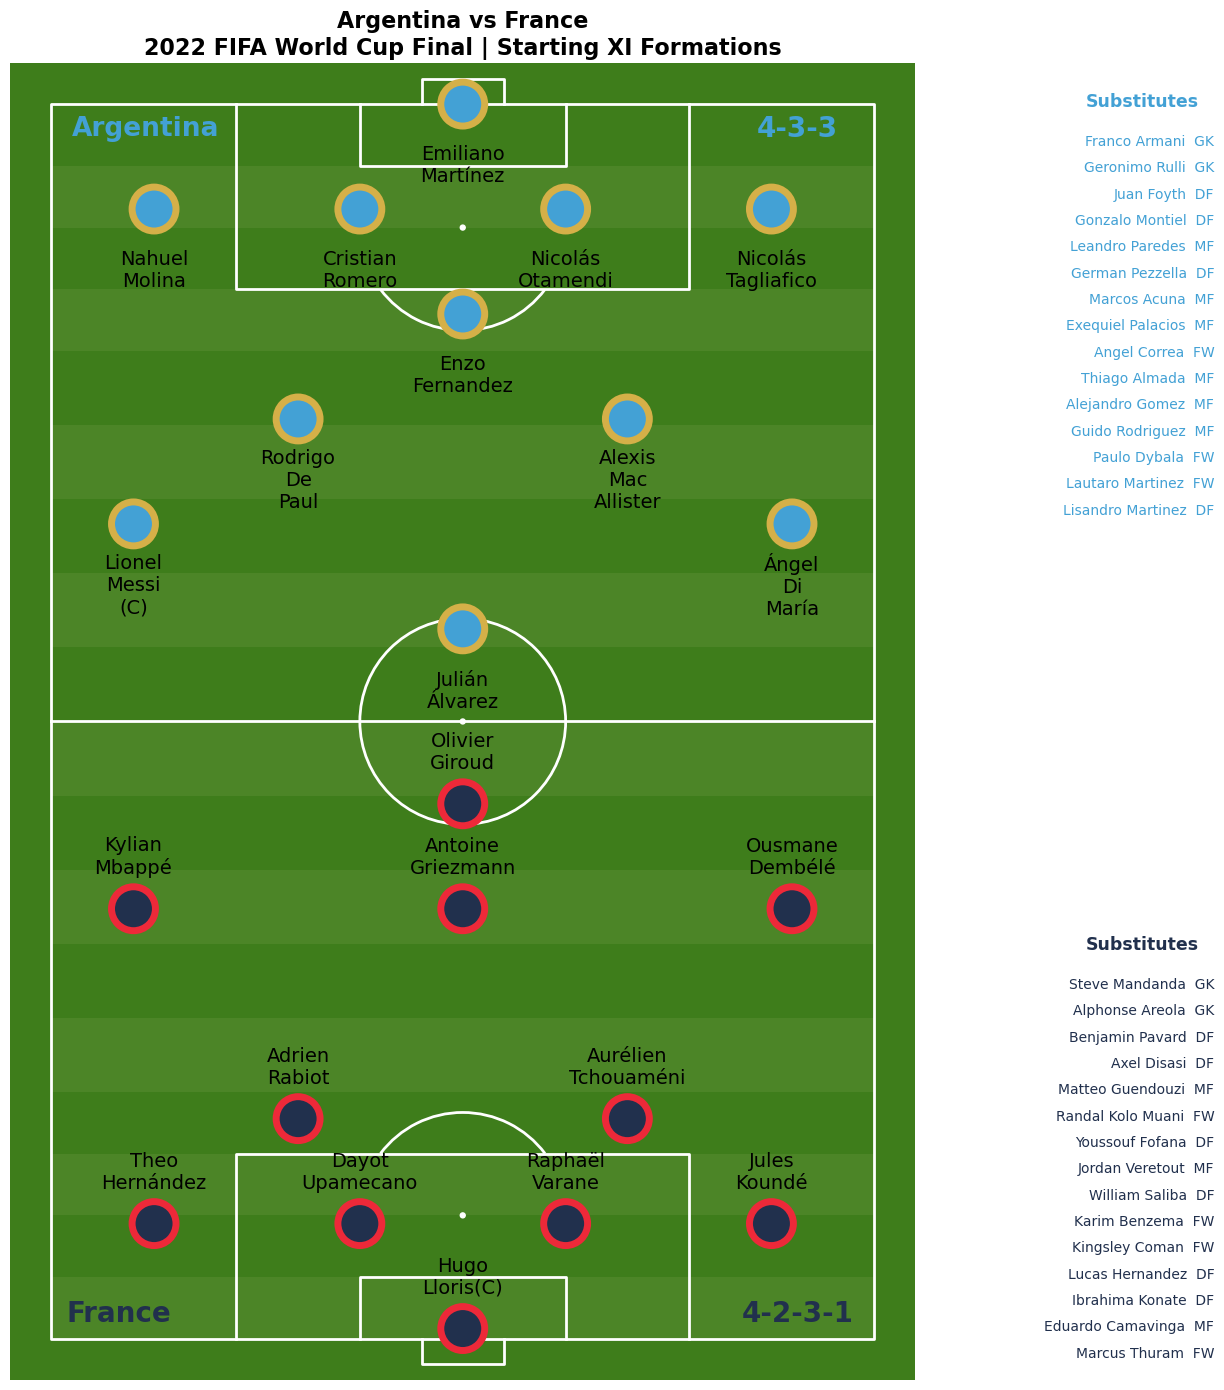

In [61]:
# Both Teams Starting XI Formation
france_formation = france_starting_XI['formation'].iloc[0]
argentina_formation = argentina_starting_XI['formation'].iloc[0]

# Convert formation to a string if it's not already
france_formation = str(france_formation)
argentina_formation = str(argentina_formation)

# Replace France's player names with the shorter version
france_player_short_names = {'Hugo Lloris': 'Hugo Lloris(C)',
                      'Jules Koundé': 'Jules Koundé',
                      'Raphaël Varane': 'Raphaël Varane',
                      'Dayotchanculle Upamecano': 'Dayot Upamecano',
                      'Theo Bernard François Hernández': 'Theo Hernández',
                      'Aurélien Djani Tchouaméni': 'Aurélien Tchouaméni',
                      'Adrien Rabiot': 'Adrien Rabiot',
                      'Ousmane Dembélé': 'Ousmane Dembélé',
                      'Antoine Griezmann': 'Antoine Griezmann',
                      'Kylian Mbappé Lottin': 'Kylian Mbappé',
                      "Olivier Giroud": "Olivier Giroud"}
france_starting_XI['player_name'] = france_starting_XI['player_name'].replace(france_player_short_names)

# Replace Argentina's player names with the shorter version
argentina_player_short_names = {'Damián Emiliano Martínez': 'Emiliano Martínez',
                      'Nahuel Molina Lucero': 'Nahuel Molina',
                      'Cristian Gabriel Romero': 'Cristian Romero',
                      'Nicolás Hernán Otamendi': 'Nicolás Otamendi',
                      'Nicolás Alejandro Tagliafico': 'Nicolás Tagliafico',
                      'Enzo Fernandez': 'Enzo Fernandez',
                      'Rodrigo Javier De Paul': 'Rodrigo De Paul',
                      'Alexis Mac Allister': 'Alexis Mac Allister',
                      'Lionel Andrés Messi Cuccittini': 'Lionel Messi (C)',
                      'Ángel Fabián Di María Hernández': 'Ángel Di María',
                      "Julián Álvarez": "Julián Álvarez"}
argentina_starting_XI['player_name'] = argentina_starting_XI['player_name'].replace(argentina_player_short_names)

pitch = VerticalPitch(goal_type='box', pitch_color='#3e7d1b', line_color='white', stripe_color='#4c8527', stripe=True)
fig, ax = pitch.draw(figsize=(14, 14))

# Plot France's starting formation on one half of the field
ax_text_france = pitch.formation(france_formation, positions=france_starting_XI.position_id, kind='text',
                                  text=france_starting_XI.player_name.str.replace(' ', '\n'),xoffset=3,
                                  va='center', ha='center', fontsize=14, ax=ax, half=True)

ax_scatter_france = pitch.formation(france_formation, positions=france_starting_XI.position_id, kind='scatter',
                                     c='#21304D', hatch='_', linewidth=5, s=1000, half=True,
                                     xoffset=-2, ax=ax, edgecolor='#ED2939')

# Plot Argentina's starting formation on the other half of the field
ax_text_argentina = pitch.formation(argentina_formation, positions=argentina_starting_XI.position_id, kind='text',
                                    text=argentina_starting_XI.player_name.str.replace(' ', '\n'), xoffset=-3,
                                    va='center', ha='center', fontsize=14, ax=ax, half=True, flip=True)

ax_scatter_argentina = pitch.formation(argentina_formation, positions=argentina_starting_XI.position_id, kind='scatter',
                                       c='#43A1D5', hatch='_', linewidth=5, s=1000, half=True, flip=True,
                                       xoffset=3, ax=ax, edgecolor='#D5B048')

# add title
title = "Argentina vs France\n2022 FIFA World Cup Final | Starting XI Formations"
ax.set_title(title, fontsize=16, fontweight='bold')

# Add title to the top half (Argentina)
top_left_half_title = "Argentina"
ax.text(0.15, 0.95, top_left_half_title, fontsize=19, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)

top_right_half_title = "4-3-3"
ax.text(0.87, 0.95, top_right_half_title, fontsize=20, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)

argentina_substitutes_title = "Substitutes"
ax.text(1.25, 0.97, argentina_substitutes_title, fontsize=12.5, va='center', ha='center', fontweight='bold',
        color="#43A1D5",transform=ax.transAxes)

# List of Argentina substitute player names
argentina_substitutes = [
    "Franco Armani  GK",
    "Geronimo Rulli  GK",
    "Juan Foyth  DF",
    "Gonzalo Montiel  DF",
    "Leandro Paredes  MF",
    "German Pezzella  DF",
    "Marcos Acuna  MF",
    "Exequiel Palacios  MF",
    "Angel Correa  FW",
    "Thiago Almada  MF",
    "Alejandro Gomez  MF",
    "Guido Rodriguez  MF",
    "Paulo Dybala  FW",
    "Lautaro Martinez  FW",
    "Lisandro Martinez  DF"
]

# Position for the first substitute
x_coordinate = 1.33
y_coordinate = 0.94

# Spacing between player names
line_height = 0.02

# Add the Argentina substitute player names
for substitute in argentina_substitutes:
    ax.text(x_coordinate, y_coordinate, substitute, fontsize=10, va='center', ha='right', color="#43A1D5", transform=ax.transAxes)
    y_coordinate -= line_height


# Add title to the bottom half (France)
bottom_left_half_title = "France"
ax.text(0.12, 0.05, bottom_left_half_title, fontsize=20, va='center', ha='center', fontweight='bold',
        color="#21304D" ,transform=ax.transAxes)

bottom_right_half_title = "4-2-3-1"
ax.text(0.87, 0.05, bottom_right_half_title, fontsize=20, va='center', ha='center', fontweight='bold',
        color="#21304D",transform=ax.transAxes)

# French substitutes title
france_substitutes_title = "Substitutes"
ax.text(1.25, 0.33, france_substitutes_title, fontsize=12.5, va='center', ha='center', fontweight='bold',
        color="#21304D",transform=ax.transAxes)

# List of French substitute player names
france_substitutes = [
    "Steve Mandanda  GK",
    "Alphonse Areola  GK",
    "Benjamin Pavard  DF",
    "Axel Disasi  DF",
    "Matteo Guendouzi  MF",
    "Randal Kolo Muani  FW",
    "Youssouf Fofana  DF",
    "Jordan Veretout  MF",
    "William Saliba  DF",
    "Karim Benzema  FW",
    "Kingsley Coman  FW",
    "Lucas Hernandez  DF",
    "Ibrahima Konate  DF",
    "Eduardo Camavinga  MF",
    "Marcus Thuram  FW"
    # Add more substitute player names here
]

# Position for the first substitute
x_coordinate = 1.33
y_coordinate = 0.30

# Spacing between player names
line_height = 0.02

# Add the French substitute player names
for substitute in france_substitutes:
    ax.text(x_coordinate, y_coordinate, substitute, fontsize=10, va='center', ha='right', color="#21304D", transform=ax.transAxes)
    y_coordinate -= line_height

# LET'S CREATE A PIZZA CHART COMPARING TOTAL STATISTICS

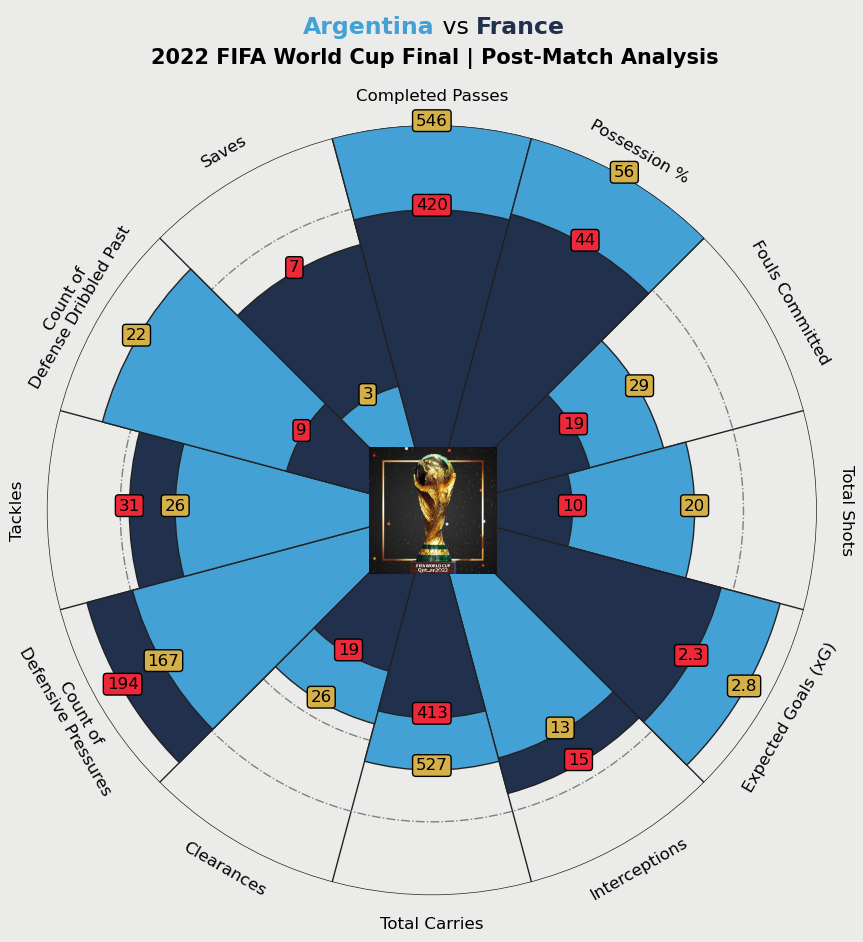

In [62]:
# Let's visualize both teams events

import matplotlib.pyplot as plt
!pip install highlight_text
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager, add_image
from urllib.request import urlopen
from PIL import Image


# Let's customize the chart and add an image...(Image of WC Trophy)
image_path = r"C:\Anaconda\PROJECTS\2022 FIFA WC Final Analysis\WC_Trophy for Pizza Chart2.jpg"
WC_Trophy = Image.open(image_path)



# Now let's create our comparison chart of event data for each team


# parameter and values list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
params = [
    "Completed Passes", "Possession %", "Fouls Committed",
    "Total Shots", "Expected Goals (xG)",
    "Interceptions", "Total Carries", "Clearances",
    "Count of\nDefensive Pressures", "Tackles",
    "Count of\nDefense Dribbled Past", "Saves"
]
values = [546, 56, 29, 20, 2.8, 13, 527, 26, 167, 26, 22, 3]    # for Argentina National Team
values_2 = [420, 44, 19, 10, 2.3, 15, 413, 19, 194, 31, 9, 7]  # for France National Team


# minimum range value and maximum range value for parameters
min_range = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
max_range = [546, 56, 48, 30, 3, 20, 800, 47, 210, 40, 25, 10]


# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    min_range=min_range,            # min range values
    max_range=max_range,            # max range values
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(10, 10),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#43A1D5", edgecolor="#222222", 
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#21304D", edgecolor="#222222", 
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12, 
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, 
      zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#D5B048",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,  zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#ED2939", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, "<Argentina> vs <France>", size=17, fig=fig,
    highlight_textprops=[{"color": '#43A1D5', "weight": "bold"}, {"color": '#21304D', "weight": "bold"}],
    ha="center", color="#000000"
)


# add subtitle
fig.text(
    0.515, 0.942,
    "2022 FIFA World Cup Final | Post-Match Analysis",
    size=15,
    ha="center",  color="#000000", weight="bold"
)

# add image
ax_image = add_image(
    WC_Trophy, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

# LET'S CREATE A PASSING MAP/NETWORK (PER TEAM)

In [63]:
# Let's filter to only show passes by Argentina
# Want to see who passed to who, what type of pass it was, and the location of the passes

# Let's filter to only show passes by Argentina
# Let's filter to only show passes by Argentina
argentina_passes = argentina.loc[(argentina['type_name'] == 'Pass') & 
                                 (argentina['possession_team_name'] == 'Argentina') &
                                 (argentina['team_name'] == 'Argentina')]

# Select the columns of interest
argentina_passes = argentina_passes[['player_id', 'player_name', 'possession_team_name','location', 'pass_height_name', 'pass_type_name', 'pass_outcome_name', 'pass_recipient_id', 'team_name', 'pass_recipient_name', 'pass_end_location']]

# Replace NaN values in 'pass_outcome_name' with 'Successful'
argentina_passes['pass_outcome_name'] = argentina_passes['pass_outcome_name'].fillna('Successful')
argentina_passes['pass_outcome_name'].value_counts()

# THIS SHOWS THAT 654 TOTAL PASSES....546 WERE COMPLETED

pass_outcome_name
Successful      546
Incomplete       89
Out              11
Unknown           5
Pass Offside      3
Name: count, dtype: int64

In [64]:
# LETS ADD 4 NEW COLUMNS, BREAKING UP STARTING PASS X/Y LOCATIONS & PASS ENDING LOCATIONS X/Y

# Extract starting x and y coordinates from the 'location' column
argentina_passes[['starting_x', 'starting_y']] = argentina_passes['location'].apply(lambda loc: pd.Series(loc))

# Extract ending x and y coordinates from the 'pass_end_location' column
argentina_passes[['ending_x', 'ending_y']] = argentina_passes['pass_end_location'].apply(lambda loc: pd.Series(loc))

# Add the 'formation' column with the value '433'
argentina_passes['formation'] = '433'
argentina_passes

player_id                      player_name possession_team_name  \
9       29201.0             Nahuel Molina Lucero            Argentina   
15       7797.0           Rodrigo Javier De Paul            Argentina   
18      20572.0          Cristian Gabriel Romero            Argentina   
21       3090.0          Nicolás Hernán Otamendi            Argentina   
24      20572.0          Cristian Gabriel Romero            Argentina   
27       3090.0          Nicolás Hernán Otamendi            Argentina   
31       5507.0     Nicolás Alejandro Tagliafico            Argentina   
37       5507.0     Nicolás Alejandro Tagliafico            Argentina   
39       3090.0          Nicolás Hernán Otamendi            Argentina   
42      20572.0          Cristian Gabriel Romero            Argentina   
45       3090.0          Nicolás Hernán Otamendi            Argentina   
48      20572.0          Cristian Gabriel Romero            Argentina   
51       3090.0          Nicolás Hernán Otamendi            Argentina   
55       6909.0         Damián Emiliano Martínez            Argentina   
80       5507.0     Nicolás Alejandro Tagliafico            Argentina   
83      27886.0              Alexis Mac Allister            Argentina   
87       5503.0   Lionel Andrés Messi Cuccittini            Argentina   
90       2995.0  Ángel Fabián Di María Hernández            Argentina   
94       7797.0           Rodrigo Javier De Paul            Argentina   
97       5503.0   Lionel Andrés Messi Cuccittini            Argentina   
100      7797.0           Rodrigo Javier De Paul            Argentina   
109     27886.0              Alexis Mac Allister            Argentina   
113      3090.0          Nicolás Hernán Otamendi            Argentina   
117     20572.0          Cristian Gabriel Romero            Argentina   
121      7797.0           Rodrigo Javier De Paul            Argentina   
123      3090.0          Nicolás Hernán Otamendi            Argentina   
126     38718.0                   Enzo Fernandez            Argentina   
129     20572.0          Cristian Gabriel Romero            Argentina   
132     29201.0             Nahuel Molina Lucero            Argentina   
139      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
142     20572.0          Cristian Gabriel Romero            Argentina   
146      2995.0  Ángel Fabián Di María Hernández            Argentina   
148      5507.0     Nicolás Alejandro Tagliafico            Argentina   
151     27886.0              Alexis Mac Allister            Argentina   
156      5507.0     Nicolás Alejandro Tagliafico            Argentina   
160     27886.0              Alexis Mac Allister            Argentina   
188     29560.0                   Julián Álvarez            Argentina   
298      7797.0           Rodrigo Javier De Paul            Argentina   
300     29201.0             Nahuel Molina Lucero            Argentina   
305     38718.0                   Enzo Fernandez            Argentina   
308      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
314     27886.0              Alexis Mac Allister            Argentina   
317      2995.0  Ángel Fabián Di María Hernández            Argentina   
320     27886.0              Alexis Mac Allister            Argentina   
323     38718.0                   Enzo Fernandez            Argentina   
330     29560.0                   Julián Álvarez            Argentina   
336      2995.0  Ángel Fabián Di María Hernández            Argentina   
342      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
344      7797.0           Rodrigo Javier De Paul            Argentina   
349      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
352      7797.0           Rodrigo Javier De Paul            Argentina   
373     20572.0          Cristian Gabriel Romero            Argentina   
377      7797.0           Rodrigo Javier De Paul            Argentina   
380     27886.0              Alexis Mac Allister            Arge

In [65]:
# NOW LETS FILTER BY ONLY SUCCESSFUL ARGENTINA PASSES (IN OTHER WORDS ONLY PASSES COMPLETED)

# Filter only successful passes
arg_successful_passes = argentina_passes[argentina_passes['pass_outcome_name'] == 'Successful']
arg_successful_passes

player_id                      player_name possession_team_name  \
9       29201.0             Nahuel Molina Lucero            Argentina   
15       7797.0           Rodrigo Javier De Paul            Argentina   
18      20572.0          Cristian Gabriel Romero            Argentina   
21       3090.0          Nicolás Hernán Otamendi            Argentina   
24      20572.0          Cristian Gabriel Romero            Argentina   
27       3090.0          Nicolás Hernán Otamendi            Argentina   
31       5507.0     Nicolás Alejandro Tagliafico            Argentina   
37       5507.0     Nicolás Alejandro Tagliafico            Argentina   
39       3090.0          Nicolás Hernán Otamendi            Argentina   
42      20572.0          Cristian Gabriel Romero            Argentina   
45       3090.0          Nicolás Hernán Otamendi            Argentina   
48      20572.0          Cristian Gabriel Romero            Argentina   
51       3090.0          Nicolás Hernán Otamendi            Argentina   
80       5507.0     Nicolás Alejandro Tagliafico            Argentina   
83      27886.0              Alexis Mac Allister            Argentina   
87       5503.0   Lionel Andrés Messi Cuccittini            Argentina   
94       7797.0           Rodrigo Javier De Paul            Argentina   
97       5503.0   Lionel Andrés Messi Cuccittini            Argentina   
109     27886.0              Alexis Mac Allister            Argentina   
113      3090.0          Nicolás Hernán Otamendi            Argentina   
121      7797.0           Rodrigo Javier De Paul            Argentina   
123      3090.0          Nicolás Hernán Otamendi            Argentina   
126     38718.0                   Enzo Fernandez            Argentina   
129     20572.0          Cristian Gabriel Romero            Argentina   
139      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
142     20572.0          Cristian Gabriel Romero            Argentina   
146      2995.0  Ángel Fabián Di María Hernández            Argentina   
148      5507.0     Nicolás Alejandro Tagliafico            Argentina   
151     27886.0              Alexis Mac Allister            Argentina   
156      5507.0     Nicolás Alejandro Tagliafico            Argentina   
188     29560.0                   Julián Álvarez            Argentina   
298      7797.0           Rodrigo Javier De Paul            Argentina   
305     38718.0                   Enzo Fernandez            Argentina   
308      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
314     27886.0              Alexis Mac Allister            Argentina   
317      2995.0  Ángel Fabián Di María Hernández            Argentina   
320     27886.0              Alexis Mac Allister            Argentina   
330     29560.0                   Julián Álvarez            Argentina   
336      2995.0  Ángel Fabián Di María Hernández            Argentina   
344      7797.0           Rodrigo Javier De Paul            Argentina   
349      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
377      7797.0           Rodrigo Javier De Paul            Argentina   
380     27886.0              Alexis Mac Allister            Argentina   
383      2995.0  Ángel Fabián Di María Hernández            Argentina   
386      5507.0     Nicolás Alejandro Tagliafico            Argentina   
389      3090.0          Nicolás Hernán Otamendi            Argentina   
392      6909.0         Damián Emiliano Martínez            Argentina   
395     20572.0          Cristian Gabriel Romero            Argentina   
405     29201.0             Nahuel Molina Lucero            Argentina   
408     38718.0                   Enzo Fernandez            Argentina   
411      7797.0           Rodrigo Javier De Paul            Argentina   
414      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
422      2995.0  Ángel Fabián Di María Hernández            Argentina   
426      7797.0           Rodrigo Javier De Paul            Arge

In [66]:
#LETS ADD PASSER POSITION ID AND PASSER POSITION NAME

# Specify the columns to be merged
merge_columns = ['player_id']

# Merge the two DataFrames on 'player_name'
merged_df = pd.merge(arg_successful_passes, lineups[['player_id', 'position_id', 'position_name']], on=merge_columns, how='left')
merged_df

player_id                      player_name possession_team_name  \
0      29201.0             Nahuel Molina Lucero            Argentina   
1       7797.0           Rodrigo Javier De Paul            Argentina   
2      20572.0          Cristian Gabriel Romero            Argentina   
3       3090.0          Nicolás Hernán Otamendi            Argentina   
4      20572.0          Cristian Gabriel Romero            Argentina   
5       3090.0          Nicolás Hernán Otamendi            Argentina   
6       5507.0     Nicolás Alejandro Tagliafico            Argentina   
7       5507.0     Nicolás Alejandro Tagliafico            Argentina   
8       3090.0          Nicolás Hernán Otamendi            Argentina   
9      20572.0          Cristian Gabriel Romero            Argentina   
10      3090.0          Nicolás Hernán Otamendi            Argentina   
11     20572.0          Cristian Gabriel Romero            Argentina   
12      3090.0          Nicolás Hernán Otamendi            Argentina   
13      5507.0     Nicolás Alejandro Tagliafico            Argentina   
14     27886.0              Alexis Mac Allister            Argentina   
15      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
16      7797.0           Rodrigo Javier De Paul            Argentina   
17      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
18     27886.0              Alexis Mac Allister            Argentina   
19      3090.0          Nicolás Hernán Otamendi            Argentina   
20      7797.0           Rodrigo Javier De Paul            Argentina   
21      3090.0          Nicolás Hernán Otamendi            Argentina   
22     38718.0                   Enzo Fernandez            Argentina   
23     20572.0          Cristian Gabriel Romero            Argentina   
24      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
25     20572.0          Cristian Gabriel Romero            Argentina   
26      2995.0  Ángel Fabián Di María Hernández            Argentina   
27      5507.0     Nicolás Alejandro Tagliafico            Argentina   
28     27886.0              Alexis Mac Allister            Argentina   
29      5507.0     Nicolás Alejandro Tagliafico            Argentina   
30     29560.0                   Julián Álvarez            Argentina   
31      7797.0           Rodrigo Javier De Paul            Argentina   
32     38718.0                   Enzo Fernandez            Argentina   
33      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
34     27886.0              Alexis Mac Allister            Argentina   
35      2995.0  Ángel Fabián Di María Hernández            Argentina   
36     27886.0              Alexis Mac Allister            Argentina   
37     29560.0                   Julián Álvarez            Argentina   
38      2995.0  Ángel Fabián Di María Hernández            Argentina   
39      7797.0           Rodrigo Javier De Paul            Argentina   
40      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
41      7797.0           Rodrigo Javier De Paul            Argentina   
42     27886.0              Alexis Mac Allister            Argentina   
43      2995.0  Ángel Fabián Di María Hernández            Argentina   
44      5507.0     Nicolás Alejandro Tagliafico            Argentina   
45      3090.0          Nicolás Hernán Otamendi            Argentina   
46      6909.0         Damián Emiliano Martínez            Argentina   
47     20572.0          Cristian Gabriel Romero            Argentina   
48     29201.0             Nahuel Molina Lucero            Argentina   
49     38718.0                   Enzo Fernandez            Argentina   
50      7797.0           Rodrigo Javier De Paul            Argentina   
51      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
52      2995.0  Ángel Fabián Di María Hernández            Argentina   
53      7797.0           Rodrigo Javier De Paul            Argentina   
54      6909.0         Damián Emiliano Martín

In [67]:
# LETS ADD POSITION ID AND POSITION NAME TO ALL OF THE ARGENTINA SUBS WHO ARE MISSING THOSE VALUES

# Define a mapping between players for position values
player_mapping = {
    19597.0: 2995.0,
    28263.0: 29201.0,
    16308.0: 7797.0,
    11456.0: 29560.0,
    7161.0: 27886.0,
    5743.0: 5507.0
}

# Iterate through the mapping and update the DataFrame
for player_id, reference_player_id in player_mapping.items():
    reference_values = merged_df.loc[merged_df['player_id'] == reference_player_id, ['position_id', 'position_name']].iloc[0]
    merged_df.loc[merged_df['player_id'] == player_id, ['position_id', 'position_name']] = reference_values.values

merged_df

player_id                      player_name possession_team_name  \
0      29201.0             Nahuel Molina Lucero            Argentina   
1       7797.0           Rodrigo Javier De Paul            Argentina   
2      20572.0          Cristian Gabriel Romero            Argentina   
3       3090.0          Nicolás Hernán Otamendi            Argentina   
4      20572.0          Cristian Gabriel Romero            Argentina   
5       3090.0          Nicolás Hernán Otamendi            Argentina   
6       5507.0     Nicolás Alejandro Tagliafico            Argentina   
7       5507.0     Nicolás Alejandro Tagliafico            Argentina   
8       3090.0          Nicolás Hernán Otamendi            Argentina   
9      20572.0          Cristian Gabriel Romero            Argentina   
10      3090.0          Nicolás Hernán Otamendi            Argentina   
11     20572.0          Cristian Gabriel Romero            Argentina   
12      3090.0          Nicolás Hernán Otamendi            Argentina   
13      5507.0     Nicolás Alejandro Tagliafico            Argentina   
14     27886.0              Alexis Mac Allister            Argentina   
15      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
16      7797.0           Rodrigo Javier De Paul            Argentina   
17      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
18     27886.0              Alexis Mac Allister            Argentina   
19      3090.0          Nicolás Hernán Otamendi            Argentina   
20      7797.0           Rodrigo Javier De Paul            Argentina   
21      3090.0          Nicolás Hernán Otamendi            Argentina   
22     38718.0                   Enzo Fernandez            Argentina   
23     20572.0          Cristian Gabriel Romero            Argentina   
24      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
25     20572.0          Cristian Gabriel Romero            Argentina   
26      2995.0  Ángel Fabián Di María Hernández            Argentina   
27      5507.0     Nicolás Alejandro Tagliafico            Argentina   
28     27886.0              Alexis Mac Allister            Argentina   
29      5507.0     Nicolás Alejandro Tagliafico            Argentina   
30     29560.0                   Julián Álvarez            Argentina   
31      7797.0           Rodrigo Javier De Paul            Argentina   
32     38718.0                   Enzo Fernandez            Argentina   
33      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
34     27886.0              Alexis Mac Allister            Argentina   
35      2995.0  Ángel Fabián Di María Hernández            Argentina   
36     27886.0              Alexis Mac Allister            Argentina   
37     29560.0                   Julián Álvarez            Argentina   
38      2995.0  Ángel Fabián Di María Hernández            Argentina   
39      7797.0           Rodrigo Javier De Paul            Argentina   
40      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
41      7797.0           Rodrigo Javier De Paul            Argentina   
42     27886.0              Alexis Mac Allister            Argentina   
43      2995.0  Ángel Fabián Di María Hernández            Argentina   
44      5507.0     Nicolás Alejandro Tagliafico            Argentina   
45      3090.0          Nicolás Hernán Otamendi            Argentina   
46      6909.0         Damián Emiliano Martínez            Argentina   
47     20572.0          Cristian Gabriel Romero            Argentina   
48     29201.0             Nahuel Molina Lucero            Argentina   
49     38718.0                   Enzo Fernandez            Argentina   
50      7797.0           Rodrigo Javier De Paul            Argentina   
51      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
52      2995.0  Ángel Fabián Di María Hernández            Argentina   
53      7797.0           Rodrigo Javier De Paul            Argentina   
54      6909.0         Damián Emiliano Martín

In [68]:
# LETS ADD POSITION ABBREVIATION TO THE MERGED DF ABOVE SO THAT WE CAN PLOT

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'CF', 24: 'LCF', 25: 'SS'}
merged_df['position_abbreviation'] = merged_df.position_id.map(formation_dict)
merged_df

player_id                      player_name possession_team_name  \
0      29201.0             Nahuel Molina Lucero            Argentina   
1       7797.0           Rodrigo Javier De Paul            Argentina   
2      20572.0          Cristian Gabriel Romero            Argentina   
3       3090.0          Nicolás Hernán Otamendi            Argentina   
4      20572.0          Cristian Gabriel Romero            Argentina   
5       3090.0          Nicolás Hernán Otamendi            Argentina   
6       5507.0     Nicolás Alejandro Tagliafico            Argentina   
7       5507.0     Nicolás Alejandro Tagliafico            Argentina   
8       3090.0          Nicolás Hernán Otamendi            Argentina   
9      20572.0          Cristian Gabriel Romero            Argentina   
10      3090.0          Nicolás Hernán Otamendi            Argentina   
11     20572.0          Cristian Gabriel Romero            Argentina   
12      3090.0          Nicolás Hernán Otamendi            Argentina   
13      5507.0     Nicolás Alejandro Tagliafico            Argentina   
14     27886.0              Alexis Mac Allister            Argentina   
15      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
16      7797.0           Rodrigo Javier De Paul            Argentina   
17      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
18     27886.0              Alexis Mac Allister            Argentina   
19      3090.0          Nicolás Hernán Otamendi            Argentina   
20      7797.0           Rodrigo Javier De Paul            Argentina   
21      3090.0          Nicolás Hernán Otamendi            Argentina   
22     38718.0                   Enzo Fernandez            Argentina   
23     20572.0          Cristian Gabriel Romero            Argentina   
24      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
25     20572.0          Cristian Gabriel Romero            Argentina   
26      2995.0  Ángel Fabián Di María Hernández            Argentina   
27      5507.0     Nicolás Alejandro Tagliafico            Argentina   
28     27886.0              Alexis Mac Allister            Argentina   
29      5507.0     Nicolás Alejandro Tagliafico            Argentina   
30     29560.0                   Julián Álvarez            Argentina   
31      7797.0           Rodrigo Javier De Paul            Argentina   
32     38718.0                   Enzo Fernandez            Argentina   
33      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
34     27886.0              Alexis Mac Allister            Argentina   
35      2995.0  Ángel Fabián Di María Hernández            Argentina   
36     27886.0              Alexis Mac Allister            Argentina   
37     29560.0                   Julián Álvarez            Argentina   
38      2995.0  Ángel Fabián Di María Hernández            Argentina   
39      7797.0           Rodrigo Javier De Paul            Argentina   
40      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
41      7797.0           Rodrigo Javier De Paul            Argentina   
42     27886.0              Alexis Mac Allister            Argentina   
43      2995.0  Ángel Fabián Di María Hernández            Argentina   
44      5507.0     Nicolás Alejandro Tagliafico            Argentina   
45      3090.0          Nicolás Hernán Otamendi            Argentina   
46      6909.0         Damián Emiliano Martínez            Argentina   
47     20572.0          Cristian Gabriel Romero            Argentina   
48     29201.0             Nahuel Molina Lucero            Argentina   
49     38718.0                   Enzo Fernandez            Argentina   
50      7797.0           Rodrigo Javier De Paul            Argentina   
51      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
52      2995.0  Ángel Fabián Di María Hernández            Argentina   
53      7797.0           Rodrigo Javier De Paul            Argentina   
54      6909.0         Damián Emiliano Martín

In [69]:
# LETS ADD A PASS_RECIPIENT_POSITION COLUMN TO THE MERGED_DF
# Create a dictionary mapping player names to positions
player_position_dict = merged_df.set_index('player_name')['position_abbreviation'].to_dict()

# Use the map function to create a new column 'recipient_position'
merged_df['recipient_position'] = merged_df['pass_recipient_name'].map(player_position_dict)
merged_df

player_id                      player_name possession_team_name  \
0      29201.0             Nahuel Molina Lucero            Argentina   
1       7797.0           Rodrigo Javier De Paul            Argentina   
2      20572.0          Cristian Gabriel Romero            Argentina   
3       3090.0          Nicolás Hernán Otamendi            Argentina   
4      20572.0          Cristian Gabriel Romero            Argentina   
5       3090.0          Nicolás Hernán Otamendi            Argentina   
6       5507.0     Nicolás Alejandro Tagliafico            Argentina   
7       5507.0     Nicolás Alejandro Tagliafico            Argentina   
8       3090.0          Nicolás Hernán Otamendi            Argentina   
9      20572.0          Cristian Gabriel Romero            Argentina   
10      3090.0          Nicolás Hernán Otamendi            Argentina   
11     20572.0          Cristian Gabriel Romero            Argentina   
12      3090.0          Nicolás Hernán Otamendi            Argentina   
13      5507.0     Nicolás Alejandro Tagliafico            Argentina   
14     27886.0              Alexis Mac Allister            Argentina   
15      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
16      7797.0           Rodrigo Javier De Paul            Argentina   
17      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
18     27886.0              Alexis Mac Allister            Argentina   
19      3090.0          Nicolás Hernán Otamendi            Argentina   
20      7797.0           Rodrigo Javier De Paul            Argentina   
21      3090.0          Nicolás Hernán Otamendi            Argentina   
22     38718.0                   Enzo Fernandez            Argentina   
23     20572.0          Cristian Gabriel Romero            Argentina   
24      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
25     20572.0          Cristian Gabriel Romero            Argentina   
26      2995.0  Ángel Fabián Di María Hernández            Argentina   
27      5507.0     Nicolás Alejandro Tagliafico            Argentina   
28     27886.0              Alexis Mac Allister            Argentina   
29      5507.0     Nicolás Alejandro Tagliafico            Argentina   
30     29560.0                   Julián Álvarez            Argentina   
31      7797.0           Rodrigo Javier De Paul            Argentina   
32     38718.0                   Enzo Fernandez            Argentina   
33      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
34     27886.0              Alexis Mac Allister            Argentina   
35      2995.0  Ángel Fabián Di María Hernández            Argentina   
36     27886.0              Alexis Mac Allister            Argentina   
37     29560.0                   Julián Álvarez            Argentina   
38      2995.0  Ángel Fabián Di María Hernández            Argentina   
39      7797.0           Rodrigo Javier De Paul            Argentina   
40      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
41      7797.0           Rodrigo Javier De Paul            Argentina   
42     27886.0              Alexis Mac Allister            Argentina   
43      2995.0  Ángel Fabián Di María Hernández            Argentina   
44      5507.0     Nicolás Alejandro Tagliafico            Argentina   
45      3090.0          Nicolás Hernán Otamendi            Argentina   
46      6909.0         Damián Emiliano Martínez            Argentina   
47     20572.0          Cristian Gabriel Romero            Argentina   
48     29201.0             Nahuel Molina Lucero            Argentina   
49     38718.0                   Enzo Fernandez            Argentina   
50      7797.0           Rodrigo Javier De Paul            Argentina   
51      5503.0   Lionel Andrés Messi Cuccittini            Argentina   
52      2995.0  Ángel Fabián Di María Hernández            Argentina   
53      7797.0           Rodrigo Javier De Paul            Argentina   
54      6909.0         Damián Emiliano Martín

In [70]:
# NOW LETS FIND THE AVERAGE LOCATIONS AND COUNT OF PASSES PER POSITION

arg_average_locations = merged_df.groupby('position_abbreviation').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
arg_average_locations.columns = ['starting_x', 'starting_y', 'count']
arg_average_locations

starting_x  starting_y  count
position_abbreviation                               
CDM                     55.376923   42.929487     78
CF                      79.087097   35.174194     31
GK                      11.941176   41.305882     17
LB                      59.152273    8.397727     44
LCB                     38.990909   24.303030     66
LCM                     67.826087   26.732609     46
LW                      80.352273   10.802273     44
RB                      61.019565   72.315217     46
RCB                     34.043860   52.978947     57
RCM                     57.781159   54.840580     69
RW                      76.345833   49.352083     48

In [71]:
# NOW LETS FIND THE AVERAGE LOCATIONS AND COUNT OF PASSES PER PLAYER

arg_average_locations = merged_df.groupby('player_name').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
arg_average_locations.columns = ['starting_x', 'starting_y', 'count']
arg_average_locations

starting_x  starting_y  count
player_name                                                   
Alexis Mac Allister               68.148889   26.637778     45
Cristian Gabriel Romero           34.043860   52.978947     57
Damián Emiliano Martínez          11.941176   41.305882     17
Enzo Fernandez                    55.376923   42.929487     78
Germán Alejandro Pezzella         53.300000   31.000000      1
Gonzalo Ariel Montiel             72.262500   71.350000      8
Julián Álvarez                    77.707692   34.746154     26
Lautaro Javier Martínez           86.260000   37.400000      5
Leandro Daniel Paredes            54.807143   40.107143     14
Lionel Andrés Messi Cuccittini    76.345833   49.352083     48
Marcos Javier Acuña               80.968421    9.952632     19
Nahuel Molina Lucero              58.652632   72.518421     38
Nicolás Alejandro Tagliafico      59.497674    7.469767     43
Nicolás Hernán Otamendi           38.990909   24.303030     66
Paulo Bruno Exequiel Dybala       44.300000   48.300000      1
Rodrigo Javier De Paul            58.538182   58.590909     55
Ángel Fabián Di María Hernández   79.884000   11.448000     25

In [72]:
# NOW LETS FIND THE NUMBER OF PASSES BETWEEN EACH PLAYER
arg_average_locations = merged_df.groupby('player_name').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
arg_average_locations.columns = ['starting_x', 'starting_y', 'count']
arg_average_locations

arg_pass_between = merged_df.groupby(['player_name','position_abbreviation', 'pass_recipient_name', 'recipient_position']).pass_outcome_name.count().reset_index()
arg_pass_between.rename({'pass_outcome_name': 'pass_count'}, axis='columns', inplace=True)

arg_pass_between = arg_pass_between.merge(arg_average_locations, left_on='player_name', right_index=True)
arg_pass_between = arg_pass_between.merge(arg_average_locations, left_on='pass_recipient_name', right_index=True, suffixes=['','_end'])
arg_pass_between

player_name position_abbreviation  \
0                Alexis Mac Allister                   LCM   
12           Cristian Gabriel Romero                   RCB   
22          Damián Emiliano Martínez                    GK   
42             Gonzalo Ariel Montiel                    RB   
47                    Julián Álvarez                    CF   
54           Lautaro Javier Martínez                    CF   
59            Leandro Daniel Paredes                   RCM   
67    Lionel Andrés Messi Cuccittini                    RW   
78               Marcos Javier Acuña                    LW   
88              Nahuel Molina Lucero                    RB   
94      Nicolás Alejandro Tagliafico                    LB   
102          Nicolás Hernán Otamendi                   LCB   
111      Paulo Bruno Exequiel Dybala                    LB   
115           Rodrigo Javier De Paul                   RCM   
122  Ángel Fabián Di María Hernández                    LW   
1                Alexis Mac Allister                   LCM   
14           Cristian Gabriel Romero                   RCB   
31                    Enzo Fernandez                   CDM   
69    Lionel Andrés Messi Cuccittini                    RW   
79               Marcos Javier Acuña                    LW   
89              Nahuel Molina Lucero                    RB   
95      Nicolás Alejandro Tagliafico                    LB   
116           Rodrigo Javier De Paul                   RCM   
123  Ángel Fabián Di María Hernández                    LW   
2                Alexis Mac Allister                   LCM   
32                    Enzo Fernandez                   CDM   
43             Gonzalo Ariel Montiel                    RB   
70    Lionel Andrés Messi Cuccittini                    RW   
80               Marcos Javier Acuña                    LW   
3                Alexis Mac Allister                   LCM   
33                    Enzo Fernandez                   CDM   
44             Gonzalo Ariel Montiel                    RB   
55           Lautaro Javier Martínez                    CF   
104          Nicolás Hernán Otamendi                   LCB   
4                Alexis Mac Allister                   LCM   
15           Cristian Gabriel Romero                   RCB   
34                    Enzo Fernandez                   CDM   
45             Gonzalo Ariel Montiel                    RB   
48                    Julián Álvarez                    CF   
56           Lautaro Javier Martínez                    CF   
61            Leandro Daniel Paredes                   RCM   
81               Marcos Javier Acuña                    LW   
90              Nahuel Molina Lucero                    RB   
117           Rodrigo Javier De Paul                   RCM   
124  Ángel Fabián Di María Hernández                    LW   
5                Alexis Mac Allister                   LCM   
16           Cristian Gabriel Romero                   RCB   
23          Damián Emiliano Martínez                    GK   
35                    Enzo Fernandez                   CDM   
49                    Julián Álvarez                    CF   
57           Lautaro Javier Martínez                    CF   
62            Leandro Daniel Paredes                   RCM   
71    Lionel Andrés Messi Cuccittini                    RW   
96      Nicolás Alejandro Tagliafico                    LB   
105          Nicolás Hernán Otamendi                   LCB   
118           Rodrigo Javier De Paul                   RCM   
6                Alexis Mac Allister                   LCM   
37                    Enzo Fernandez                   CDM   
51                    Julián Álvarez                    CF   
63            Leandro Daniel Paredes                   RCM   
82               Marcos Javier Acuña                    LW   
107          Nicolás Hernán Otamendi                   LCB   
126  Ángel Fabián Di María Hernández                    LW   
7                Alexis Mac Allister                   LC

In [73]:
# NOW LET'S FIND THE NUMBER OF PASSES BETWEEN EACH POSITION
arg_average_locations = merged_df.groupby('position_abbreviation').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
arg_average_locations.columns = ['starting_x', 'starting_y', 'count']
arg_average_locations

arg_pass_between = merged_df.groupby(['position_abbreviation', 'recipient_position']).pass_outcome_name.count().reset_index()
arg_pass_between.rename({'pass_outcome_name': 'pass_count'}, axis='columns', inplace=True)

# Merge with average locations for the starting position
arg_pass_between = arg_pass_between.merge(arg_average_locations, left_on='position_abbreviation', right_index=True)

# Merge with average locations for the recipient position
arg_pass_between = arg_pass_between.merge(arg_average_locations, left_on='recipient_position', right_index=True, suffixes=['', '_end'])
arg_pass_between

position_abbreviation recipient_position  pass_count  starting_x  \
0                    CDM                 CF           5   55.376923   
23                    LB                 CF           5   59.152273   
36                   LCM                 CF           2   67.826087   
43                    LW                 CF           7   80.352273   
52                    RB                 CF           5   61.019565   
60                   RCB                 CF           2   34.043860   
69                   RCM                 CF           4   57.781159   
79                    RW                 CF           6   76.345833   
1                    CDM                 LB           5   55.376923   
10                    CF                 LB           1   79.087097   
17                    GK                 LB           1   11.941176   
29                   LCB                 LB          16   38.990909   
37                   LCM                 LB           3   67.826087   
45                    LW                 LB           8   80.352273   
71                   RCM                 LB           1   57.781159   
2                    CDM                LCB           9   55.376923   
18                    GK                LCB           6   11.941176   
24                    LB                LCB          10   59.152273   
38                   LCM                LCB           4   67.826087   
46                    LW                LCB           7   80.352273   
54                    RB                LCB           1   61.019565   
62                   RCB                LCB          12   34.043860   
72                   RCM                LCB          10   57.781159   
80                    RW                LCB           1   76.345833   
3                    CDM                LCM           9   55.376923   
11                    CF                LCM           5   79.087097   
25                    LB                LCM          13   59.152273   
30                   LCB                LCM           2   38.990909   
47                    LW                LCM           7   80.352273   
55                    RB                LCM           1   61.019565   
63                   RCB                LCM           1   34.043860   
73                   RCM                LCM           3   57.781159   
81                    RW                LCM           6   76.345833   
4                    CDM                 LW           5   55.376923   
12                    CF                 LW           5   79.087097   
19                    GK                 LW           2   11.941176   
26                    LB                 LW          11   59.152273   
31                   LCB                 LW           6   38.990909   
39                   LCM                 LW          14   67.826087   
64                   RCB                 LW           4   34.043860   
74                   RCM                 LW           3   57.781159   
82                    RW                 LW           7   76.345833   
5                    CDM                 RB          11   55.376923   
13                    CF                 RB           2   79.087097   
20                    GK                 RB           1   11.941176   
32                   LCB                 RB           1   38.990909   
48                    LW                 RB           2   80.352273   
65                   RCB                 RB           9   34.043860   
75                   RCM                 RB           9   57.781159   
83                    RW                 RB           7   76.345833   
6                    CDM                RCB           7   55.376923   
21                    GK                RCB           5   11.941176   
33                   LCB                RCB          17   38.990909   
56                    RB                RCB           3   61.019565   
76                   RCM                RCB           9   57.781159   
84                    RW   

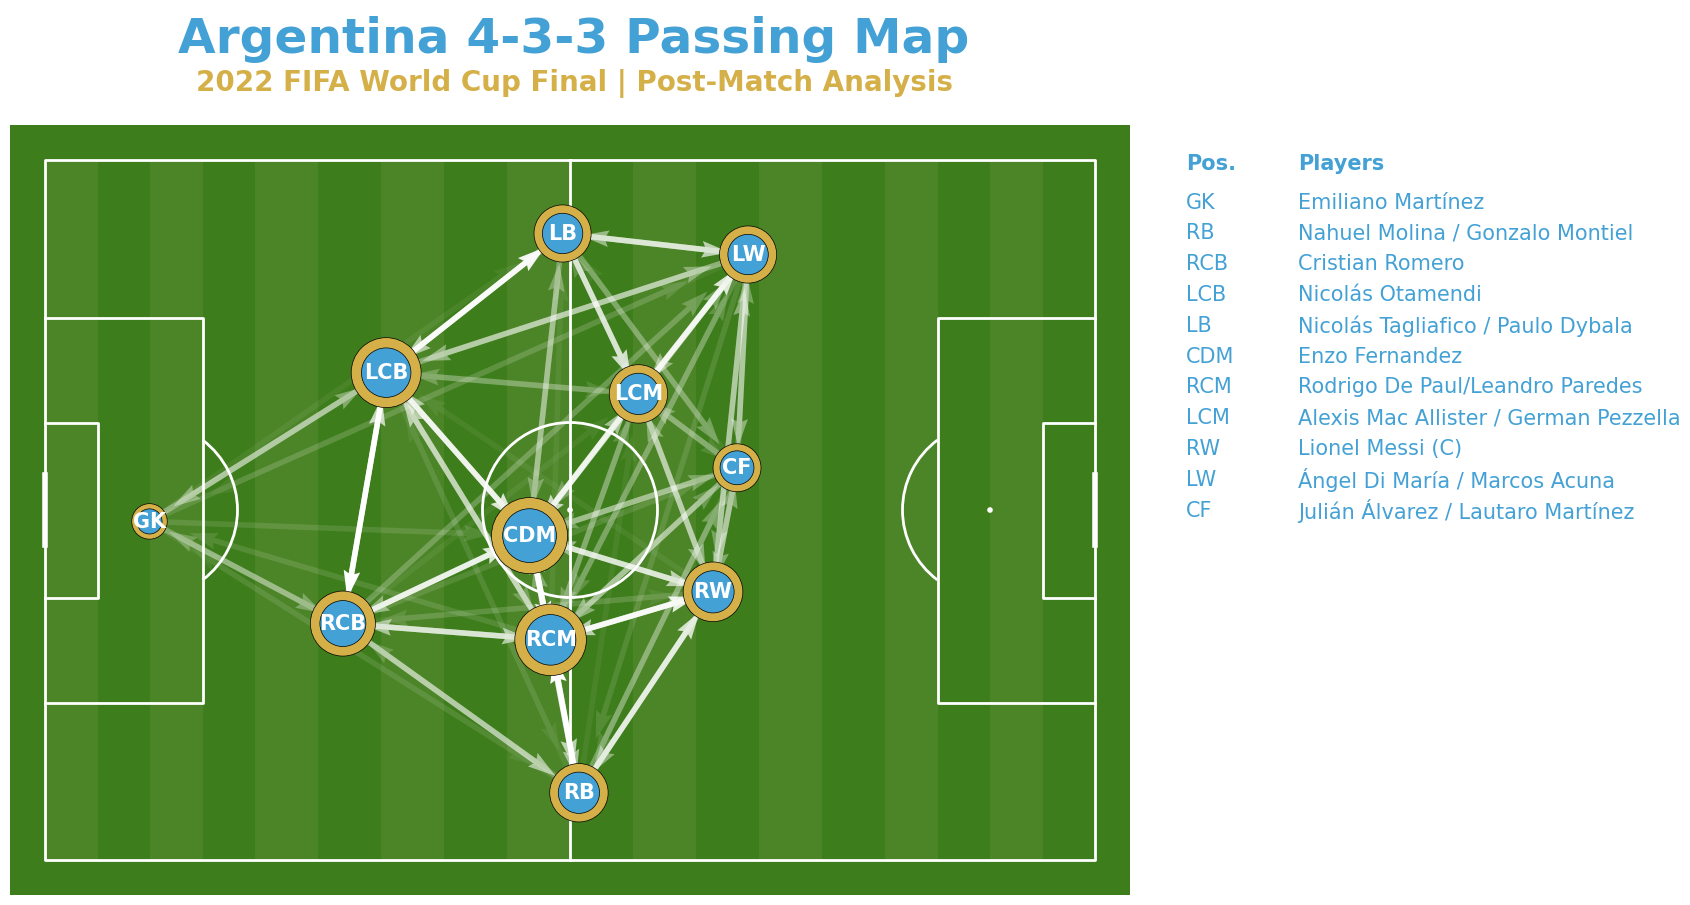

In [74]:
# NOW LETS CREATE THE PITCH AND PLOT OUR PASSING MAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# NOW LETS MAKE THE NODES BASED OFF POSITION AND NOT PLAYERS 
arg_average_locations = merged_df.groupby('position_abbreviation').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
arg_average_locations.columns = ['starting_x', 'starting_y', 'count']
arg_average_locations

# Rename the 'count' column to avoid naming conflict
arg_pass_between.rename(columns={'count': 'counts'}, inplace=True)

#Calculate the line width and marker sizes relative to the largest counts
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
arg_pass_between['width'] = (arg_pass_between.counts / arg_pass_between.counts.max() *
                           MAX_LINE_WIDTH)
arg_average_locations['marker_size'] = (arg_average_locations['count']
                                         / arg_average_locations['count'].max() * MAX_MARKER_SIZE)

#Set the color and transparency of lines when fewer passes are made
MIN_TRANSPARENCY = 0
color = np.array(to_rgba('white'))
color = np.tile(color, (len(arg_pass_between), 1))
c_transparency = arg_pass_between.pass_count / arg_pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb',pitch_color='#3e7d1b', line_color='white', stripe_color='#4c8527', stripe=True)
fig, ax = pitch.draw(figsize=(16, 10), constrained_layout=False, tight_layout=False)


# Creating the passing arrows
# Calculate the adjustment factor for arrow length
ARROW_LENGTH_FACTOR = 0.9  # Adjust this factor to control arrow length

# Creating the passing arrows with adjusted transparency and length
adjusted_end_x = arg_pass_between.starting_x + (arg_pass_between.starting_x_end - arg_pass_between.starting_x) * ARROW_LENGTH_FACTOR
adjusted_end_y = arg_pass_between.starting_y + (arg_pass_between.starting_y_end - arg_pass_between.starting_y) * ARROW_LENGTH_FACTOR

arg_pass_arrows = pitch.arrows(arg_pass_between.starting_x, arg_pass_between.starting_y, 
                               adjusted_end_x, adjusted_end_y, 
                               lw=arg_pass_between.width, color='#FFFFFF', alpha=c_transparency, zorder=1, ax=ax)

#creating the nodes
arg_pass_nodes = pitch.scatter(arg_average_locations.starting_x, arg_average_locations.starting_y, 
                              s=arg_average_locations.marker_size,
                              color='#D5B048', edgecolors='black', linewidth=0.5, alpha=1, ax=ax)
#creating the internal nodes
arg_pass_nodes_interal = pitch.scatter(arg_average_locations.starting_x, arg_average_locations.starting_y,
                              s=arg_average_locations.marker_size / 2, color = '#43A1D5', edgecolors='black',
                                       linewidth=0.5, alpha=1, ax=ax)


# Add position abbreviations as text labels inside the nodes
for index, row in arg_average_locations.iterrows():
    ax.text(row['starting_x'], row['starting_y'], row.name, color='white',
            fontsize=15, ha='center', va='center', fontweight='bold')

    
# add title
fig_text(
    0.515, 0.99, "Argentina 4-3-3 Passing Map", size=35, fig=fig,
    color='#43A1D5',
    ha="center", weight="bold"
)

# add subtitle
fig.text(
    0.515, 0.915,
    "2022 FIFA World Cup Final | Post-Match Analysis",
    size=20,
    ha="center",  color="#D5B048", weight="bold"
)

# Adding player names and their position played
argentina_player_title = "Players"
ax.text(1.15, .95, argentina_player_title, fontsize=15, va='center', ha='left', fontweight='bold',
        color="#43A1D5",transform=ax.transAxes)

# List of Argentina player names
argentina_players = [
    'Emiliano Martínez',
    'Nahuel Molina / Gonzalo Montiel',
    'Cristian Romero',
    'Nicolás Otamendi',
    'Nicolás Tagliafico / Paulo Dybala',
    'Enzo Fernandez',
    'Rodrigo De Paul/Leandro Paredes',
    'Alexis Mac Allister / German Pezzella',
    'Lionel Messi (C)',
    'Ángel Di María / Marcos Acuna',
    "Julián Álvarez / Lautaro Martínez"
]

# Position for the first substitute
x_coordinate = 1.15
y_coordinate = 0.90

# Spacing between player names
line_height = 0.04

# Add the Argentina substitute player names
for players in argentina_players:
    ax.text(x_coordinate, y_coordinate, players, fontsize=15, va='center', ha='left', color="#43A1D5", transform=ax.transAxes)
    y_coordinate -= line_height
    
#Positions
argentina_pos_title = "Pos."
ax.text(1.05, .95, argentina_pos_title, fontsize=15, va='center', ha='left', fontweight='bold',
        color="#43A1D5",transform=ax.transAxes)

# List of Argentina Positions
argentina_pos = [
    'GK',
    'RB',
    'RCB',
    'LCB',
    'LB',
    'CDM',
    'RCM',
    'LCM',
    'RW',
    'LW',
    "CF",
]

# Position for the first position
pos_x_coordinate = 1.05
pos_y_coordinate = 0.90

# Spacing between player names
pos_line_height = 0.04

# Add the Argentina positions names
for pos in argentina_pos:
    ax.text(pos_x_coordinate, pos_y_coordinate, pos, fontsize=15, va='center', ha='left', color="#43A1D5", transform=ax.transAxes)
    pos_y_coordinate -= pos_line_height

In [75]:
#NOW LETS DO THE SAME PASSING MAP FOR FRANCE
# Let's filter to only show passes by France
# Want to see who passed to who, what type of pass it was, and the location of the passes

# Let's filter to only show passes by France
# Let's filter to only show passes by France
france_passes = france.loc[(france['type_name'] == 'Pass') & 
                                 (france['possession_team_name'] == 'France') &
                                 (france['team_name'] == 'France')]

# Select the columns of interest
france_passes = france_passes[['player_id', 'player_name', 'possession_team_name','location', 'pass_height_name', 'pass_type_name', 'pass_outcome_name', 'pass_recipient_id', 'team_name', 'pass_recipient_name', 'pass_end_location']]

# Replace NaN values in 'pass_outcome_name' with 'Successful'
france_passes['pass_outcome_name'] = france_passes['pass_outcome_name'].fillna('Successful')
france_passes['pass_outcome_name'].value_counts()

# THIS SHOWS THAT 520 TOTAL PASSES....420 WERE COMPLETED

pass_outcome_name
Successful      420
Incomplete       88
Out               5
Unknown           4
Pass Offside      3
Name: count, dtype: int64

In [76]:
# LETS ADD 4 NEW COLUMNS, BREAKING UP STARTING PASS X/Y LOCATIONS & PASS ENDING LOCATIONS X/Y

# Extract starting x and y coordinates from the 'location' column
france_passes[['starting_x', 'starting_y']] = france_passes['location'].apply(lambda loc: pd.Series(loc))

# Extract ending x and y coordinates from the 'pass_end_location' column
france_passes[['ending_x', 'ending_y']] = france_passes['pass_end_location'].apply(lambda loc: pd.Series(loc))

# Add the 'formation' column with the value '4231'
france_passes['formation'] = '4231'
france_passes

player_id                      player_name possession_team_name  \
4        5487.0                Antoine Griezmann               France   
7       10481.0        Aurélien Djani Tchouaméni               France   
60       6704.0  Theo Bernard François Hernández               France   
63       3026.0                    Adrien Rabiot               France   
67       6704.0  Theo Bernard François Hernández               France   
70       6704.0  Theo Bernard François Hernández               France   
73       5485.0                   Raphaël Varane               France   
76       4445.0                     Jules Koundé               France   
102      3099.0                      Hugo Lloris               France   
105      3604.0                   Olivier Giroud               France   
165      3009.0             Kylian Mbappé Lottin               France   
168      3026.0                    Adrien Rabiot               France   
171      6704.0  Theo Bernard François Hernández               France   
178      4445.0                     Jules Koundé               France   
180      5477.0                  Ousmane Dembélé               France   
183      4445.0                     Jules Koundé               France   
187      5487.0                Antoine Griezmann               France   
193      3099.0                      Hugo Lloris               France   
203      3026.0                    Adrien Rabiot               France   
206      8519.0         Dayotchanculle Upamecano               France   
209      6704.0  Theo Bernard François Hernández               France   
212      3009.0             Kylian Mbappé Lottin               France   
215      6704.0  Theo Bernard François Hernández               France   
218      8519.0         Dayotchanculle Upamecano               France   
221     10481.0        Aurélien Djani Tchouaméni               France   
224      4445.0                     Jules Koundé               France   
226      3099.0                      Hugo Lloris               France   
229      5485.0                   Raphaël Varane               France   
232      8519.0         Dayotchanculle Upamecano               France   
240      6704.0  Theo Bernard François Hernández               France   
243      4445.0                     Jules Koundé               France   
245      5485.0                   Raphaël Varane               France   
251      3026.0                    Adrien Rabiot               France   
253      5477.0                  Ousmane Dembélé               France   
256      4445.0                     Jules Koundé               France   
259      5485.0                   Raphaël Varane               France   
262      8519.0         Dayotchanculle Upamecano               France   
265      5485.0                   Raphaël Varane               France   
268      8519.0         Dayotchanculle Upamecano               France   
271      5485.0                   Raphaël Varane               France   
274      8519.0         Dayotchanculle Upamecano               France   
277      5477.0                  Ousmane Dembélé               France   
281      5487.0                Antoine Griezmann               France   
285     10481.0        Aurélien Djani Tchouaméni               France   
290      3026.0                    Adrien Rabiot               France   
294     10481.0        Aurélien Djani Tchouaméni               France   
297      5485.0                   Raphaël Varane               France   
359      3099.0                      Hugo Lloris               France   
361      3604.0                   Olivier Giroud               France   
366      3026.0                    Adrien Rabiot               France   
368      5487.0                Antoine Griezmann               France   
370      3604.0                   Olivier Giroud               France   
433      3099.0                      Hugo Lloris               France   
437      5485.0                   Raphaël Varane               F

In [77]:
# NOW LETS FILTER BY ONLY SUCCESSFUL FRANCE PASSES (IN OTHER WORDS ONLY PASSES COMPLETED)

# Filter only successful passes
fra_successful_passes = france_passes[france_passes['pass_outcome_name'] == 'Successful']
fra_successful_passes

player_id                      player_name possession_team_name  \
4        5487.0                Antoine Griezmann               France   
60       6704.0  Theo Bernard François Hernández               France   
63       3026.0                    Adrien Rabiot               France   
70       6704.0  Theo Bernard François Hernández               France   
73       5485.0                   Raphaël Varane               France   
76       4445.0                     Jules Koundé               France   
102      3099.0                      Hugo Lloris               France   
105      3604.0                   Olivier Giroud               France   
165      3009.0             Kylian Mbappé Lottin               France   
168      3026.0                    Adrien Rabiot               France   
178      4445.0                     Jules Koundé               France   
180      5477.0                  Ousmane Dembélé               France   
183      4445.0                     Jules Koundé               France   
203      3026.0                    Adrien Rabiot               France   
206      8519.0         Dayotchanculle Upamecano               France   
209      6704.0  Theo Bernard François Hernández               France   
212      3009.0             Kylian Mbappé Lottin               France   
215      6704.0  Theo Bernard François Hernández               France   
218      8519.0         Dayotchanculle Upamecano               France   
224      4445.0                     Jules Koundé               France   
226      3099.0                      Hugo Lloris               France   
229      5485.0                   Raphaël Varane               France   
232      8519.0         Dayotchanculle Upamecano               France   
240      6704.0  Theo Bernard François Hernández               France   
243      4445.0                     Jules Koundé               France   
245      5485.0                   Raphaël Varane               France   
251      3026.0                    Adrien Rabiot               France   
253      5477.0                  Ousmane Dembélé               France   
256      4445.0                     Jules Koundé               France   
259      5485.0                   Raphaël Varane               France   
262      8519.0         Dayotchanculle Upamecano               France   
265      5485.0                   Raphaël Varane               France   
268      8519.0         Dayotchanculle Upamecano               France   
271      5485.0                   Raphaël Varane               France   
274      8519.0         Dayotchanculle Upamecano               France   
277      5477.0                  Ousmane Dembélé               France   
281      5487.0                Antoine Griezmann               France   
285     10481.0        Aurélien Djani Tchouaméni               France   
290      3026.0                    Adrien Rabiot               France   
294     10481.0        Aurélien Djani Tchouaméni               France   
359      3099.0                      Hugo Lloris               France   
366      3026.0                    Adrien Rabiot               France   
368      5487.0                Antoine Griezmann               France   
437      5485.0                   Raphaël Varane               France   
440      5487.0                Antoine Griezmann               France   
443      4445.0                     Jules Koundé               France   
452      5477.0                  Ousmane Dembélé               France   
455      6704.0  Theo Bernard François Hernández               France   
458      3009.0             Kylian Mbappé Lottin               France   
500      3099.0                      Hugo Lloris               France   
503      3604.0                   Olivier Giroud               France   
508      5477.0                  Ousmane Dembélé               France   
511      3604.0                   Olivier Giroud               France   
573      6704.0  Theo Bernard François Hernández               F

In [78]:
#LETS ADD PASSER POSITION ID AND PASSER POSITION NAME

# Specify the columns to be merged
fra_merge_columns = ['player_id']

# Merge the two DataFrames on 'player_name'
fra_merged_df = pd.merge(fra_successful_passes, lineups[['player_id', 'position_id', 'position_name']], on=merge_columns, how='left')
fra_merged_df

player_id                      player_name possession_team_name  \
0       5487.0                Antoine Griezmann               France   
1       6704.0  Theo Bernard François Hernández               France   
2       3026.0                    Adrien Rabiot               France   
3       6704.0  Theo Bernard François Hernández               France   
4       5485.0                   Raphaël Varane               France   
5       4445.0                     Jules Koundé               France   
6       3099.0                      Hugo Lloris               France   
7       3604.0                   Olivier Giroud               France   
8       3009.0             Kylian Mbappé Lottin               France   
9       3026.0                    Adrien Rabiot               France   
10      4445.0                     Jules Koundé               France   
11      5477.0                  Ousmane Dembélé               France   
12      4445.0                     Jules Koundé               France   
13      3026.0                    Adrien Rabiot               France   
14      8519.0         Dayotchanculle Upamecano               France   
15      6704.0  Theo Bernard François Hernández               France   
16      3009.0             Kylian Mbappé Lottin               France   
17      6704.0  Theo Bernard François Hernández               France   
18      8519.0         Dayotchanculle Upamecano               France   
19      4445.0                     Jules Koundé               France   
20      3099.0                      Hugo Lloris               France   
21      5485.0                   Raphaël Varane               France   
22      8519.0         Dayotchanculle Upamecano               France   
23      6704.0  Theo Bernard François Hernández               France   
24      4445.0                     Jules Koundé               France   
25      5485.0                   Raphaël Varane               France   
26      3026.0                    Adrien Rabiot               France   
27      5477.0                  Ousmane Dembélé               France   
28      4445.0                     Jules Koundé               France   
29      5485.0                   Raphaël Varane               France   
30      8519.0         Dayotchanculle Upamecano               France   
31      5485.0                   Raphaël Varane               France   
32      8519.0         Dayotchanculle Upamecano               France   
33      5485.0                   Raphaël Varane               France   
34      8519.0         Dayotchanculle Upamecano               France   
35      5477.0                  Ousmane Dembélé               France   
36      5487.0                Antoine Griezmann               France   
37     10481.0        Aurélien Djani Tchouaméni               France   
38      3026.0                    Adrien Rabiot               France   
39     10481.0        Aurélien Djani Tchouaméni               France   
40      3099.0                      Hugo Lloris               France   
41      3026.0                    Adrien Rabiot               France   
42      5487.0                Antoine Griezmann               France   
43      5485.0                   Raphaël Varane               France   
44      5487.0                Antoine Griezmann               France   
45      4445.0                     Jules Koundé               France   
46      5477.0                  Ousmane Dembélé               France   
47      6704.0  Theo Bernard François Hernández               France   
48      3009.0             Kylian Mbappé Lottin               France   
49      3099.0                      Hugo Lloris               France   
50      3604.0                   Olivier Giroud               France   
51      5477.0                  Ousmane Dembélé               France   
52      3604.0                   Olivier Giroud               France   
53      6704.0  Theo Bernard François Hernández               France   
54      3026.0                    Adrien Rabi

In [79]:
# LETS ADD POSITION ID AND POSITION NAME TO ALL OF THE FRANCE SUBS WHO ARE MISSING THOSE VALUES

# Define a mapping between players for position values
player_mapping = {
    22097.0: 5477.0,
    2972.0: 3604.0,
    24778.0: 6704.0,
    8217.0: 5487.0,
    11990.0: 3026.0,
    11135.0: 5485.0,
    7439.0: 4445.0
}

# Iterate through the mapping and update the DataFrame
for player_id, reference_player_id in player_mapping.items():
    reference_values = fra_merged_df.loc[fra_merged_df['player_id'] == reference_player_id, ['position_id', 'position_name']].iloc[0]
    fra_merged_df.loc[fra_merged_df['player_id'] == player_id, ['position_id', 'position_name']] = reference_values.values

fra_merged_df

player_id                      player_name possession_team_name  \
0       5487.0                Antoine Griezmann               France   
1       6704.0  Theo Bernard François Hernández               France   
2       3026.0                    Adrien Rabiot               France   
3       6704.0  Theo Bernard François Hernández               France   
4       5485.0                   Raphaël Varane               France   
5       4445.0                     Jules Koundé               France   
6       3099.0                      Hugo Lloris               France   
7       3604.0                   Olivier Giroud               France   
8       3009.0             Kylian Mbappé Lottin               France   
9       3026.0                    Adrien Rabiot               France   
10      4445.0                     Jules Koundé               France   
11      5477.0                  Ousmane Dembélé               France   
12      4445.0                     Jules Koundé               France   
13      3026.0                    Adrien Rabiot               France   
14      8519.0         Dayotchanculle Upamecano               France   
15      6704.0  Theo Bernard François Hernández               France   
16      3009.0             Kylian Mbappé Lottin               France   
17      6704.0  Theo Bernard François Hernández               France   
18      8519.0         Dayotchanculle Upamecano               France   
19      4445.0                     Jules Koundé               France   
20      3099.0                      Hugo Lloris               France   
21      5485.0                   Raphaël Varane               France   
22      8519.0         Dayotchanculle Upamecano               France   
23      6704.0  Theo Bernard François Hernández               France   
24      4445.0                     Jules Koundé               France   
25      5485.0                   Raphaël Varane               France   
26      3026.0                    Adrien Rabiot               France   
27      5477.0                  Ousmane Dembélé               France   
28      4445.0                     Jules Koundé               France   
29      5485.0                   Raphaël Varane               France   
30      8519.0         Dayotchanculle Upamecano               France   
31      5485.0                   Raphaël Varane               France   
32      8519.0         Dayotchanculle Upamecano               France   
33      5485.0                   Raphaël Varane               France   
34      8519.0         Dayotchanculle Upamecano               France   
35      5477.0                  Ousmane Dembélé               France   
36      5487.0                Antoine Griezmann               France   
37     10481.0        Aurélien Djani Tchouaméni               France   
38      3026.0                    Adrien Rabiot               France   
39     10481.0        Aurélien Djani Tchouaméni               France   
40      3099.0                      Hugo Lloris               France   
41      3026.0                    Adrien Rabiot               France   
42      5487.0                Antoine Griezmann               France   
43      5485.0                   Raphaël Varane               France   
44      5487.0                Antoine Griezmann               France   
45      4445.0                     Jules Koundé               France   
46      5477.0                  Ousmane Dembélé               France   
47      6704.0  Theo Bernard François Hernández               France   
48      3009.0             Kylian Mbappé Lottin               France   
49      3099.0                      Hugo Lloris               France   
50      3604.0                   Olivier Giroud               France   
51      5477.0                  Ousmane Dembélé               France   
52      3604.0                   Olivier Giroud               France   
53      6704.0  Theo Bernard François Hernández               France   
54      3026.0                    Adrien Rabi

In [80]:
# LETS ADD POSITION ABBREVIATION TO THE MERGED DF ABOVE SO THAT WE CAN PLOT

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'CF', 24: 'LCF', 25: 'SS'}
fra_merged_df['position_abbreviation'] = fra_merged_df.position_id.map(formation_dict)
fra_merged_df

player_id                      player_name possession_team_name  \
0       5487.0                Antoine Griezmann               France   
1       6704.0  Theo Bernard François Hernández               France   
2       3026.0                    Adrien Rabiot               France   
3       6704.0  Theo Bernard François Hernández               France   
4       5485.0                   Raphaël Varane               France   
5       4445.0                     Jules Koundé               France   
6       3099.0                      Hugo Lloris               France   
7       3604.0                   Olivier Giroud               France   
8       3009.0             Kylian Mbappé Lottin               France   
9       3026.0                    Adrien Rabiot               France   
10      4445.0                     Jules Koundé               France   
11      5477.0                  Ousmane Dembélé               France   
12      4445.0                     Jules Koundé               France   
13      3026.0                    Adrien Rabiot               France   
14      8519.0         Dayotchanculle Upamecano               France   
15      6704.0  Theo Bernard François Hernández               France   
16      3009.0             Kylian Mbappé Lottin               France   
17      6704.0  Theo Bernard François Hernández               France   
18      8519.0         Dayotchanculle Upamecano               France   
19      4445.0                     Jules Koundé               France   
20      3099.0                      Hugo Lloris               France   
21      5485.0                   Raphaël Varane               France   
22      8519.0         Dayotchanculle Upamecano               France   
23      6704.0  Theo Bernard François Hernández               France   
24      4445.0                     Jules Koundé               France   
25      5485.0                   Raphaël Varane               France   
26      3026.0                    Adrien Rabiot               France   
27      5477.0                  Ousmane Dembélé               France   
28      4445.0                     Jules Koundé               France   
29      5485.0                   Raphaël Varane               France   
30      8519.0         Dayotchanculle Upamecano               France   
31      5485.0                   Raphaël Varane               France   
32      8519.0         Dayotchanculle Upamecano               France   
33      5485.0                   Raphaël Varane               France   
34      8519.0         Dayotchanculle Upamecano               France   
35      5477.0                  Ousmane Dembélé               France   
36      5487.0                Antoine Griezmann               France   
37     10481.0        Aurélien Djani Tchouaméni               France   
38      3026.0                    Adrien Rabiot               France   
39     10481.0        Aurélien Djani Tchouaméni               France   
40      3099.0                      Hugo Lloris               France   
41      3026.0                    Adrien Rabiot               France   
42      5487.0                Antoine Griezmann               France   
43      5485.0                   Raphaël Varane               France   
44      5487.0                Antoine Griezmann               France   
45      4445.0                     Jules Koundé               France   
46      5477.0                  Ousmane Dembélé               France   
47      6704.0  Theo Bernard François Hernández               France   
48      3009.0             Kylian Mbappé Lottin               France   
49      3099.0                      Hugo Lloris               France   
50      3604.0                   Olivier Giroud               France   
51      5477.0                  Ousmane Dembélé               France   
52      3604.0                   Olivier Giroud               France   
53      6704.0  Theo Bernard François Hernández               France   
54      3026.0                    Adrien Rabi

In [81]:
# LETS ADD A PASS_RECIPIENT_POSITION COLUMN TO THE FRA_MERGED_DF

# Create a dictionary mapping player names to positions
player_position_dict = fra_merged_df.set_index('player_name')['position_abbreviation'].to_dict()

# Use the map function to create a new column 'recipient_position'
fra_merged_df['recipient_position'] = fra_merged_df['pass_recipient_name'].map(player_position_dict)
fra_merged_df

player_id                      player_name possession_team_name  \
0       5487.0                Antoine Griezmann               France   
1       6704.0  Theo Bernard François Hernández               France   
2       3026.0                    Adrien Rabiot               France   
3       6704.0  Theo Bernard François Hernández               France   
4       5485.0                   Raphaël Varane               France   
5       4445.0                     Jules Koundé               France   
6       3099.0                      Hugo Lloris               France   
7       3604.0                   Olivier Giroud               France   
8       3009.0             Kylian Mbappé Lottin               France   
9       3026.0                    Adrien Rabiot               France   
10      4445.0                     Jules Koundé               France   
11      5477.0                  Ousmane Dembélé               France   
12      4445.0                     Jules Koundé               France   
13      3026.0                    Adrien Rabiot               France   
14      8519.0         Dayotchanculle Upamecano               France   
15      6704.0  Theo Bernard François Hernández               France   
16      3009.0             Kylian Mbappé Lottin               France   
17      6704.0  Theo Bernard François Hernández               France   
18      8519.0         Dayotchanculle Upamecano               France   
19      4445.0                     Jules Koundé               France   
20      3099.0                      Hugo Lloris               France   
21      5485.0                   Raphaël Varane               France   
22      8519.0         Dayotchanculle Upamecano               France   
23      6704.0  Theo Bernard François Hernández               France   
24      4445.0                     Jules Koundé               France   
25      5485.0                   Raphaël Varane               France   
26      3026.0                    Adrien Rabiot               France   
27      5477.0                  Ousmane Dembélé               France   
28      4445.0                     Jules Koundé               France   
29      5485.0                   Raphaël Varane               France   
30      8519.0         Dayotchanculle Upamecano               France   
31      5485.0                   Raphaël Varane               France   
32      8519.0         Dayotchanculle Upamecano               France   
33      5485.0                   Raphaël Varane               France   
34      8519.0         Dayotchanculle Upamecano               France   
35      5477.0                  Ousmane Dembélé               France   
36      5487.0                Antoine Griezmann               France   
37     10481.0        Aurélien Djani Tchouaméni               France   
38      3026.0                    Adrien Rabiot               France   
39     10481.0        Aurélien Djani Tchouaméni               France   
40      3099.0                      Hugo Lloris               France   
41      3026.0                    Adrien Rabiot               France   
42      5487.0                Antoine Griezmann               France   
43      5485.0                   Raphaël Varane               France   
44      5487.0                Antoine Griezmann               France   
45      4445.0                     Jules Koundé               France   
46      5477.0                  Ousmane Dembélé               France   
47      6704.0  Theo Bernard François Hernández               France   
48      3009.0             Kylian Mbappé Lottin               France   
49      3099.0                      Hugo Lloris               France   
50      3604.0                   Olivier Giroud               France   
51      5477.0                  Ousmane Dembélé               France   
52      3604.0                   Olivier Giroud               France   
53      6704.0  Theo Bernard François Hernández               France   
54      3026.0                    Adrien Rabi

In [82]:
# NOW LETS FIND THE AVERAGE LOCATIONS AND COUNT OF PASSES 

fra_average_locations = fra_merged_df.groupby('position_abbreviation').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
fra_average_locations.columns = ['starting_x', 'starting_y', 'count']
fra_average_locations

starting_x  starting_y  count
position_abbreviation                               
CAM                     75.929167   41.875000     24
CF                      67.494737   27.700000     19
GK                      14.160870   38.643478     23
LB                      59.186441    7.503390     59
LCB                     45.615686   25.535294     51
LDM                     65.147059   29.001961     51
LW                      81.031579   16.763158     19
RB                      55.170833   68.491667     48
RCB                     46.311111   50.924074     54
RDM                     58.416364   38.470909     55
RW                      76.205882   56.723529     17

In [83]:
# NOW LETS FIND THE AVERAGE LOCATIONS AND COUNT OF PASSES PER PLAYER

fra_average_locations = fra_merged_df.groupby('player_name').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
fra_average_locations.columns = ['starting_x', 'starting_y', 'count']
fra_average_locations

starting_x  starting_y  count
player_name                                                   
Adrien Rabiot                     65.452381   27.842857     42
Antoine Griezmann                 72.420000   35.500000     20
Aurélien Djani Tchouaméni         58.416364   38.470909     55
Dayotchanculle Upamecano          45.615686   25.535294     51
Eduardo Camavinga                 52.080952   10.276190     21
Hugo Lloris                       14.160870   38.643478     23
Ibrahima Konaté                   62.700000   42.700000      1
Jules Koundé                      55.170833   68.491667     48
Kingsley Coman                    93.475000   73.750000      4
Kylian Mbappé Lottin              81.031579   16.763158     19
Marcus Thuram                     66.871429   17.585714     14
Olivier Giroud                    69.240000   56.020000      5
Ousmane Dembélé                   66.314286   71.285714      7
Randal Kolo Muani                 83.130000   46.530000     10
Raphaël Varane                    46.001887   51.079245     53
Theo Bernard François Hernández   63.113158    5.971053     38
Youssouf Fofana                   63.722222   34.411111      9

In [84]:
# NOW LETS FIND THE NUMBER OF PASSES BETWEEN EACH PLAYER
fra_average_locations = fra_merged_df.groupby('player_name').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
fra_average_locations.columns = ['starting_x', 'starting_y', 'count']
fra_average_locations

fra_pass_between = fra_merged_df.groupby(['player_name','position_abbreviation', 'pass_recipient_name', 'recipient_position']).pass_outcome_name.count().reset_index()
fra_pass_between.rename({'pass_outcome_name': 'pass_count'}, axis='columns', inplace=True)

fra_pass_between = fra_pass_between.merge(fra_average_locations, left_on='player_name', right_index=True)
fra_pass_between = fra_pass_between.merge(fra_average_locations, left_on='pass_recipient_name', right_index=True, suffixes=['','_end'])
fra_pass_between

player_name position_abbreviation  \
0                      Adrien Rabiot                   LDM   
22         Aurélien Djani Tchouaméni                   RDM   
35          Dayotchanculle Upamecano                   LCB   
56                       Hugo Lloris                    GK   
68                      Jules Koundé                    RB   
83              Kylian Mbappé Lottin                    LW   
92                     Marcus Thuram                    CF   
102                   Olivier Giroud                    CF   
106                  Ousmane Dembélé                    RW   
116                   Raphaël Varane                   RCB   
128  Theo Bernard François Hernández                    LB   
1                      Adrien Rabiot                   LDM   
13                 Antoine Griezmann                   CAM   
36          Dayotchanculle Upamecano                   LCB   
47                 Eduardo Camavinga                    LB   
69                      Jules Koundé                    RB   
84              Kylian Mbappé Lottin                    LW   
93                     Marcus Thuram                    CF   
103                   Olivier Giroud                    CF   
111                Randal Kolo Muani                    RW   
117                   Raphaël Varane                   RCB   
129  Theo Bernard François Hernández                    LB   
137                  Youssouf Fofana                   LDM   
2                      Adrien Rabiot                   LDM   
14                 Antoine Griezmann                   CAM   
23         Aurélien Djani Tchouaméni                   RDM   
48                 Eduardo Camavinga                    LB   
57                       Hugo Lloris                    GK   
70                      Jules Koundé                    RB   
85              Kylian Mbappé Lottin                    LW   
118                   Raphaël Varane                   RCB   
130  Theo Bernard François Hernández                    LB   
138                  Youssouf Fofana                   LDM   
3                      Adrien Rabiot                   LDM   
24         Aurélien Djani Tchouaméni                   RDM   
37          Dayotchanculle Upamecano                   LCB   
58                       Hugo Lloris                    GK   
94                     Marcus Thuram                    CF   
119                   Raphaël Varane                   RCB   
139                  Youssouf Fofana                   LDM   
4                      Adrien Rabiot                   LDM   
15                 Antoine Griezmann                   CAM   
26         Aurélien Djani Tchouaméni                   RDM   
39          Dayotchanculle Upamecano                   LCB   
49                 Eduardo Camavinga                    LB   
59                       Hugo Lloris                    GK   
80                    Kingsley Coman                   CAM   
86              Kylian Mbappé Lottin                    LW   
95                     Marcus Thuram                    CF   
107                  Ousmane Dembélé                    RW   
112                Randal Kolo Muani                    RW   
121                   Raphaël Varane                   RCB   
132  Theo Bernard François Hernández                    LB   
140                  Youssouf Fofana                   LDM   
5                      Adrien Rabiot                   LDM   
50                 Eduardo Camavinga                    LB   
73                      Jules Koundé                    RB   
87              Kylian Mbappé Lottin                    LW   
6                      Adrien Rabiot                   LDM   
16                 Antoine Griezmann                   CAM   
27         Aurélien Djani Tchouaméni                   RDM   
40          Dayotchanculle Upamecano                   LCB   
51                 Eduardo Camavinga                    LB   
74                      Jules Koundé                    R

In [85]:
# NOW LET'S FIND THE NUMBER OF PASSES BETWEEN EACH POSITION
fra_average_locations = fra_merged_df.groupby('position_abbreviation').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
fra_average_locations.columns = ['starting_x', 'starting_y', 'count']
fra_average_locations

fra_pass_between = fra_merged_df.groupby(['position_abbreviation', 'recipient_position']).pass_outcome_name.count().reset_index()
fra_pass_between.rename({'pass_outcome_name': 'pass_count'}, axis='columns', inplace=True)

# Merge with average locations for the starting position
fra_pass_between = fra_pass_between.merge(fra_average_locations, left_on='position_abbreviation', right_index=True)

# Merge with average locations for the recipient position
fra_pass_between = fra_pass_between.merge(fra_average_locations, left_on='recipient_position', right_index=True, suffixes=['', '_end'])
fra_pass_between

position_abbreviation recipient_position  pass_count  starting_x  \
0                    CAM                 CF           1   75.929167   
18                    GK                 CF           6   14.160870   
26                    LB                 CF           9   59.186441   
35                   LCB                 CF           1   45.615686   
45                   LDM                 CF           4   65.147059   
54                    LW                 CF           2   81.031579   
62                    RB                 CF           1   55.170833   
71                   RCB                 CF           1   46.311111   
80                   RDM                 CF           1   58.416364   
90                    RW                 CF           4   76.205882   
1                    CAM                 LB           5   75.929167   
10                    CF                 LB           3   67.494737   
19                    GK                 LB           3   14.160870   
37                   LCB                 LB          12   45.615686   
46                   LDM                 LB           9   65.147059   
55                    LW                 LB           4   81.031579   
73                   RCB                 LB           4   46.311111   
82                   RDM                 LB          11   58.416364   
91                    RW                 LB           1   76.205882   
2                    CAM                LCB           1   75.929167   
20                    GK                LCB           4   14.160870   
28                    LB                LCB          15   59.186441   
47                   LDM                LCB           6   65.147059   
56                    LW                LCB           1   81.031579   
64                    RB                LCB           3   55.170833   
74                   RCB                LCB          16   46.311111   
83                   RDM                LCB           8   58.416364   
3                    CAM                LDM           5   75.929167   
11                    CF                LDM           4   67.494737   
21                    GK                LDM           3   14.160870   
29                    LB                LDM           9   59.186441   
38                   LCB                LDM           4   45.615686   
57                    LW                LDM           4   81.031579   
65                    RB                LDM           1   55.170833   
75                   RCB                LDM           4   46.311111   
84                   RDM                LDM          10   58.416364   
92                    RW                LDM           2   76.205882   
4                    CAM                 LW           2   75.929167   
12                    CF                 LW           2   67.494737   
30                    LB                 LW          10   59.186441   
39                   LCB                 LW           1   45.615686   
48                   LDM                 LW           7   65.147059   
66                    RB                 LW           1   55.170833   
85                   RDM                 LW           4   58.416364   
5                    CAM                 RB           3   75.929167   
13                    CF                 RB           1   67.494737   
22                    GK                 RB           1   14.160870   
31                    LB                 RB           2   59.186441   
40                   LCB                 RB           6   45.615686   
49                   LDM                 RB           6   65.147059   
58                    LW                 RB           1   81.031579   
76                   RCB                 RB          12   46.311111   
86                   RDM                 RB           8   58.416364   
93                    RW                 RB           5   76.205882   
6                    CAM                RCB           2   75.929167   
14                    CF   

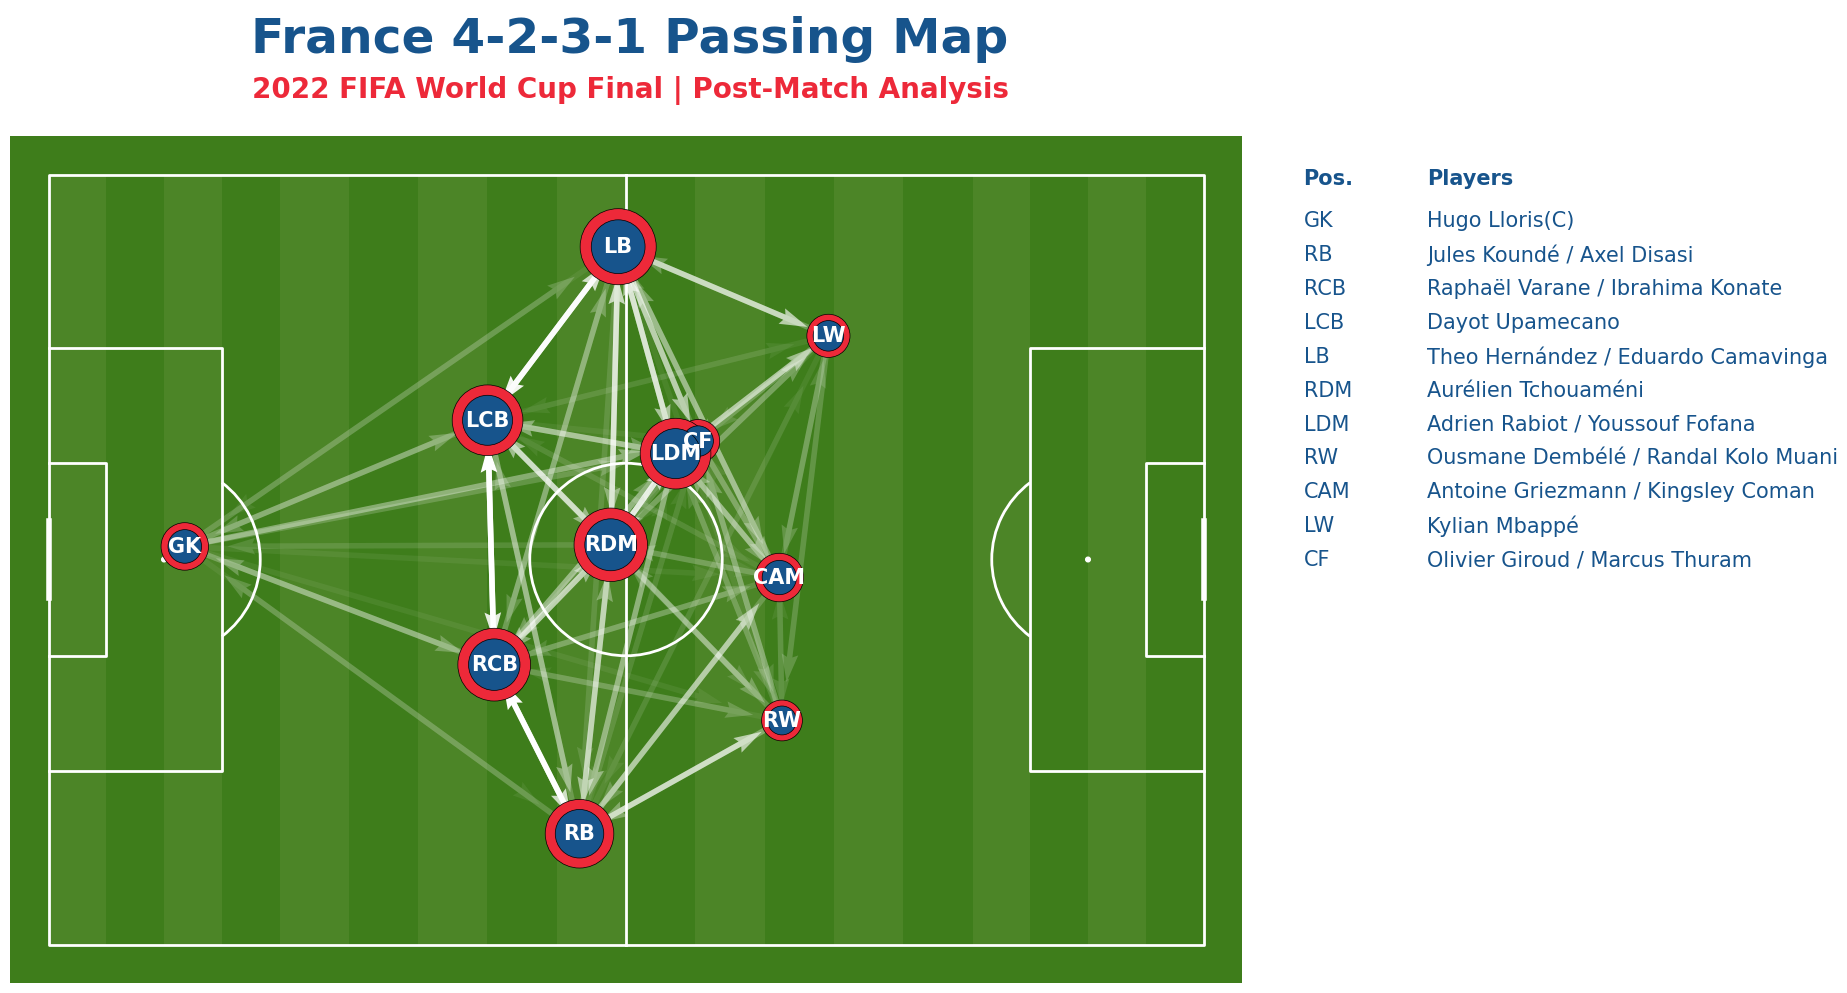

In [86]:
# NOW LETS CREATE THE PITCH AND PLOT OUR PASSING MAP FOR FRANCE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# NOW LETS MAKE THE NODES BASED OFF POSITION AND NOT PLAYERS 
fra_average_locations = fra_merged_df.groupby('position_abbreviation').agg(
    {'starting_x':['mean'], 'starting_y':['mean', 'count']})
fra_average_locations.columns = ['starting_x', 'starting_y', 'count']
fra_average_locations


# Rename the 'count' column to avoid naming conflict
fra_pass_between.rename(columns={'count': 'counts'}, inplace=True)

#Calculate the line width and marker sizes relative to the largest counts
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
fra_pass_between['width'] = (fra_pass_between.counts / fra_pass_between.counts.max() *
                           MAX_LINE_WIDTH)
fra_average_locations['marker_size'] = (fra_average_locations['count']
                                         / fra_average_locations['count'].max() * MAX_MARKER_SIZE)

#Set the color and transparency of lines when fewer passes are made
MIN_TRANSPARENCY = 0
color = np.array(to_rgba('white'))
color = np.tile(color, (len(fra_pass_between), 1))
c_transparency = fra_pass_between.pass_count / fra_pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency


# Setup the pitch
pitch = Pitch(pitch_type='statsbomb',pitch_color='#3e7d1b', line_color='white', stripe_color='#4c8527', stripe=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=False)


# Creating the passing arrows

# Calculate the adjustment factor for arrow length
ARROW_LENGTH_FACTOR = 0.9  # Adjust this factor to control arrow length

# Creating the passing arrows with adjusted transparency and length
fra_adjusted_end_x = fra_pass_between.starting_x + (fra_pass_between.starting_x_end - fra_pass_between.starting_x) * ARROW_LENGTH_FACTOR
fra_adjusted_end_y = fra_pass_between.starting_y + (fra_pass_between.starting_y_end - fra_pass_between.starting_y) * ARROW_LENGTH_FACTOR

fra_pass_arrows = pitch.arrows(fra_pass_between.starting_x, fra_pass_between.starting_y, 
                               fra_adjusted_end_x, fra_adjusted_end_y, 
                               lw=fra_pass_between.width, color='#FFFFFF', alpha=c_transparency, zorder=1, ax=ax)

#creating the nodes
fra_pass_nodes = pitch.scatter(fra_average_locations.starting_x, fra_average_locations.starting_y, 
                              s=fra_average_locations.marker_size,
                              color='#ED2939', edgecolors='black', linewidth=0.5, alpha=1, ax=ax)
#creating the internal nodes
fra_pass_nodes_interal = pitch.scatter(fra_average_locations.starting_x, fra_average_locations.starting_y,
                              s=fra_average_locations.marker_size / 2, color = '#17548C', edgecolors='black',
                                       linewidth=0.5, alpha=1, ax=ax)

# Add position abbreviations as text labels inside the nodes
for index, row in fra_average_locations.iterrows():
    ax.text(row['starting_x'], row['starting_y'], row.name, color='white',
            fontsize=15, ha='center', va='center', fontweight='bold')

# add title
fig_text(
    0.515, 0.99, "France 4-2-3-1 Passing Map", size=35, fig=fig,
    color='#17548C',
    ha="center", weight="bold"
)

# add subtitle
fig.text(
    0.515, 0.915,
    "2022 FIFA World Cup Final | Post-Match Analysis",
    size=20,
    ha="center", weight="bold", color="#ED2939"
)

# Adding player names and their position played
fra_player_title = "Players"
ax.text(1.15, .95, fra_player_title, fontsize=15, va='center', ha='left', fontweight='bold',
        color="#17548C",transform=ax.transAxes)

# List of France player names
fra_players = [
        'Hugo Lloris(C)',
        'Jules Koundé / Axel Disasi',
        'Raphaël Varane / Ibrahima Konate',
        'Dayot Upamecano',
        'Theo Hernández / Eduardo Camavinga',
        'Aurélien Tchouaméni',
        'Adrien Rabiot / Youssouf Fofana',
        'Ousmane Dembélé / Randal Kolo Muani',
        'Antoine Griezmann / Kingsley Coman',
        'Kylian Mbappé',
        "Olivier Giroud / Marcus Thuram"
]

# Position for the first substitute
x_coordinate = 1.15
y_coordinate = 0.90

# Spacing between player names
line_height = 0.04

# Add the Argentina substitute player names
for players in fra_players:
    ax.text(x_coordinate, y_coordinate, players, fontsize=15, va='center', ha='left', color="#17548C", transform=ax.transAxes)
    y_coordinate -= line_height
    
#Positions
fra_pos_title = "Pos."
ax.text(1.05, .95, fra_pos_title, fontsize=15, va='center', ha='left', fontweight='bold',
        color="#17548C",transform=ax.transAxes)

# List of France Positions
fra_pos = [
    'GK',
    'RB',
    'RCB',
    'LCB',
    'LB',
    'RDM',
    'LDM',
    'RW',
    'CAM',
    'LW',
    "CF",
]

# Position for the first position
pos_x_coordinate = 1.05
pos_y_coordinate = 0.90

# Spacing between player names
pos_line_height = 0.04

# Add the France positions names
for pos in fra_pos:
    ax.text(pos_x_coordinate, pos_y_coordinate, pos, fontsize=15, va='center', ha='left', color="#17548C", transform=ax.transAxes)
    pos_y_coordinate -= pos_line_height

# LET'S CREATE A SHOT MAP

In [87]:
# Let's filter to only show SHOTS by Argentina
# Want to see who SHOT, what technique of SHOT it was, and the location of the SHOT, and it if was saved or not

argentina_shots = argentina.loc[argentina['type_name'] == 'Shot']
argentina_shots = argentina_shots[['id','period', 'timestamp','minute','second','player_name','location', 'shot_end_location', 'shot_first_time', 'shot_statsbomb_xg','shot_technique_name','shot_body_part_name','shot_type_name','shot_outcome_name']]
argentina_shots

# 20 TOTAL SHOTS IN REGULATION 120+ MINS (PERIODS 1-4...EXCLUDING PERIOD 5 PENALTY SHOOTOUT)

id  period     timestamp  minute  \
191   545c2c84-018f-4570-a01c-753823feaeac       1  00:04:40.798       4   
339   4ad26294-8aaf-4d69-83dd-bbf9ef797b32       1  00:07:36.537       7   
601   6d498191-05f0-432c-8764-03aea4ef9fb8       1  00:16:15.886      16   
770   6d527ebc-a948-4cd8-ac82-daced35bb715       1  00:22:24.114      22   
978   f227a92e-d86c-4f3d-aa75-5ccb71adcae6       1  00:31:35.181      31   
1177  ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe       1  00:35:22.647      35   
1915  13a4889d-ad08-41be-9125-24c4c7d7879a       2  00:03:49.971      48   
2203  43691970-1dad-4e11-bd29-48f640c55ea1       2  00:13:21.380      58   
2234  9615ffbc-b513-45e6-9ccc-015234483f95       2  00:14:51.755      59   
2690  43b2d123-6945-4a7c-8292-f7792af341f9       2  00:26:31.216      71   
3036  fe277079-395a-4ff3-bb29-e99d93014014       2  00:38:23.690      83   
3388  867b8791-49c0-4d98-a976-c0b4cfc1cb5a       2  00:51:37.226      96   
3525  d8c05bb0-ddb1-4ff2-9dbf-ba17b00a5359       3  00:02:05.384      92   
3929  d3ba40fa-09d6-4488-b17d-672aaa2928d7       3  00:14:28.023     104   
3933  a1654330-3747-4a25-b244-26ba2884c91c       3  00:14:30.401     104   
3969  5d7d4f2f-62da-4de9-90e3-3660ba17c4f3       3  00:15:41.223     105   
4041  8bb8c7b5-9c14-4dfa-9279-0548ee8076db       4  00:01:55.723     106   
4066  40cbfd91-87d9-4df8-a575-533b5c26767f       4  00:02:57.018     107   
4069  54b889ec-6026-49ea-a913-e883dbe6e301       4  00:02:58.079     107   
4356  449f2702-ad18-4bc8-a9ef-59fb1dc1a707       4  00:17:59.834     122   
4390  2a15edb5-2a54-41d5-afe9-87e447389b18       5  00:01:02.191     121   
4394  50dcde1a-faa3-4eec-a0cd-3f09a7cf763a       5  00:02:27.184     122   
4398  bcc6d4ae-f71c-4566-bf2d-c12f910eb526       5  00:04:16.722     124   
4403  66eaf262-999f-4953-a924-f1b596de4dbf       5  00:05:57.883     125   

      second                      player_name       location  \
191       40              Alexis Mac Allister   [92.4, 30.0]   
339       36           Rodrigo Javier De Paul   [99.2, 47.9]   
601       15  Ángel Fabián Di María Hernández  [103.1, 34.6]   
770       24   Lionel Andrés Messi Cuccittini  [108.0, 40.0]   
978       35              Alexis Mac Allister   [94.3, 23.5]   
1177      22  Ángel Fabián Di María Hernández  [111.8, 32.1]   
1915      49           Rodrigo Javier De Paul  [103.3, 52.3]   
2203      21                   Julián Álvarez  [110.5, 24.9]   
2234      51   Lionel Andrés Messi Cuccittini  [109.7, 46.0]   
2690      31                   Enzo Fernandez   [98.9, 32.2]   
3036      23                   Enzo Fernandez   [92.2, 35.9]   
3388      37   Lionel Andrés Messi Cuccittini   [96.2, 40.9]   
3525       5              Alexis Mac Allister   [98.2, 23.8]   
3929      28          Lautaro Javier Martínez  [108.8, 45.3]   
3933      30            Gonzalo Ariel Montiel   [96.3, 49.4]   
3969      41          Lautaro Javier Martínez  [105.1, 33.5]   
4041      55   Lionel Andrés Messi Cuccittini  [103.6, 55.8]   
4066      57          Lautaro Javier Martínez  [114.4, 52.0]   
4069      58   Lionel Andrés Messi Cuccittini  [116.6, 43.0]   
4356      59          Lautaro Javier Martínez  [110.8, 41.6]   
4390       2   Lionel Andrés Messi Cuccittini  [108.1, 40.1]   
4394      27      Paulo Bruno Exequiel Dybala  [108.1, 40.1]   
4398      16           Leandro Daniel Paredes  [108.1, 40.1]   
4403      57            Gonzalo Ariel Montiel  [108.1, 40.1]   

       shot_end_location shot_first_time  shot_statsbomb_xg  \
191   [117.3, 38.3, 0.8]             NaN           0.024542   
339        [108.1, 40.4]             NaN           0.062813   
601   [120.0, 39.6, 7.5]            True           0.106801   
770   [120.0, 41.8, 0.2]             NaN           0.783500   
978        [112.3, 80.0]            True           0.010578   
1177  [120.0, 41.7, 0.5]            True           0.303409   
1915  [117.6, 41.6, 1.3]            True           0.040216   
2203  [119.4, 35.8, 0.2]          

In [88]:
# Let's filter to only show SHOTS by France
# Want to see who SHOT, what technique of SHOT it was, and the location of the SHOT, and it if was saved or not

france_shots = france.loc[france['type_name'] == 'Shot']
france_shots = france_shots[['id','period', 'timestamp','minute','second','player_name','location', 'shot_end_location', 'shot_first_time', 'shot_statsbomb_xg','shot_technique_name','shot_body_part_name','shot_type_name','shot_outcome_name']]
france_shots

# 10 TOTAL SHOTS IN REGULATION 120+ MINS (PERIODS 1-4...EXCLUDING PERIOD 5 PENALTY SHOOTOUT)

id  period     timestamp  minute  \
2516  9f6285ff-9b32-4a46-a4a0-74c1ca89276c       2  00:22:15.084      67   
2657  b2d43671-a3e6-4709-9c0c-646442c1074c       2  00:25:09.207      70   
2927  6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd       2  00:34:24.975      79   
2986  03fb2918-e1e7-4ec8-89ff-7bc5531e853d       2  00:35:59.025      80   
3256  5dbcde3d-ba75-483d-a65f-72d2b99ff713       2  00:47:57.862      92   
3282  8d2a6599-cc25-41a2-acde-41d10194b5bd       2  00:48:45.484      93   
3801  db8267ad-256a-450d-997f-382a4d545634       3  00:09:54.465      99   
4198  08f2f203-cdc9-4146-99b6-818c5c32bf70       4  00:10:38.948     115   
4202  d9b92dbd-4fea-4f48-b2fb-d7222eab2dbd       4  00:12:05.189     117   
4336  959edead-09fb-40b0-b6a3-72e73bd30d5a       4  00:17:44.376     122   
4388  d0f76056-0d67-4aae-b44a-83bef0b1cf27       5  00:00:13.386     120   
4392  97439112-dfb5-4bd5-9967-554095296096       5  00:01:42.023     121   
4396  54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91       5  00:03:29.289     123   
4401  59ebe83e-616a-4288-89fd-a0246b53d48f       5  00:05:09.782     125   

      second                player_name       location   shot_end_location  \
2516      15          Randal Kolo Muani  [113.4, 34.6]  [120.0, 31.5, 1.1]   
2657       9       Kylian Mbappé Lottin  [102.5, 27.9]  [120.0, 38.8, 4.5]   
2927      24       Kylian Mbappé Lottin  [108.0, 40.0]  [120.0, 37.3, 0.3]   
2986      59       Kylian Mbappé Lottin  [104.8, 30.1]  [120.0, 41.5, 0.3]   
3256      57       Kylian Mbappé Lottin   [95.9, 32.2]       [100.7, 33.5]   
3282      45              Adrien Rabiot  [108.9, 28.5]  [118.0, 36.6, 0.2]   
3801      54            Youssouf Fofana   [89.8, 39.9]       [103.3, 40.4]   
4198      38       Kylian Mbappé Lottin  [101.4, 26.6]       [104.5, 29.1]   
4202       5       Kylian Mbappé Lottin  [108.0, 40.0]  [120.0, 36.7, 1.1]   
4336      44          Randal Kolo Muani  [103.7, 45.1]  [109.7, 44.1, 0.5]   
4388      13       Kylian Mbappé Lottin  [108.1, 40.1]  [120.0, 37.6, 1.3]   
4392      42             Kingsley Coman  [108.1, 40.1]  [118.8, 38.2, 0.9]   
4396      29  Aurélien Djani Tchouaméni  [108.1, 40.1]  [120.0, 35.6, 0.2]   
4401       9          Randal Kolo Muani  [108.1, 40.1]  [120.0, 39.3, 1.6]   

     shot_first_time  shot_statsbomb_xg shot_technique_name  \
2516             NaN           0.096184              Normal   
2657             NaN           0.050644              Normal   
2927             NaN           0.783500              Normal   
2986            True           0.101703              Volley   
3256             NaN           0.032449              Normal   
3282            True           0.093335              Normal   
3801             NaN           0.023032              Normal   
4198             NaN           0.030757              Normal   
4202             NaN           0.783500              Normal   
4336            True           0.277514         Half Volley   
4388             NaN           0.783500              Normal   
4392             NaN           0.783500              Normal   
4396             NaN           0.783500              Normal   
4401             NaN           0.783500              Normal   

     shot_body_part_name shot_type_name shot_outcome_name  
2516                Head      Open Play             Off T  
2657          Right Foot      Open Play             Off T  
2927          Right Foot        Penalty              Goal  
2986          Right Foot      Open Play              Goal  
3256          Right Foot      Open Play           Blocked  
3282           Left Foot      Open Play             Saved  
3801          Right Foot      Open Play           Blocked  
4198          Right Foot      Open Play           Blocked  
4202          Right Foot        Penalty              Goal  
4336          Right Foot      Open Play             Saved  
4388          Right Foot        Penalty              Goal  
4392          Right Foot        Penalty             Saved  
43

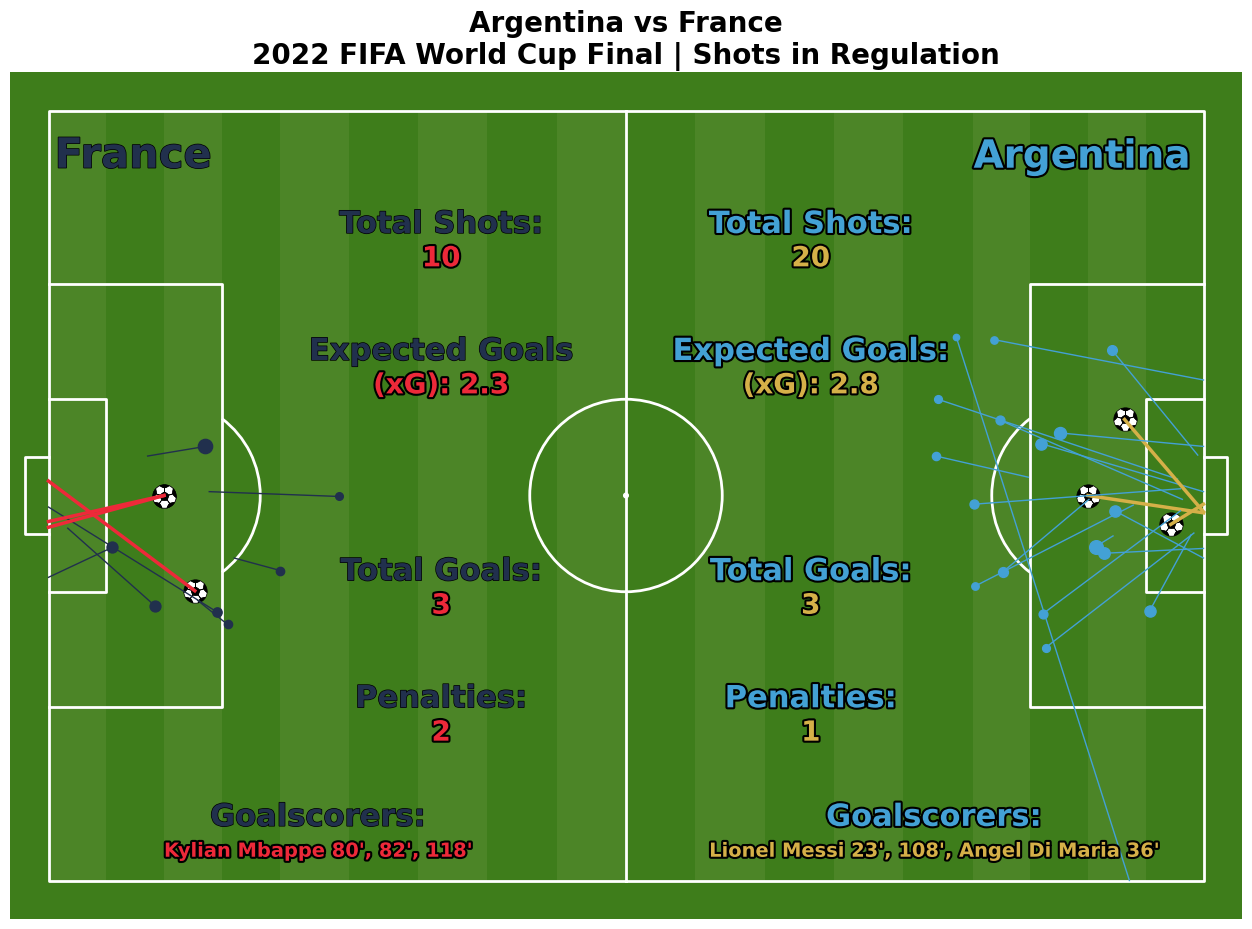

In [89]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', goal_type='box', pitch_color='#3e7d1b', line_color='white', stripe_color='#4c8527', stripe=True)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=False)

#Plotting Argentina Shots
for x in range(len(argentina_shots['id'])):
    # Let's filter out only shots in regulation (periods 1-4...exclude period 5 penalty shootout)
    if argentina_shots['period'].iloc[x] in [1, 2, 3, 4]:
        # The size of the scatter will be determined by xG
        size = np.sqrt(argentina_shots['shot_statsbomb_xg'].iloc[x]) * 200
        if argentina_shots['shot_outcome_name'].iloc[x] == 'Goal':
            # Plotting goals with a thicker and bolder line
            plt.plot((argentina_shots['location'].iloc[x][0], argentina_shots['shot_end_location'].iloc[x][0]),
                     (argentina_shots['location'].iloc[x][1], argentina_shots['shot_end_location'].iloc[x][1]),
                     color='#D5B048', linewidth=2.5)  # Adjust the linewidth as needed
            pitch.scatter(argentina_shots['location'].iloc[x][0], argentina_shots['location'].iloc[x][1],
                           s=300, marker='football', ax=ax)
        else:
            # Plotting missed shots with a thinner line
            plt.plot((argentina_shots['location'].iloc[x][0], argentina_shots['shot_end_location'].iloc[x][0]),
                     (argentina_shots['location'].iloc[x][1], argentina_shots['shot_end_location'].iloc[x][1]),
                     color='#43A1D5', linewidth=1)  # Adjust the linewidth as needed
            plt.scatter(argentina_shots['location'].iloc[x][0], argentina_shots['location'].iloc[x][1],
                          s=size, color='#43A1D5')

#Plotting France Shots
for x in range(len(france_shots['id'])):
    # Let's filter out only shots in regulation (periods 1-4...exclude period 5 penalty shootout)
    if france_shots['period'].iloc[x] in [1, 2, 3, 4]:
        # The size of the scatter will be determined by xG
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x]) * 200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            # Plotting goals with a thicker and bolder line
            plt.plot((120-france_shots['location'].iloc[x][0], 120-france_shots['shot_end_location'].iloc[x][0]),
                     (80-france_shots['location'].iloc[x][1], 80-france_shots['shot_end_location'].iloc[x][1]),
                     color='#ED2939', linewidth=2.5)  # Adjust the linewidth as needed
            pitch.scatter(120-france_shots['location'].iloc[x][0], 80-france_shots['location'].iloc[x][1],
                           s=300, marker='football', ax=ax)
        else:
            # Plotting missed shots with a thinner line
            plt.plot((120-france_shots['location'].iloc[x][0], 120-france_shots['shot_end_location'].iloc[x][0]),
                     (80-france_shots['location'].iloc[x][1], 80-france_shots['shot_end_location'].iloc[x][1]),
                     color='#21304D', linewidth=1)  # Adjust the linewidth as needed
            plt.scatter(120-france_shots['location'].iloc[x][0], 80-france_shots['location'].iloc[x][1],
                          s=size, color='#21304D')   
            
# Let's create the title
title = "Argentina vs France\n2022 FIFA World Cup Final | Shots in Regulation"
ax.set_title(title, fontsize=20, fontweight='bold')

# Add titles and stats to the left half (France)
left_team = "France"
text=ax.text(0.10, 0.90, left_team, fontsize=30, va='center', ha='center', fontweight='bold',
        color="#21304D" ,transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=1, foreground='black')])

fra_total_shots = "Total Shots:"
text=ax.text(0.35, 0.82, fra_total_shots, fontsize=22, va='center', ha='center', fontweight='bold',
        color="#21304D",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=1, foreground='black')])

fra_total_shots2 = "10"
text=ax.text(0.35, 0.78, fra_total_shots2, fontsize=20, va='center', ha='center', fontweight='bold',
        color="#ED2939",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

fra_xG = "Expected Goals"
text=ax.text(0.35, 0.67, fra_xG, fontsize=22, va='center', ha='center', fontweight='bold',
        color="#21304D",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=1, foreground='black')])

fra_xG2 = "(xG): 2.3"
text=ax.text(0.35, 0.63, fra_xG2, fontsize=20, va='center', ha='center', fontweight='bold',
        color="#ED2939",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

fra_goals = "Total Goals:"
text=ax.text(0.35, 0.41, fra_goals, fontsize=22, va='center', ha='center', fontweight='bold',
        color="#21304D",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=1, foreground='black')])

fra_goals2 = "3"
text=ax.text(0.35, 0.37, fra_goals2, fontsize=20, va='center', ha='center', fontweight='bold',
        color="#ED2939",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

fra_pens = "Penalties:"
text=ax.text(0.35, 0.26, fra_pens, fontsize=22, va='center', ha='center', fontweight='bold',
        color="#21304D",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=1, foreground='black')])

fra_pens2 = "2"
text=ax.text(0.35, 0.22, fra_pens2, fontsize=20, va='center', ha='center', fontweight='bold',
        color="#ED2939",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

# Add titles and stats to the right half (Argentina)
right_team = "Argentina"
text=ax.text(0.87, 0.90, right_team, fontsize=28, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_total_shots = "Total Shots:"
text = ax.text(0.65, 0.82, arg_total_shots, fontsize=22, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_total_shots2 = "20"
text = ax.text(0.65, 0.78, arg_total_shots2, fontsize=20, va='center', ha='center', fontweight='bold',
               color="#D5B048", transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_xG = "Expected Goals:"
text=ax.text(0.65, 0.67, arg_xG, fontsize=22, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])
arg_xG2 = "(xG): 2.8"
text=ax.text(0.65, 0.63, arg_xG2, fontsize=20, va='center', ha='center', fontweight='bold', 
        color="#D5B048",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_goals = "Total Goals:"
text=ax.text(0.65, 0.41, arg_goals, fontsize=22, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_goals2 = "3"
text=ax.text(0.65, 0.37, arg_goals2, fontsize=20, va='center', ha='center', fontweight='bold', 
        color="#D5B048",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_pens = "Penalties:"
text=ax.text(0.65, 0.26, arg_pens, fontsize=22, va='center', ha='center', fontweight='bold', 
        color="#43A1D5",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_pens2 = "1"
text=ax.text(0.65, 0.22, arg_pens2, fontsize=20, va='center', ha='center', fontweight='bold', 
        color="#D5B048",transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

fra_GS = "Goalscorers:"
text=ax.text(0.25, 0.12, fra_GS, fontsize=22, va='center', ha='center', fontweight='bold',
        color="#21304D" ,transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=1, foreground='black')])
fra_GS2 = "Kylian Mbappe 80', 82', 118'"
text=ax.text(0.25, 0.08, fra_GS2, fontsize=14, va='center', ha='center', fontweight='bold',
        color="#ED2939" ,transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

arg_GS = "Goalscorers:"
text=ax.text(0.75, 0.12, arg_GS, fontsize=22, va='center', ha='center', fontweight='bold',
        color="#43A1D5" ,transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])
arg_GS2 = "Lionel Messi 23', 108', Angel Di Maria 36'"
text=ax.text(0.75, 0.08, arg_GS2, fontsize=14, va='center', ha='center', fontweight='bold',
        color="#D5B048" ,transform=ax.transAxes)
text.set_path_effects([withStroke(linewidth=3, foreground='black')])

# Show the plot
plt.show()


# LET'S CREATE A POSSESSION CHART

In [90]:
#Use Events df and invert possession duration for France (make it negative) so that we can display both teams' possession

for x in range(len(events['index'])):
    if (events['possession_team_id'].iloc[x] == 771):
        events.duration.iloc[x] = events.duration.iloc[x]*(-1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_12560\3764817043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.duration.iloc[x] = events.duration.iloc[x]*(-1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_12560\3764817043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.duration.iloc[x] = events.duration.iloc[x]*(-1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_12560\3764817043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

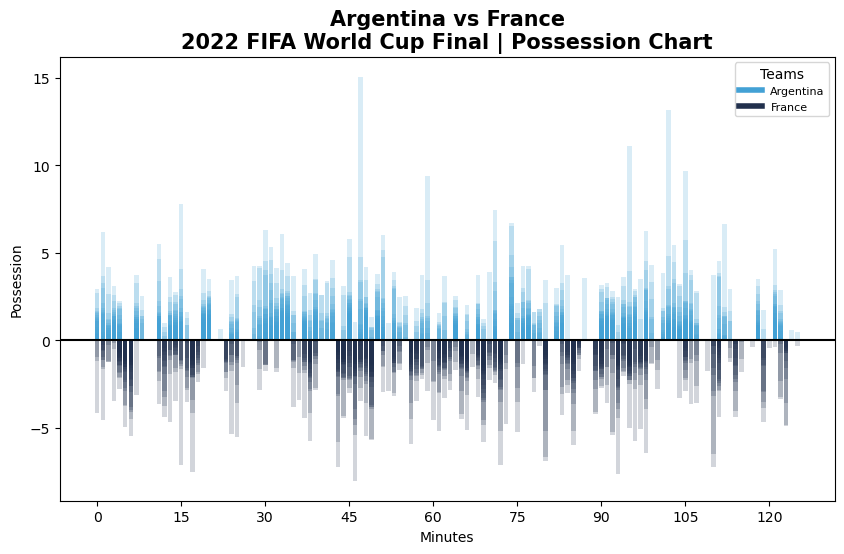

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'events' is your DataFrame containing data for the chart

# Define custom colors for the bars
arg_color = '#43A1D5'  # light blue
fra_color = '#21304D'  # navy

# Creating the chart with a larger size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Minutes')
ax.set_ylabel('Possession')

# Use the specified colors for positive and negative durations
bars = ax.bar(events.minute, events.duration, color=np.where(events.duration > 0, arg_color, fra_color), alpha=0.2)

ax.axhline(0, color='black')
tot_min = events.minute.max()
ax.set_xticks(np.arange(0, tot_min, step=15))

title = "Argentina vs France\n2022 FIFA World Cup Final | Possession Chart"
ax.set_title(title, fontsize=15, fontweight='bold')

# Create legend handles for custom colors
legend_handles = [
    plt.Line2D([0], [0], color=arg_color, lw=4, label='Argentina'),
    plt.Line2D([0], [0], color=fra_color, lw=4, label='France')
]

# Add a legend for the bars with custom colors
legend = ax.legend(handles=legend_handles, loc='upper right', title='Teams', title_fontsize=10, fontsize=8)